In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **TON_IOT**

In [ ]:
# Load the TON IoT dataset from a CSV file and retrieve its shape
# Ensure the CSV file is located at the specified path
df_TON_IOT = pd.read_csv('/content/drive/MyDrive/train_test_network (1) (1).csv')
shape = df_TON_IOT.shape

In [ ]:
# Display the first few rows of the DataFrame to understand its structure
df_TON_IOT.head()

src_ip  src_port         dst_ip  dst_port proto service    duration  \
0   192.168.1.37      4444  192.168.1.193     49178   tcp       -  290.371539   
1  192.168.1.193     49180   192.168.1.37      8080   tcp       -    0.000102   
2  192.168.1.193     49180   192.168.1.37      8080   tcp       -    0.000148   
3  192.168.1.193     49180   192.168.1.37      8080   tcp       -    0.000113   
4  192.168.1.193     49180   192.168.1.37      8080   tcp       -    0.000130   

   src_bytes  dst_bytes conn_state  ...  http_response_body_len  \
0     101568       2592        OTH  ...                       0   
1          0          0        REJ  ...                       0   
2          0          0        REJ  ...                       0   
3          0          0        REJ  ...                       0   
4          0          0        REJ  ...                       0   

   http_status_code  http_user_agent  http_orig_mime_types  \
0                 0                -                     -   
1                 0                -                     -   
2                 0                -                     -   
3                 0                -                     -   
4                 0                -                     -   

   http_resp_mime_types weird_name  weird_addl  weird_notice  label      type  
0                     -          -           -             -      1  backdoor  
1                     -          -           -             -      1  backdoor  
2                     -          -           -             -      1  backdoor  
3                     -          -           -             -      1  backdoor  
4                     -          -           -             -      1  backdoor  

[5 rows x 44 columns]

In [ ]:
df_TON_IOT.head()
# Print the shape of the DataFrame
print('Dataframe shape: ', shape)
# Print the number of rows in the DataFrame
print('Number of rows: ', shape[0])
# Print the number of columns in the DataFrame
print('Number of columns: ', shape[1])
#df.shape

Dataframe shape:  (211043, 44)
Number of rows:  211043
Number of columns:  44




**Null and duplicated values**

Checking Missing Value

Following code shows dataset does not have any missing values

In [ ]:
# Check for missing values in the DataFrame df_TON_IOT
# This will return the count of missing values for each column in the DataFrame
df_TON_IOT.isnull().sum()

src_ip                    0
src_port                  0
dst_ip                    0
dst_port                  0
proto                     0
service                   0
duration                  0
src_bytes                 0
dst_bytes                 0
conn_state                0
missed_bytes              0
src_pkts                  0
src_ip_bytes              0
dst_pkts                  0
dst_ip_bytes              0
dns_query                 0
dns_qclass                0
dns_qtype                 0
dns_rcode                 0
dns_AA                    0
dns_RD                    0
dns_RA                    0
dns_rejected              0
ssl_version               0
ssl_cipher                0
ssl_resumed               0
ssl_established           0
ssl_subject               0
ssl_issuer                0
http_trans_depth          0
http_method               0
http_uri                  0
http_version              0
http_request_body_len     0
http_response_body_len    0
http_status_code          0
http_user_agent           0
http_orig_mime_types      0
http_resp_mime_types      0
weird_name                0
weird_addl                0
weird_notice              0
label                     0
type                      0
dtype: int64

**Checking duplicated values**

Now we need to check if there is any duplicated value, because it does not make any sense to have duplicate value in our analysis. I will check shape, so the dataset does not have a duplicated value.

In [ ]:
df_TON_IOT[df_TON_IOT.duplicated()].shape

(20569, 44)

In [ ]:
# Display the duplicate rows
duplicate_rows = df_TON_IOT[df_TON_IOT.duplicated()]
print(duplicate_rows)

               src_ip  src_port          dst_ip  dst_port proto service  \
21      192.168.1.193     49180    192.168.1.37      8080   tcp       -   
151     192.168.1.193     49194    192.168.1.33      8080   tcp       -   
322     192.168.1.193     49234    192.168.1.37      8080   tcp       -   
330     192.168.1.193     49234    192.168.1.37      8080   tcp       -   
348     192.168.1.193     49236    192.168.1.37      8080   tcp       -   
...               ...       ...             ...       ...   ...     ...   
211032   192.168.1.32     47514  18.194.169.124        80   tcp       -   
211033   192.168.1.32     47518  18.194.169.124        80   tcp       -   
211034   192.168.1.32     47634  18.194.169.124        80   tcp       -   
211035   192.168.1.32     48134  18.194.169.124        80   tcp       -   
211036   192.168.1.32     48156  18.194.169.124        80   tcp       -   

        duration  src_bytes  dst_bytes conn_state  ...  \
21      0.000127          0          0   

In [ ]:
# Remove duplicate rows and keep the first occurrence
df_TON_IOT_cleaned = df_TON_IOT.drop_duplicates()


In [ ]:
# Check for duplicate rows in the cleaned DataFrame df_TON_IOT_cleaned
# The .duplicated() method returns a boolean Series indicating whether each row is a duplicate
# We filter the DataFrame to only include duplicate rows and use .shape to get the dimensions of the result
df_TON_IOT_cleaned[df_TON_IOT_cleaned.duplicated()].shape

(0, 44)

In [ ]:
df_TON_IOT.shape

(211043, 44)

In [ ]:
df_TON_IOT_cleaned.shape

(190474, 44)

In [ ]:
df_TON_IOT_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190474 entries, 0 to 211042
Data columns (total 44 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   src_ip                  190474 non-null  object 
 1   src_port                190474 non-null  int64  
 2   dst_ip                  190474 non-null  object 
 3   dst_port                190474 non-null  int64  
 4   proto                   190474 non-null  object 
 5   service                 190474 non-null  object 
 6   duration                190474 non-null  float64
 7   src_bytes               190474 non-null  int64  
 8   dst_bytes               190474 non-null  int64  
 9   conn_state              190474 non-null  object 
 10  missed_bytes            190474 non-null  int64  
 11  src_pkts                190474 non-null  int64  
 12  src_ip_bytes            190474 non-null  int64  
 13  dst_pkts                190474 non-null  int64  
 14  dst_ip_bytes            1

 **codage of string**

In [ ]:
# Drop the 'type' column from the DataFrame as it is not needed for binary classification
df_TON_IOT_cleaned = df_TON_IOT_cleaned.drop('type', axis = 1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Specify the columns that need to be encoded as categorical variables
columns_to_encode = ['src_ip', 'dst_ip', 'proto', 'service','conn_state','dns_query', 'dns_AA', 'dns_RD','dns_RA','dns_rejected','ssl_version','ssl_cipher','ssl_resumed','ssl_established','ssl_subject','ssl_issuer', 'http_trans_depth', 'http_method','http_uri','http_version','http_user_agent','http_orig_mime_types','http_resp_mime_types','weird_name','weird_addl','weird_notice']
# Initialize LabelEncoder for each specified column and transform the data
for column in columns_to_encode:
    le = LabelEncoder()
    df_TON_IOT_cleaned[column] = le.fit_transform(df_TON_IOT_cleaned[column])
# Display the information about the DataFrame after encoding
df_TON_IOT_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190474 entries, 0 to 211042
Data columns (total 43 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   src_ip                  190474 non-null  int64  
 1   src_port                190474 non-null  int64  
 2   dst_ip                  190474 non-null  int64  
 3   dst_port                190474 non-null  int64  
 4   proto                   190474 non-null  int64  
 5   service                 190474 non-null  int64  
 6   duration                190474 non-null  float64
 7   src_bytes               190474 non-null  int64  
 8   dst_bytes               190474 non-null  int64  
 9   conn_state              190474 non-null  int64  
 10  missed_bytes            190474 non-null  int64  
 11  src_pkts                190474 non-null  int64  
 12  src_ip_bytes            190474 non-null  int64  
 13  dst_pkts                190474 non-null  int64  
 14  dst_ip_bytes            1

In [ ]:
df_TON_IOT_cleaned.head()

src_ip  src_port  dst_ip  dst_port  proto  service    duration  src_bytes  \
0      26      4444     201     49178      1        0  290.371539     101568   
1      16     49180     210      8080      1        0    0.000102          0   
2      16     49180     210      8080      1        0    0.000148          0   
3      16     49180     210      8080      1        0    0.000113          0   
4      16     49180     210      8080      1        0    0.000130          0   

   dst_bytes  conn_state  ...  http_request_body_len  http_response_body_len  \
0       2592           0  ...                      0                       0   
1          0           1  ...                      0                       0   
2          0           1  ...                      0                       0   
3          0           1  ...                      0                       0   
4          0           1  ...                      0                       0   

   http_status_code  http_user_agent  http_orig_mime_types  \
0                 0                0                     0   
1                 0                0                     0   
2                 0                0                     0   
3                 0                0                     0   
4                 0                0                     0   

   http_resp_mime_types  weird_name  weird_addl  weird_notice  label  
0                     0           0           0             0      1  
1                     0           0           0             0      1  
2                     0           0           0             0      1  
3                     0           0           0             0      1  
4                     0           0           0             0      1  

[5 rows x 43 columns]

In [ ]:
print(df_TON_IOT_cleaned.groupby("label").size())

label
0     42040
1    148434
dtype: int64


In [ ]:
# Separate the features (X) from the target variable (y)
X_TON_IOT = df_TON_IOT_cleaned.drop('label', axis = 1)
y_TON_IOT = df_TON_IOT_cleaned['label']
X_TON_IOT.shape, y_TON_IOT.shape

((190474, 42), (190474,))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_TON_IOT_train, X_TON_IOT_test,y_TON_IOT_train, y_TON_IOT_test = train_test_split(X_TON_IOT, y_TON_IOT, test_size=0.4, random_state = 1337
)
# Further split the test set into validation and test sets
# 50% of the original test set will be used for validation and 50% for the final test
X_TON_IOT_valid, X_TON_IOT_test2,y_TON_IOT_valid, y_TON_IOT_test2 = train_test_split(X_TON_IOT_test, y_TON_IOT_test, test_size=0.5, random_state = 1337
)

In [ ]:
from imblearn.combine import SMOTETomek

# Create the SMOTE-TOMEK
smt = SMOTETomek(random_state=42)

# Apply SMOTE-TOMEK to balance the classes
X_TON_IOT_train, y_TON_IOT_train = smt.fit_resample(X_TON_IOT_train, y_TON_IOT_train)


In [ ]:
from imblearn.combine import SMOTETomek

# Application de SMOTE-TOMEK pour équilibrer les classes
X_TON_IOT_valid, y_TON_IOT_valid = smt.fit_resample(X_TON_IOT_valid, y_TON_IOT_valid)


In [ ]:
y_TON_IOT_train.value_counts()

label
0    89162
1    89162
Name: count, dtype: int64

In [ ]:
y_TON_IOT.value_counts()

label
1    148434
0     42040
Name: count, dtype: int64

In [ ]:

from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler for feature scaling
scaling = StandardScaler()
# Fit the scaler on the training data and transform it
X_TON_IOT_train = scaling.fit_transform(X_TON_IOT_train)
# Transform the validation data using the fitted scaler
X_TON_IOT_valid = scaling.transform(X_TON_IOT_valid)
# Transform the test data using the fitted scaler
X_TON_IOT_test2 = scaling.transform(X_TON_IOT_test2)

In [ ]:
# Print the shape of the training data
print(X_TON_IOT_train.shape)
# Reshape the training data
X_TON_IOT_train = X_TON_IOT_train.reshape(X_TON_IOT_train.shape[0], X_TON_IOT_train.shape[1], 1)
# Reshape the validation data
X_TON_IOT_valid = X_TON_IOT_valid.reshape(X_TON_IOT_valid.shape[0], X_TON_IOT_valid.shape[1], 1)
# Reshape the test data
X_TON_IOT_test2 = X_TON_IOT_test2.reshape(X_TON_IOT_test2.shape[0], X_TON_IOT_test2.shape[1], 1)
# Print the new shape of the training data after reshaping
print(X_TON_IOT_train.shape)

(178324, 42)
(178324, 42, 1)


In [ ]:

from tensorflow.keras.utils import to_categorical
# Convert the training labels to one-hot encoding
y_TON_IOT_train_one_hot = to_categorical(y_TON_IOT_train, num_classes=2)
# Convert the validation labels to one-hot encoding
y_TON_IOT_valid_one_hot = to_categorical(y_TON_IOT_valid, num_classes=2)

#***lstm***

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, precision_score, recall_score
import seaborn as sns
import time
import numpy as np

# Function to adjust the learning rate dynamically
def scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)  # Ensure it returns a float
    else:
        return float(lr * tf.math.exp(-0.1))  # Ensure it returns a float
# Define callbacks for training
lr_scheduler = LearningRateScheduler(scheduler)
model_checkpoint = ModelCheckpoint('best_model_lstm.keras', monitor='val_loss', save_best_only=True)

# LSTM model definition
model_lstm = Sequential()
model_lstm.add(LSTM(128, activation='tanh', return_sequences=True, input_shape=X_TON_IOT_train.shape[1:], kernel_regularizer=l2(0.01)))
model_lstm.add(BatchNormalization())
model_lstm.add(Dropout(0.5))
model_lstm.add(LSTM(256, activation='tanh', kernel_regularizer=l2(0.01)))
model_lstm.add(BatchNormalization())
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(2, activation='softmax'))  # Output layer for multi-class classification
# Compile the model with Adam optimizer and categorical cross-entropy loss
model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
# Train the LSTM model
history_lstm = model_lstm.fit(X_TON_IOT_train, y_TON_IOT_train_one_hot, epochs=100, batch_size=1024,
                              validation_data=(X_TON_IOT_valid, y_TON_IOT_valid_one_hot),
                              callbacks=[lr_scheduler], verbose=1)
end_time = time.time()
training_time = end_time - start_time
# training_time
print(f"Le temps d'entraînement du modèle LSTM est de {training_time:.2f} secondes.")

Epoch 1/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - accuracy: 0.8225 - loss: 1.8159 - val_accuracy: 0.5000 - val_loss: 0.9269 - learning_rate: 0.0010
Epoch 2/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.9795 - loss: 0.2845 - val_accuracy: 0.8134 - val_loss: 0.8129 - learning_rate: 0.0010
Epoch 3/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - accuracy: 0.9922 - loss: 0.1214 - val_accuracy: 0.9509 - val_loss: 0.2927 - learning_rate: 0.0010
Epoch 4/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.9939 - loss: 0.0676 - val_accuracy: 0.9962 - val_loss: 0.0574 - learning_rate: 0.0010
Epoch 5/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - accuracy: 0.9947 - loss: 0.0471 - val_accuracy: 0.9972 - val_loss: 0.0325 - learning_rate: 0.0010
Epoch 6/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.9964 - loss: 0.0335 - val_accuracy: 0.9970 - val_loss: 0.0282 - learning_rate: 0.0010
Epoch 7/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.9

1849/1849 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
Validation Loss: 0.003529
Validation Accuracy: 0.999780
Validation F1-Score: 0.999780
Validation Precision: 0.999780
Validation Recall: 0.999780
Validation Evaluation Time: 10.30 seconds
Validation Classification Report:
              precision    recall  f1-score   support

           0   0.999865  0.999696  0.999780     29571
           1   0.999696  0.999865  0.999780     29571

    accuracy                       0.999780     59142
   macro avg   0.999780  0.999780  0.999780     59142
weighted avg   0.999780  0.999780  0.999780     59142



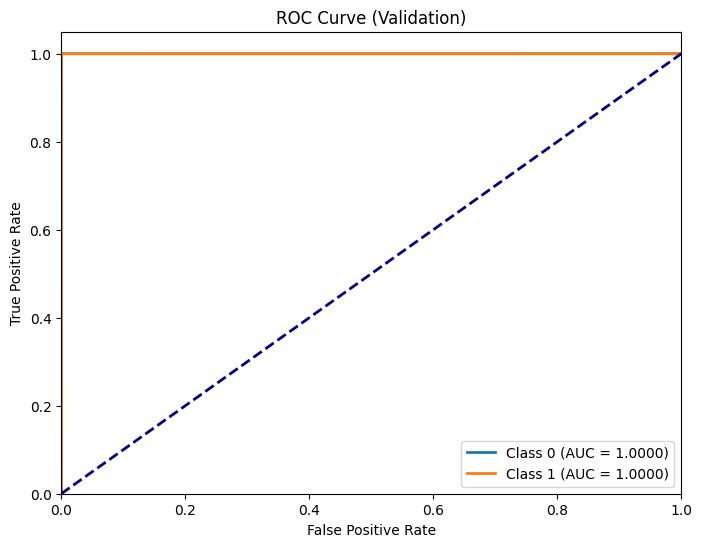

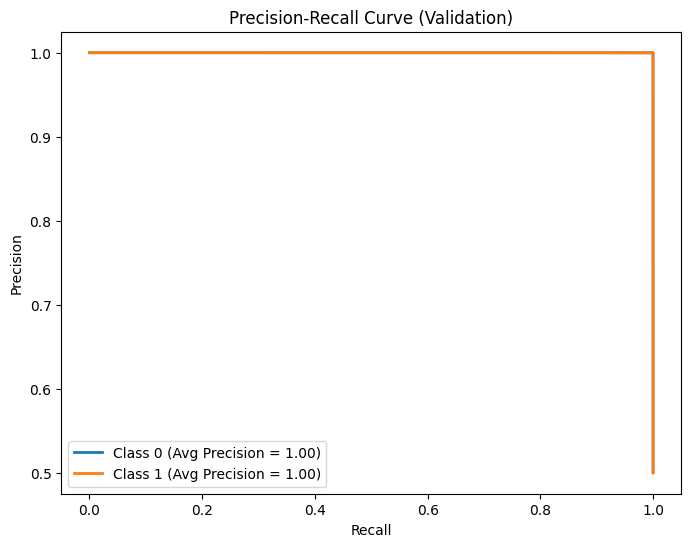

1191/1191 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Test Loss: 0.004678
Test Accuracy: 0.999449
Test F1-Score: 0.999202
Test Precision: 0.999055
Test Recall: 0.999350
Test Evaluation Time: 4.03 seconds
Test Classification Report:
              precision    recall  f1-score   support

           0   0.998345  0.999172  0.998758      8454
           1   0.999764  0.999528  0.999646     29641

    accuracy                       0.999449     38095
   macro avg   0.999055  0.999350  0.999202     38095
weighted avg   0.999449  0.999449  0.999449     38095



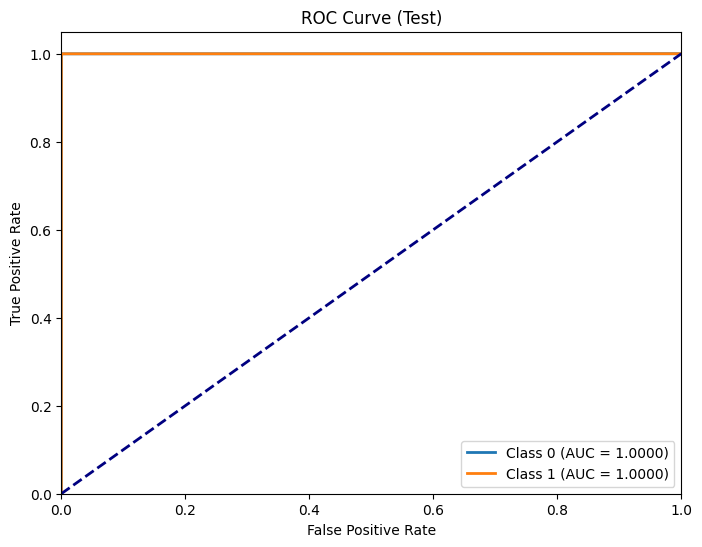

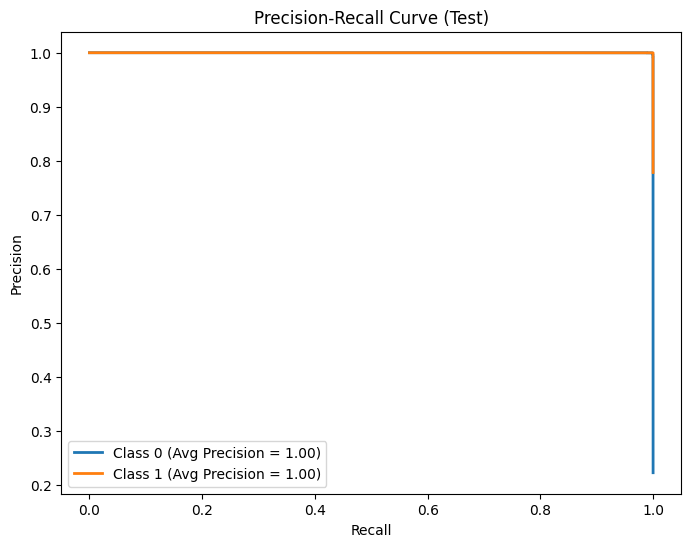

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score, average_precision_score
import seaborn as sns
import numpy as np
import time
# Function to evaluate the model
def evaluate_model(model, X, y_one_hot, dataset_name="Validation"):
    start_time = time.time()

    loss, accuracy = model.evaluate(X, y_one_hot, verbose=0)
    evaluation_time = time.time() - start_time

    predictions = model.predict(X)
    true_labels = np.argmax(y_one_hot, axis=1)
    pred_labels = np.argmax(predictions, axis=1)

    # # Calculate classification metrics
    val_f1 = f1_score(true_labels, pred_labels, average='macro')
    val_precision = precision_score(true_labels, pred_labels, average='macro')
    val_recall = recall_score(true_labels, pred_labels, average='macro')

    print(f"{dataset_name} Loss: {loss:.6f}")
    print(f"{dataset_name} Accuracy: {accuracy:.6f}")
    print(f"{dataset_name} F1-Score: {val_f1:.6f}")
    print(f"{dataset_name} Precision: {val_precision:.6f}")
    print(f"{dataset_name} Recall: {val_recall:.6f}")
    print(f"{dataset_name} Evaluation Time: {evaluation_time:.2f} seconds")

    target_names = [str(i) for i in range(2)]
    val_classification_report = classification_report(true_labels, pred_labels, target_names=target_names, digits=6)
    print(f"{dataset_name} Classification Report:")
    print(val_classification_report)

    # Plot ROC and AUC curves
    plot_roc_curve(true_labels, predictions, 2, dataset_name)

    # # Plot precision-recall curves
    plot_precision_recall_curve(true_labels, predictions, 2, dataset_name)

# Function to plot ROC and AUC curves
def plot_roc_curve(true_labels, predictions, num_classes, dataset_name):
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(true_labels, predictions[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.4f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({dataset_name})')
    plt.legend(loc="lower right")
    plt.show()

# Function to plot precision-recall curves
def plot_precision_recall_curve(true_labels, predictions, num_classes, dataset_name):
    precision = {}
    recall = {}
    average_precision = {}

    for i in range(num_classes):
        precision[i], recall[i], _ = precision_recall_curve(true_labels, predictions[:, i], pos_label=i)
        average_precision[i] = average_precision_score(true_labels, predictions[:, i], pos_label=i)

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (Avg Precision = {average_precision[i]:.2f})')

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve ({dataset_name})")
    plt.legend(loc="best")
    plt.show()

# Evaluate on the validation set
evaluate_model(model_lstm, X_TON_IOT_valid, y_TON_IOT_valid_one_hot, dataset_name="Validation")

# Evaluate on the test set
y_TON_IOT_test2_one_hot = tf.keras.utils.to_categorical(y_TON_IOT_test2, num_classes=2)
evaluate_model(model_lstm, X_TON_IOT_test2, y_TON_IOT_test2_one_hot, dataset_name="Test")

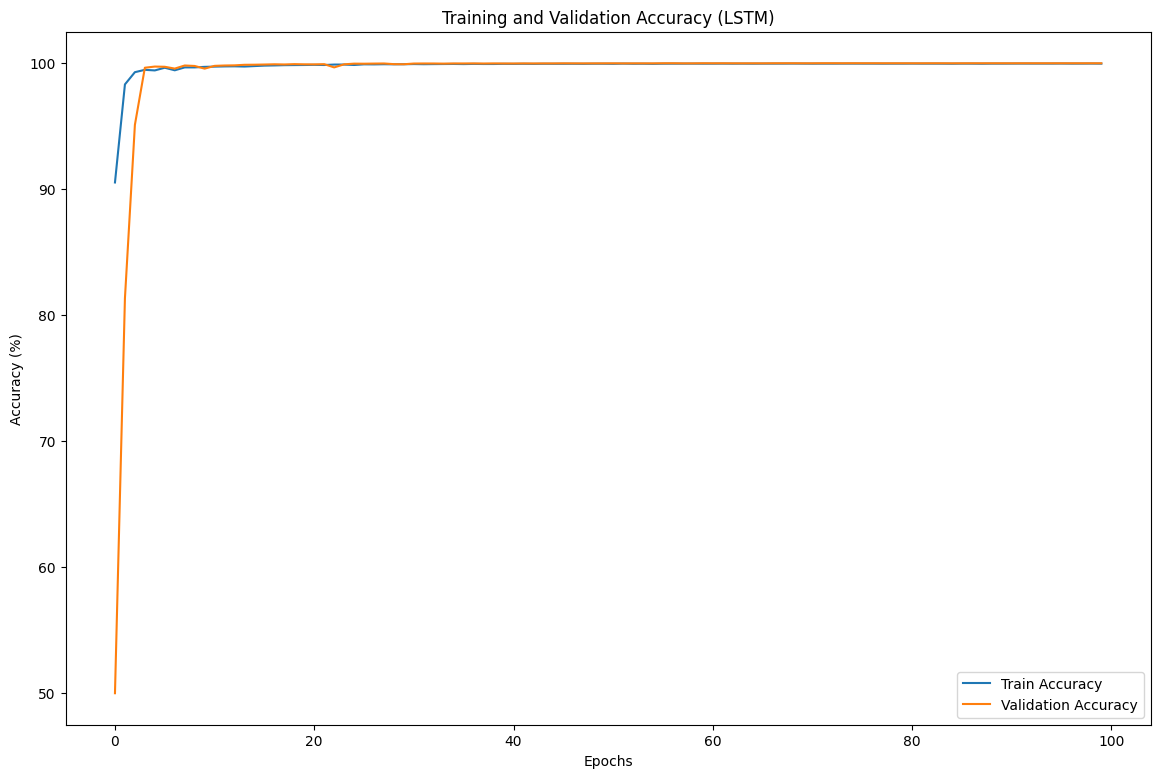

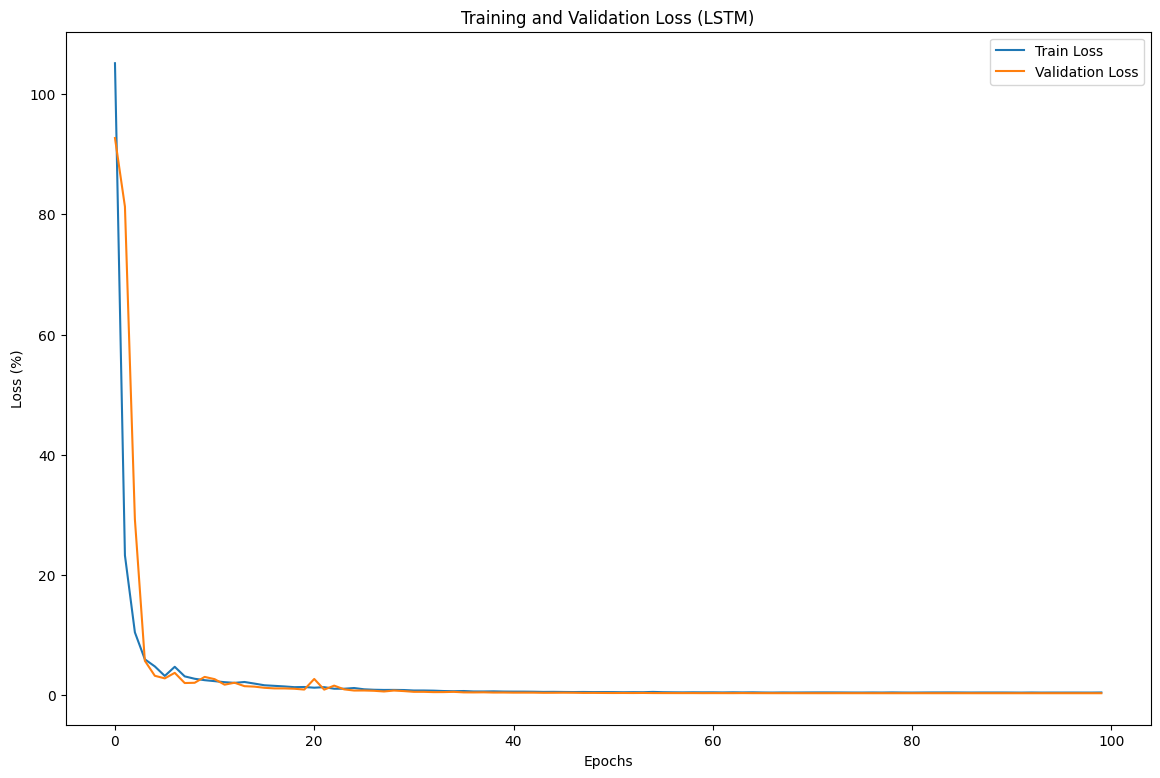

Epoch 1 - Train Loss: 105.13%, Validation Loss: 92.69%, Train Accuracy: 90.52%, Validation Accuracy: 50.00%
Epoch 2 - Train Loss: 23.28%, Validation Loss: 81.29%, Train Accuracy: 98.30%, Validation Accuracy: 81.34%
Epoch 3 - Train Loss: 10.47%, Validation Loss: 29.27%, Train Accuracy: 99.27%, Validation Accuracy: 95.09%
Epoch 4 - Train Loss: 5.99%, Validation Loss: 5.74%, Train Accuracy: 99.46%, Validation Accuracy: 99.62%
Epoch 5 - Train Loss: 4.81%, Validation Loss: 3.25%, Train Accuracy: 99.41%, Validation Accuracy: 99.72%
Epoch 6 - Train Loss: 3.23%, Validation Loss: 2.82%, Train Accuracy: 99.62%, Validation Accuracy: 99.70%
Epoch 7 - Train Loss: 4.75%, Validation Loss: 3.74%, Train Accuracy: 99.42%, Validation Accuracy: 99.56%
Epoch 8 - Train Loss: 3.16%, Validation Loss: 2.05%, Train Accuracy: 99.65%, Validation Accuracy: 99.80%
Epoch 9 - Train Loss: 2.76%, Validation Loss: 2.09%, Train Accuracy: 99.65%, Validation Accuracy: 99.76%
Epoch 10 - Train Loss: 2.52%, Validation Loss: 3

In [ ]:
# Plot the learning curves for accuracy
plt.figure(figsize=(14, 9))
plt.plot(np.array(history_lstm.history['accuracy']) * 100, label='Train Accuracy')
plt.plot(np.array(history_lstm.history['val_accuracy']) * 100, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy (LSTM)')
plt.legend()
plt.show()
# Plot the learning curves for loss
plt.figure(figsize=(14, 9))
plt.plot(np.array(history_lstm.history['loss']) * 100, label='Train Loss')
plt.plot(np.array(history_lstm.history['val_loss']) * 100, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (%)')  # Indiquer que la perte est en pourcentage
plt.title('Training and Validation Loss (LSTM)')
plt.legend()
plt.show()

# Display loss and accuracy in percentage for each epoch
for epoch, (loss, val_loss, accuracy, val_accuracy) in enumerate(zip(history_lstm.history['loss'],
                                                                      history_lstm.history['val_loss'],
                                                                      history_lstm.history['accuracy'],
                                                                      history_lstm.history['val_accuracy']), 1):
    print(f"Epoch {epoch} - Train Loss: {loss * 100:.2f}%, Validation Loss: {val_loss * 100:.2f}%, Train Accuracy: {accuracy * 100:.2f}%, Validation Accuracy: {val_accuracy * 100:.2f}%")

In [ ]:
import pickle

with open('history_lstm.pkl', 'wb') as file:
    pickle.dump(history_lstm.history, file)

 # ***RNN***


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, precision_score, recall_score
import seaborn as sns


def scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)  # Ensure it returns a float
    else:
        return float(lr * tf.math.exp(-0.1))  # Ensure it returns a float

lr_scheduler = LearningRateScheduler(scheduler)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# RNN Model definition
model_rnn = Sequential()
model_rnn.add(SimpleRNN(128, activation='tanh', return_sequences=True, input_shape=X_TON_IOT_train.shape[1:], kernel_regularizer=l2(0.01)))
model_rnn.add(BatchNormalization())
model_rnn.add(Dropout(0.5))
model_rnn.add(SimpleRNN(256, activation='tanh', kernel_regularizer=l2(0.01)))
model_rnn.add(BatchNormalization())
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(2, activation='softmax'))

model_rnn.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()

history_rnn = model_rnn.fit(X_TON_IOT_train, y_TON_IOT_train_one_hot, epochs=100, batch_size=1024,
                            validation_data=(X_TON_IOT_valid, y_TON_IOT_valid_one_hot),
                            callbacks=[lr_scheduler], verbose=1)
end_time = time.time()
training_time = end_time - start_time
 # training_time
print(f"Le temps d'entraînement du modèle SimpleRNN est de {training_time:.2f} secondes.")

Epoch 1/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 17s 59ms/step - accuracy: 0.9392 - loss: 1.4338 - val_accuracy: 0.9964 - val_loss: 0.2381 - learning_rate: 0.0010
Epoch 2/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.9969 - loss: 0.1570 - val_accuracy: 0.9966 - val_loss: 0.0484 - learning_rate: 0.0010
Epoch 3/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9969 - loss: 0.0423 - val_accuracy: 0.9980 - val_loss: 0.0247 - learning_rate: 0.0010
Epoch 4/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9976 - loss: 0.0264 - val_accuracy: 0.9986 - val_loss: 0.0165 - learning_rate: 0.0010
Epoch 5/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9700 - loss: 0.1756 - val_accuracy: 0.9958 - val_loss: 0.0677 - learning_rate: 0.0010
Epoch 6/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.9966 - loss: 0.0552 - val_accuracy: 0.9979 - val_loss: 0.0281 - learning_rate: 0.0010
Epoch 7/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9974 -

1849/1849 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step
Validation Loss: 0.013988
Validation Accuracy: 0.998546
Validation F1-Score: 0.998546
Validation Precision: 0.998547
Validation Recall: 0.998546
Validation Evaluation Time: 9.04 seconds
Validation Classification Report:
              precision    recall  f1-score   support

           0   0.999323  0.997768  0.998545     29571
           1   0.997772  0.999324  0.998547     29571

    accuracy                       0.998546     59142
   macro avg   0.998547  0.998546  0.998546     59142
weighted avg   0.998547  0.998546  0.998546     59142



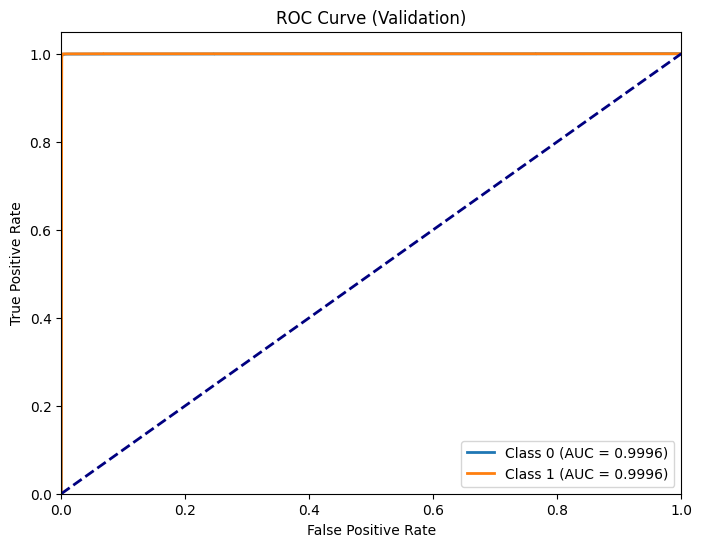

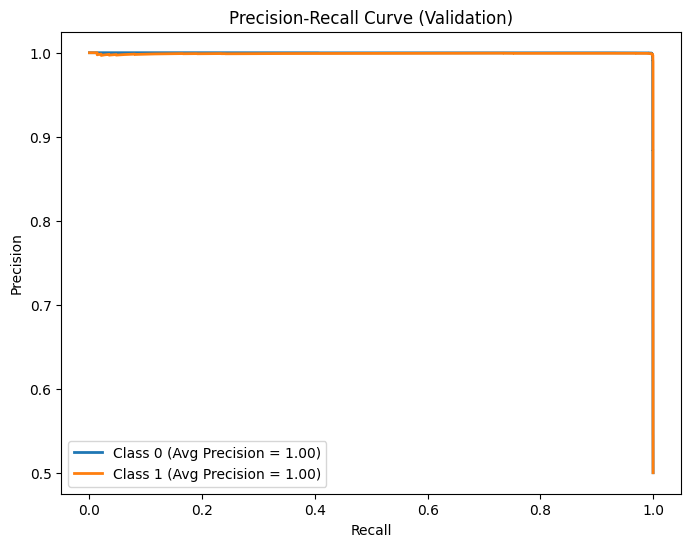

1191/1191 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step
Test Loss: 0.015138
Test Accuracy: 0.998582
Test F1-Score: 0.997949
Test Precision: 0.997697
Test Recall: 0.998201
Test Evaluation Time: 10.32 seconds
Test Classification Report:
              precision    recall  f1-score   support

           0   0.996102  0.997516  0.996809      8454
           1   0.999291  0.998887  0.999089     29641

    accuracy                       0.998582     38095
   macro avg   0.997697  0.998201  0.997949     38095
weighted avg   0.998583  0.998582  0.998583     38095



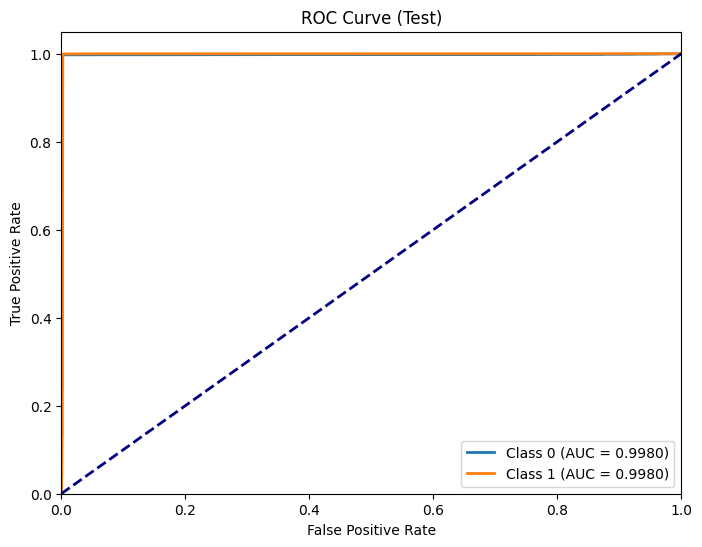

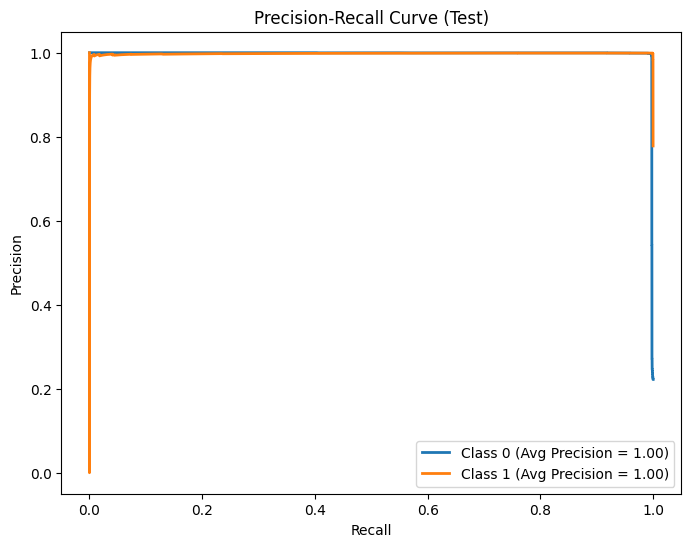

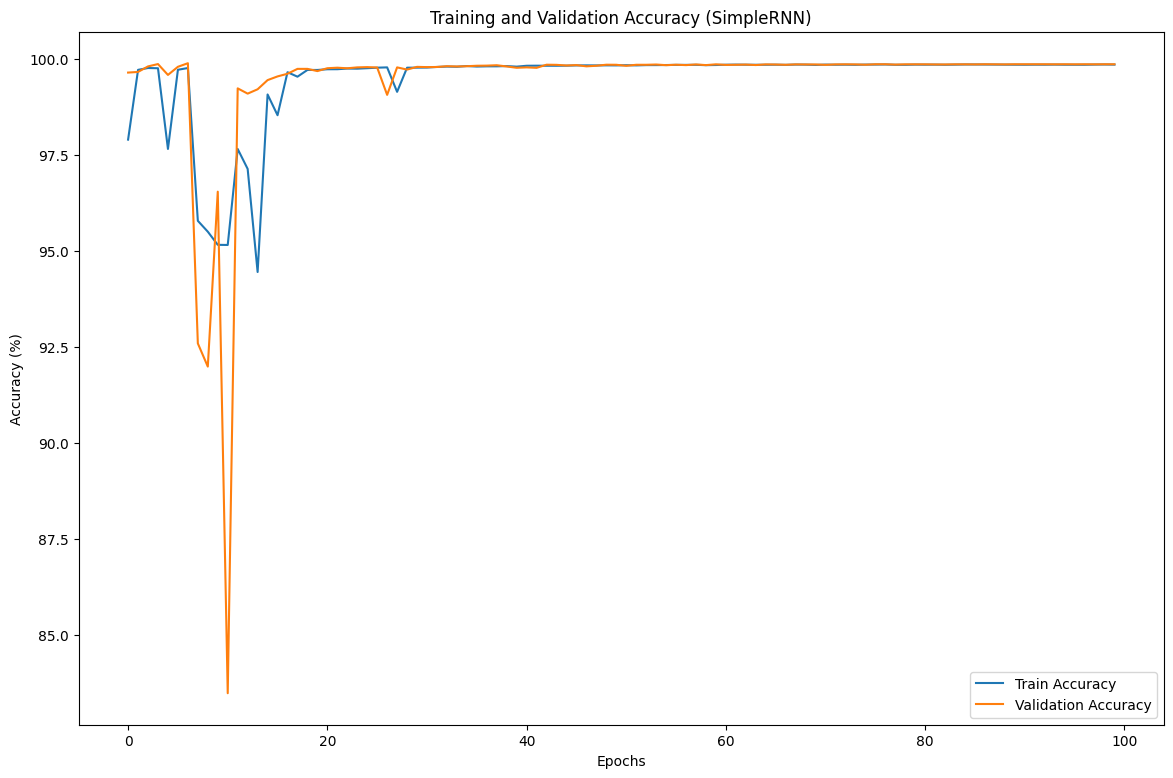

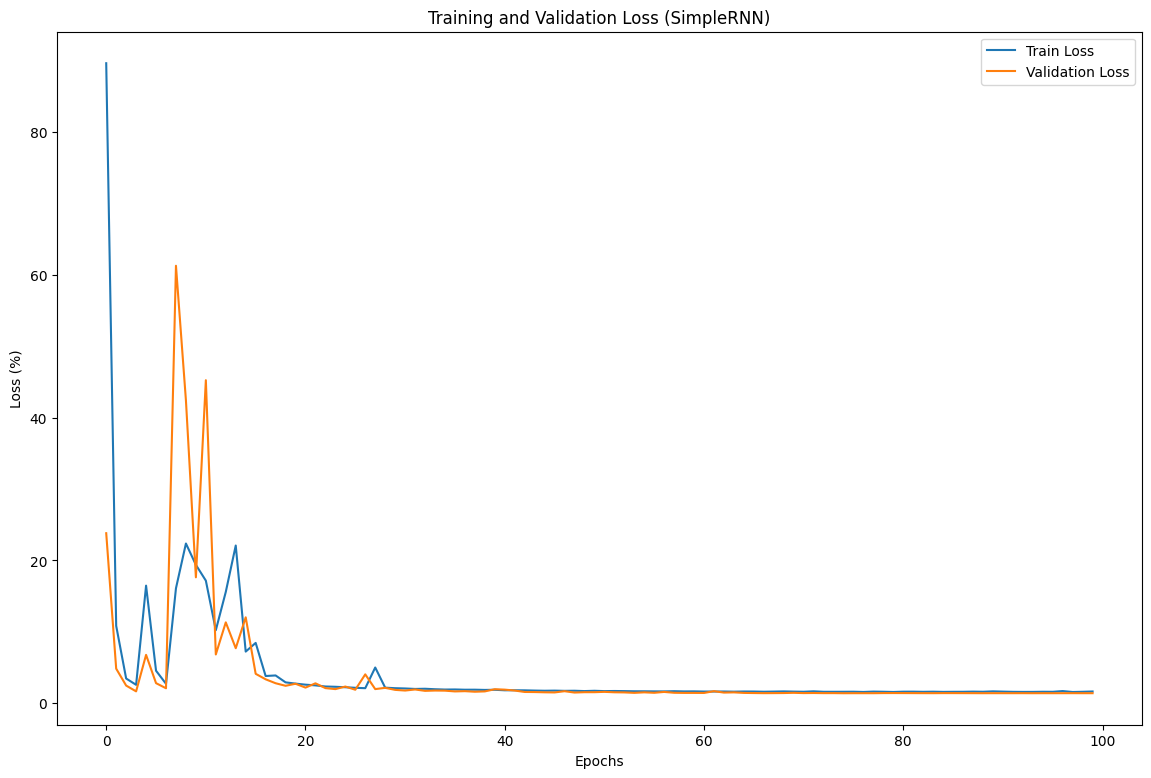

Epoch 1 - Train Loss: 89.66%, Validation Loss: 23.81%, Train Accuracy: 97.89%, Validation Accuracy: 99.64%
Epoch 2 - Train Loss: 10.84%, Validation Loss: 4.84%, Train Accuracy: 99.71%, Validation Accuracy: 99.66%
Epoch 3 - Train Loss: 3.46%, Validation Loss: 2.47%, Train Accuracy: 99.76%, Validation Accuracy: 99.80%
Epoch 4 - Train Loss: 2.57%, Validation Loss: 1.65%, Train Accuracy: 99.75%, Validation Accuracy: 99.86%
Epoch 5 - Train Loss: 16.47%, Validation Loss: 6.77%, Train Accuracy: 97.65%, Validation Accuracy: 99.58%
Epoch 6 - Train Loss: 4.55%, Validation Loss: 2.81%, Train Accuracy: 99.71%, Validation Accuracy: 99.79%
Epoch 7 - Train Loss: 2.72%, Validation Loss: 2.09%, Train Accuracy: 99.76%, Validation Accuracy: 99.88%
Epoch 8 - Train Loss: 16.09%, Validation Loss: 61.28%, Train Accuracy: 95.78%, Validation Accuracy: 92.59%
Epoch 9 - Train Loss: 22.37%, Validation Loss: 42.43%, Train Accuracy: 95.50%, Validation Accuracy: 91.99%
Epoch 10 - Train Loss: 19.38%, Validation Loss:

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score, average_precision_score # Import average_precision_score
import seaborn as sns


def evaluate_model(model, X, y_one_hot, dataset_name="Validation"):
    start_time = time.time()

    loss, accuracy = model.evaluate(X, y_one_hot, verbose=0)
    evaluation_time = time.time() - start_time

    predictions = model.predict(X)
    true_labels = np.argmax(y_one_hot, axis=1)
    pred_labels = np.argmax(predictions, axis=1)


    val_f1 = f1_score(true_labels, pred_labels, average='macro')
    val_precision = precision_score(true_labels, pred_labels, average='macro')
    val_recall = recall_score(true_labels, pred_labels, average='macro')

    print(f"{dataset_name} Loss: {loss:.6f}")
    print(f"{dataset_name} Accuracy: {accuracy:.6f}")
    print(f"{dataset_name} F1-Score: {val_f1:.6f}")
    print(f"{dataset_name} Precision: {val_precision:.6f}")
    print(f"{dataset_name} Recall: {val_recall:.6f}")
    print(f"{dataset_name} Evaluation Time: {evaluation_time:.2f} seconds")

    target_names = [str(i) for i in range(2)]
    val_classification_report = classification_report(true_labels, pred_labels, target_names=target_names, digits=6)
    print(f"{dataset_name} Classification Report:")
    print(val_classification_report)


    plot_roc_curve(true_labels, predictions, 2, dataset_name)


    plot_precision_recall_curve(true_labels, predictions, 2, dataset_name)


def plot_roc_curve(true_labels, predictions, num_classes, dataset_name):
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(true_labels, predictions[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.4f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({dataset_name})')
    plt.legend(loc="lower right")
    plt.show()


def plot_precision_recall_curve(true_labels, predictions, num_classes, dataset_name):
    precision = {}
    recall = {}
    average_precision = {}

    for i in range(num_classes):
        precision[i], recall[i], _ = precision_recall_curve(true_labels, predictions[:, i], pos_label=i)
        average_precision[i] = average_precision_score(true_labels, predictions[:, i], pos_label=i)

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (Avg Precision = {average_precision[i]:.2f})')

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve ({dataset_name})")
    plt.legend(loc="best")
    plt.show()


evaluate_model(model_rnn, X_TON_IOT_valid, y_TON_IOT_valid_one_hot, dataset_name="Validation")



y_TON_IOT_test2_one_hot = tf.keras.utils.to_categorical(y_TON_IOT_test2, num_classes=2)
evaluate_model(model_rnn, X_TON_IOT_test2, y_TON_IOT_test2_one_hot, dataset_name="Test")


plt.figure(figsize=(14, 9))
plt.plot(np.array(history_rnn.history['accuracy']) * 100, label='Train Accuracy')
plt.plot(np.array(history_rnn.history['val_accuracy']) * 100, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy (SimpleRNN)')
plt.legend()
plt.show()

plt.figure(figsize=(14, 9))
plt.plot(np.array(history_rnn.history['loss']) * 100, label='Train Loss')
plt.plot(np.array(history_rnn.history['val_loss']) * 100, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (%)')
plt.title('Training and Validation Loss (SimpleRNN)')
plt.legend()
plt.show()


for epoch, (loss, val_loss, accuracy, val_accuracy) in enumerate(zip(history_rnn.history['loss'],
                                                                      history_rnn.history['val_loss'],
                                                                      history_rnn.history['accuracy'],
                                                                      history_rnn.history['val_accuracy']), 1):
    print(f"Epoch {epoch} - Train Loss: {loss * 100:.2f}%, Validation Loss: {val_loss * 100:.2f}%, Train Accuracy: {accuracy * 100:.2f}%, Validation Accuracy: {val_accuracy * 100:.2f}%")

In [ ]:
import pickle
with open('history_rnn.pkl', 'wb') as file:
    pickle.dump(history_rnn.history, file)

 # ***GRU***


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, precision_score, recall_score
import seaborn as sns
import time
import numpy as np


def scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)  # Ensure it returns a float
    else:
        return float(lr * tf.math.exp(-0.1))  # Ensure it returns a float

lr_scheduler = LearningRateScheduler(scheduler)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#GRU model
model_gru = Sequential()
model_gru.add(GRU(128, activation='tanh', return_sequences=True, input_shape=X_TON_IOT_train.shape[1:], kernel_regularizer=l2(0.01)))
model_gru.add(BatchNormalization())
model_gru.add(Dropout(0.5))
model_gru.add(GRU(256, activation='tanh', kernel_regularizer=l2(0.01)))
model_gru.add(BatchNormalization())
model_gru.add(Dropout(0.5))
model_gru.add(Dense(2, activation='softmax'))

model_gru.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()


history_gru = model_gru.fit(X_TON_IOT_train, y_TON_IOT_train_one_hot, epochs=100, batch_size=1024,
                            validation_data=(X_TON_IOT_valid, y_TON_IOT_valid_one_hot),
                            callbacks=[lr_scheduler], verbose=1)
end_time = time.time()
training_time = end_time - start_time

 # training_time
print(f"Le temps d'entraînement du modèle GRU est de {training_time:.2f} secondes.")

Epoch 1/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - accuracy: 0.7839 - loss: 1.4888 - val_accuracy: 0.5000 - val_loss: 1.2172 - learning_rate: 0.0010
Epoch 2/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.9934 - loss: 0.1051 - val_accuracy: 0.4965 - val_loss: 1.8195 - learning_rate: 0.0010
Epoch 3/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.9958 - loss: 0.0479 - val_accuracy: 0.4982 - val_loss: 1.4250 - learning_rate: 0.0010
Epoch 4/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.9964 - loss: 0.0319 - val_accuracy: 0.9970 - val_loss: 0.0256 - learning_rate: 0.0010
Epoch 5/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.9969 - loss: 0.0263 - val_accuracy: 0.9969 - val_loss: 0.0229 - learning_rate: 0.0010
Epoch 6/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.9971 - loss: 0.0230 - val_accuracy: 0.9974 - val_loss: 0.0195 - learning_rate: 0.0010
Epoch 7/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.9

Le temps d'entraînement du modèle GRU est de 1015.78 secondes.
1849/1849 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
Validation Loss: 0.003106
Validation Accuracy: 0.999645
Validation F1-Score: 0.999645
Validation Precision: 0.999645
Validation Recall: 0.999645
Validation Evaluation Time: 10.29 seconds
Validation Classification Report:
              precision    recall  f1-score   support

           0   0.999865  0.999425  0.999645     29571
           1   0.999425  0.999865  0.999645     29571

    accuracy                       0.999645     59142
   macro avg   0.999645  0.999645  0.999645     59142
weighted avg   0.999645  0.999645  0.999645     59142



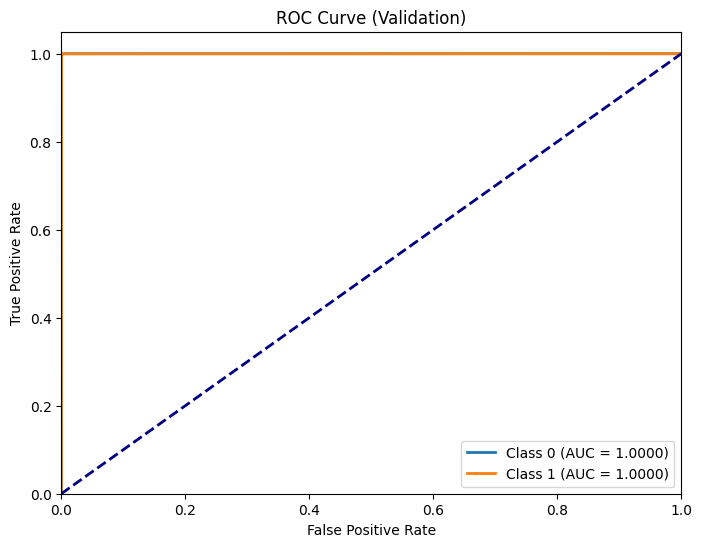

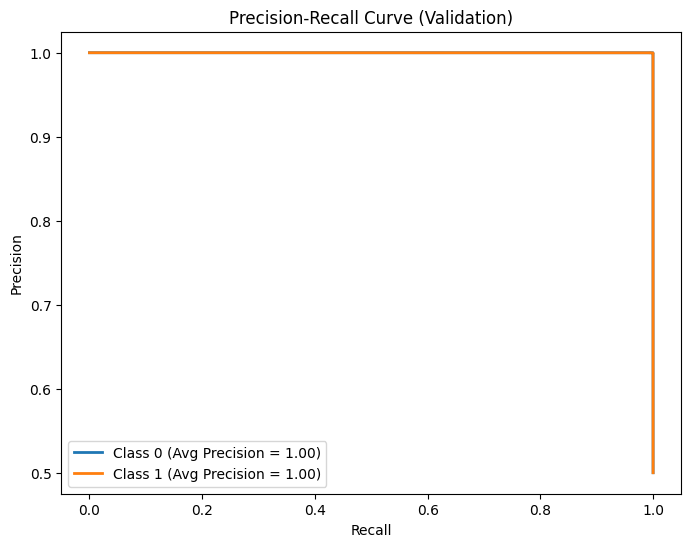

1191/1191 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Test Loss: 0.003478
Test Accuracy: 0.999580
Test F1-Score: 0.999392
Test Precision: 0.999434
Test Recall: 0.999350
Test Evaluation Time: 4.30 seconds
Test Classification Report:
              precision    recall  f1-score   support

           0   0.999172  0.998935  0.999054      8454
           1   0.999696  0.999764  0.999730     29641

    accuracy                       0.999580     38095
   macro avg   0.999434  0.999350  0.999392     38095
weighted avg   0.999580  0.999580  0.999580     38095



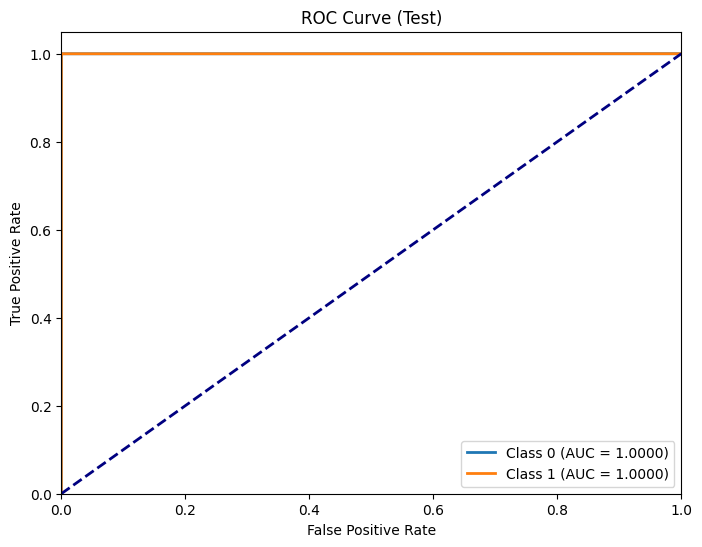

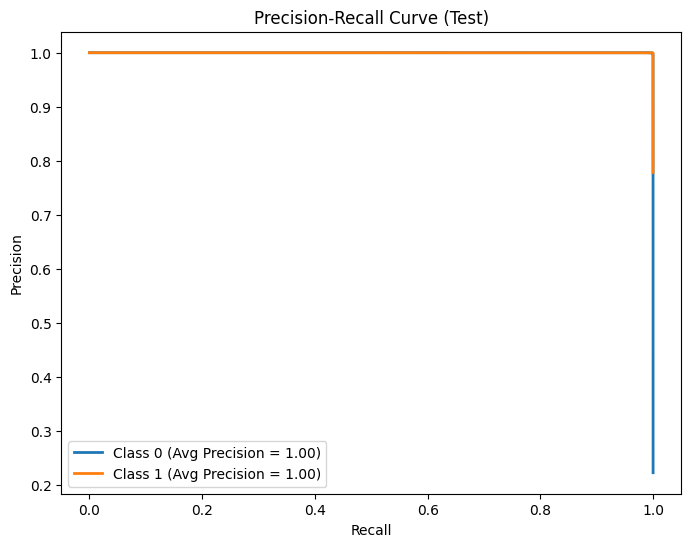

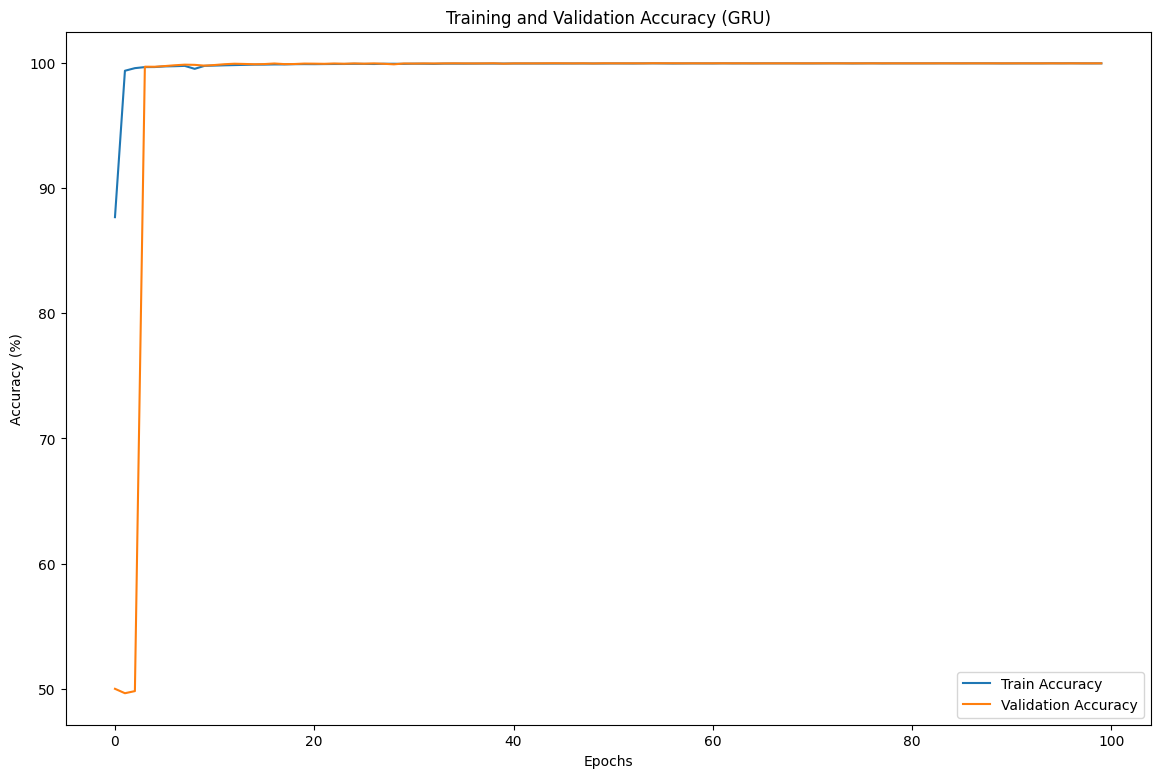

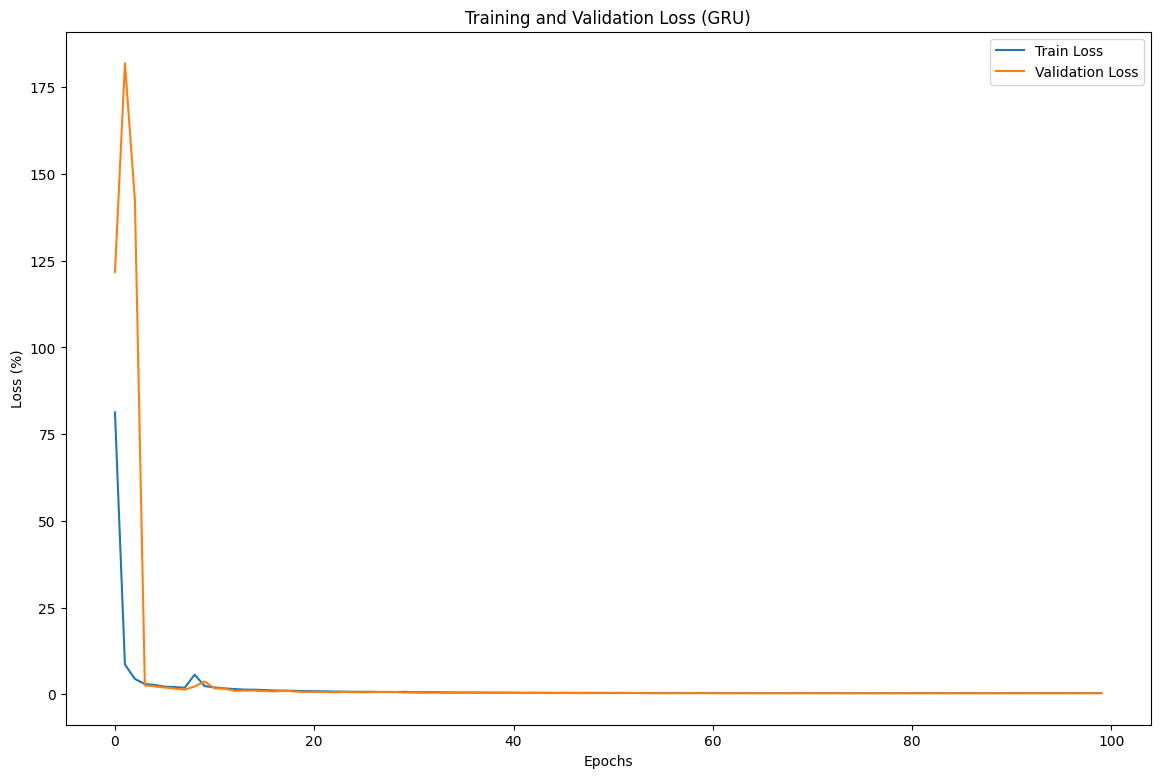

Epoch 1 - Train Loss: 81.28%, Validation Loss: 121.72%, Train Accuracy: 87.68%, Validation Accuracy: 50.00%
Epoch 2 - Train Loss: 8.59%, Validation Loss: 181.95%, Train Accuracy: 99.37%, Validation Accuracy: 49.65%
Epoch 3 - Train Loss: 4.42%, Validation Loss: 142.50%, Train Accuracy: 99.58%, Validation Accuracy: 49.82%
Epoch 4 - Train Loss: 2.97%, Validation Loss: 2.56%, Train Accuracy: 99.66%, Validation Accuracy: 99.70%
Epoch 5 - Train Loss: 2.71%, Validation Loss: 2.29%, Train Accuracy: 99.67%, Validation Accuracy: 99.69%
Epoch 6 - Train Loss: 2.20%, Validation Loss: 1.95%, Train Accuracy: 99.72%, Validation Accuracy: 99.74%
Epoch 7 - Train Loss: 2.09%, Validation Loss: 1.65%, Train Accuracy: 99.73%, Validation Accuracy: 99.81%
Epoch 8 - Train Loss: 1.89%, Validation Loss: 1.36%, Train Accuracy: 99.76%, Validation Accuracy: 99.86%
Epoch 9 - Train Loss: 5.67%, Validation Loss: 2.26%, Train Accuracy: 99.52%, Validation Accuracy: 99.84%
Epoch 10 - Train Loss: 2.36%, Validation Loss: 3

In [ ]:
print(f"Le temps d'entraînement du modèle GRU est de {training_time:.2f} secondes.")


def evaluate_model(model, X, y_one_hot, dataset_name="Validation"):
    start_time = time.time()

    loss, accuracy = model.evaluate(X, y_one_hot, verbose=0)
    evaluation_time = time.time() - start_time

    predictions = model.predict(X)
    true_labels = np.argmax(y_one_hot, axis=1)
    pred_labels = np.argmax(predictions, axis=1)


    val_f1 = f1_score(true_labels, pred_labels, average='macro')
    val_precision = precision_score(true_labels, pred_labels, average='macro')
    val_recall = recall_score(true_labels, pred_labels, average='macro')

    print(f"{dataset_name} Loss: {loss:.6f}")
    print(f"{dataset_name} Accuracy: {accuracy:.6f}")
    print(f"{dataset_name} F1-Score: {val_f1:.6f}")
    print(f"{dataset_name} Precision: {val_precision:.6f}")
    print(f"{dataset_name} Recall: {val_recall:.6f}")
    print(f"{dataset_name} Evaluation Time: {evaluation_time:.2f} seconds")

    target_names = [str(i) for i in range(2)]
    val_classification_report = classification_report(true_labels, pred_labels, target_names=target_names, digits=6)
    print(f"{dataset_name} Classification Report:")
    print(val_classification_report)


    plot_roc_curve(true_labels, predictions, 2, dataset_name)
    plot_precision_recall_curve(true_labels, predictions, 2, dataset_name)


def plot_roc_curve(true_labels, predictions, num_classes, dataset_name):
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(true_labels, predictions[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.4f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({dataset_name})')
    plt.legend(loc="lower right")
    plt.show()


def plot_precision_recall_curve(true_labels, predictions, num_classes, dataset_name):
    precision = {}
    recall = {}
    average_precision = {}

    for i in range(num_classes):
        precision[i], recall[i], _ = precision_recall_curve(true_labels, predictions[:, i], pos_label=i)
        average_precision[i] = average_precision_score(true_labels, predictions[:, i], pos_label=i)

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (Avg Precision = {average_precision[i]:.2f})')

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve ({dataset_name})")
    plt.legend(loc="best")
    plt.show()


evaluate_model(model_gru, X_TON_IOT_valid, y_TON_IOT_valid_one_hot, dataset_name="Validation")


y_TON_IOT_test2_one_hot = tf.keras.utils.to_categorical(y_TON_IOT_test2, num_classes=2)
evaluate_model(model_gru, X_TON_IOT_test2, y_TON_IOT_test2_one_hot, dataset_name="Test")


plt.figure(figsize=(14, 9))
plt.plot(np.array(history_gru.history['accuracy']) * 100, label='Train Accuracy')
plt.plot(np.array(history_gru.history['val_accuracy']) * 100, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy (GRU)')
plt.legend()
plt.show()

plt.figure(figsize=(14, 9))
plt.plot(np.array(history_gru.history['loss']) * 100, label='Train Loss')
plt.plot(np.array(history_gru.history['val_loss']) * 100, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (%)')
plt.title('Training and Validation Loss (GRU)')
plt.legend()
plt.show()


for epoch, (loss, val_loss, accuracy, val_accuracy) in enumerate(zip(history_gru.history['loss'],
                                                                      history_gru.history['val_loss'],
                                                                      history_gru.history['accuracy'],
                                                                      history_gru.history['val_accuracy']), 1):
    print(f"Epoch {epoch} - Train Loss: {loss * 100:.2f}%, Validation Loss: {val_loss * 100:.2f}%, Train Accuracy: {accuracy * 100:.2f}%, Validation Accuracy: {val_accuracy * 100:.2f}%")

In [ ]:
import pickle
# Sauvegarder l'objet history_lstm
with open('history_gru.pkl', 'wb') as file:
    pickle.dump(history_gru.history, file)

 # ***CNN_LSTM***

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense, BatchNormalization, Conv1D, MaxPooling1D, Flatten,LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, precision_score, recall_score
import seaborn as sns


def scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)  # Ensure it returns a float
    else:
        return float(lr * tf.math.exp(-0.1))  # Ensure it returns a float

lr_scheduler = LearningRateScheduler(scheduler)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# CNN_LSTM model
model_lstm_cnn = Sequential()
model_lstm_cnn.add(Conv1D(64, 3, activation='relu', input_shape=X_TON_IOT_train.shape[1:]))
model_lstm_cnn.add(MaxPooling1D(pool_size=2))
model_lstm_cnn.add(Conv1D(128, 3, activation='relu'))
model_lstm_cnn.add(MaxPooling1D(pool_size=2))
model_lstm_cnn.add(LSTM(128, activation='tanh', return_sequences=True, kernel_regularizer=l2(0.01)))
model_lstm_cnn.add(BatchNormalization())
model_lstm_cnn.add(Dropout(0.5))
model_lstm_cnn.add(LSTM(256, activation='tanh', kernel_regularizer=l2(0.01)))
model_lstm_cnn.add(BatchNormalization())
model_lstm_cnn.add(Dropout(0.5))
model_lstm_cnn.add(Flatten())
model_lstm_cnn.add(Dense(2, activation='softmax'))

model_lstm_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
# Entraînement du modèle LSTM avec Conv1D
history_lstm_cnn = model_lstm_cnn.fit(X_TON_IOT_train, y_TON_IOT_train_one_hot, epochs=100, batch_size=1024,
                                      validation_data=(X_TON_IOT_valid, y_TON_IOT_valid_one_hot),
                                      callbacks=[lr_scheduler], verbose=1)
end_time = time.time()
training_time = end_time - start_time

# training_time
print(f"Le temps d'entraînement du modèle CNN_LSTM est de {training_time:.2f} secondes.")

Epoch 1/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.9384 - loss: 2.3652 - val_accuracy: 0.5002 - val_loss: 1.1574 - learning_rate: 0.0010
Epoch 2/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9960 - loss: 0.2174 - val_accuracy: 0.5003 - val_loss: 0.8175 - learning_rate: 0.0010
Epoch 3/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9967 - loss: 0.0765 - val_accuracy: 0.9974 - val_loss: 0.0555 - learning_rate: 0.0010
Epoch 4/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9971 - loss: 0.0386 - val_accuracy: 0.7812 - val_loss: 0.5470 - learning_rate: 0.0010
Epoch 5/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9976 - loss: 0.0218 - val_accuracy: 0.6852 - val_loss: 0.7910 - learning_rate: 0.0010
Epoch 6/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9971 - loss: 0.0202 - val_accuracy: 0.9950 - val_loss: 0.0218 - learning_rate: 0.0010
Epoch 7/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9978 - l

1849/1849 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Validation Loss: 0.003039
Validation Accuracy: 0.999713
Validation F1-Score: 0.999713
Validation Precision: 0.999713
Validation Recall: 0.999713
Validation Evaluation Time: 6.30 seconds
Validation Classification Report:
              precision    recall  f1-score   support

           0   0.999763  0.999662  0.999713     29571
           1   0.999662  0.999763  0.999713     29571

    accuracy                       0.999713     59142
   macro avg   0.999713  0.999713  0.999713     59142
weighted avg   0.999713  0.999713  0.999713     59142



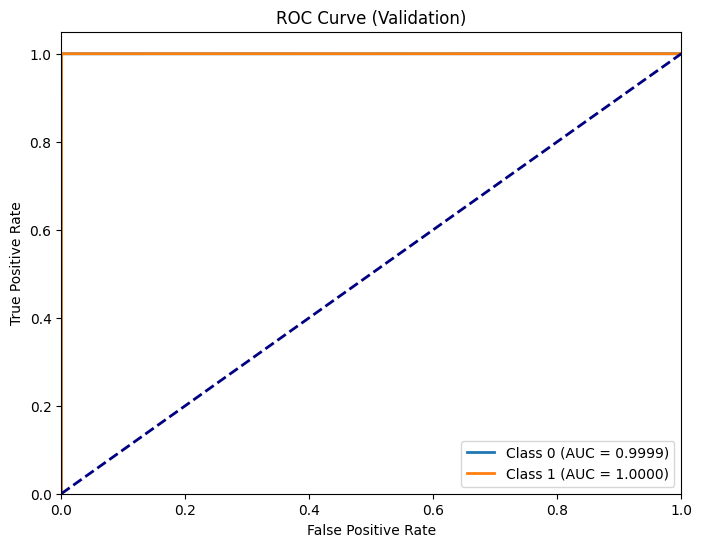

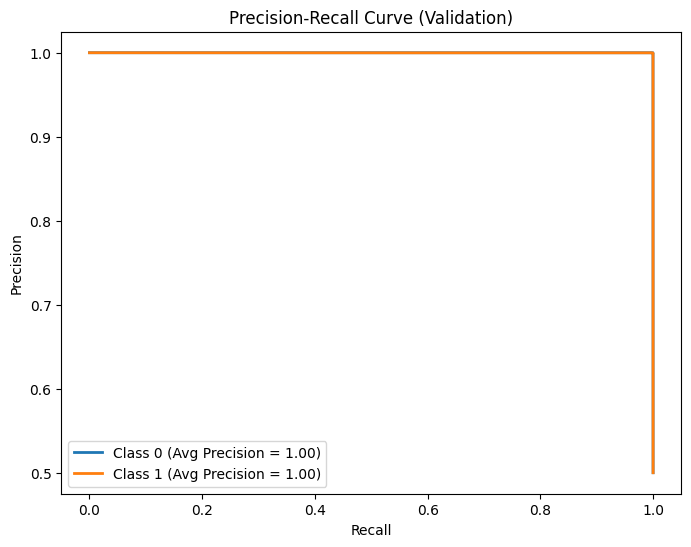

1191/1191 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Test Loss: 0.001372
Test Accuracy: 0.999711
Test F1-Score: 0.999582
Test Precision: 0.999561
Test Recall: 0.999603
Test Evaluation Time: 4.77 seconds
Test Classification Report:
              precision    recall  f1-score   support

           0   0.999290  0.999409  0.999349      8454
           1   0.999831  0.999798  0.999814     29641

    accuracy                       0.999711     38095
   macro avg   0.999561  0.999603  0.999582     38095
weighted avg   0.999711  0.999711  0.999711     38095



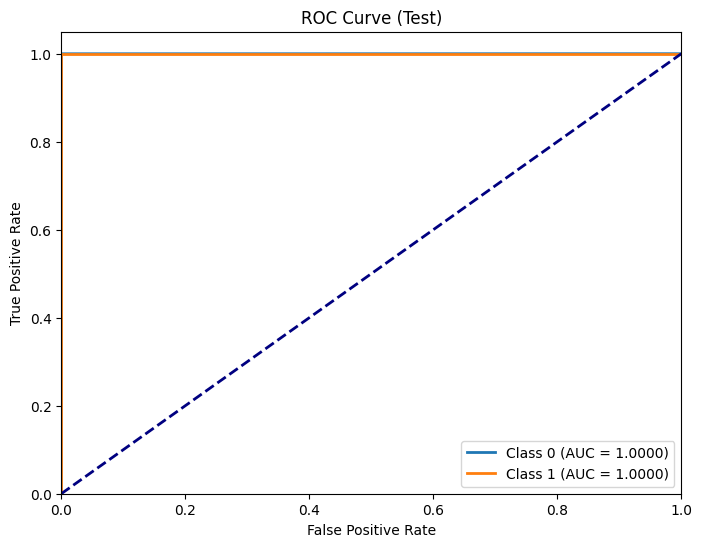

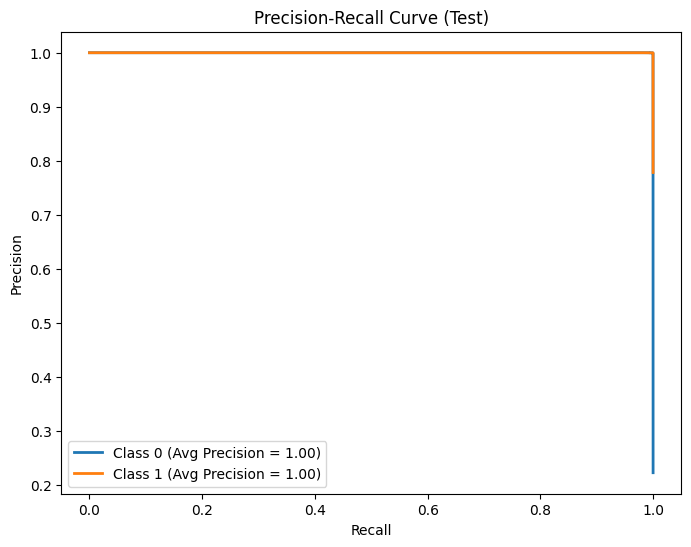

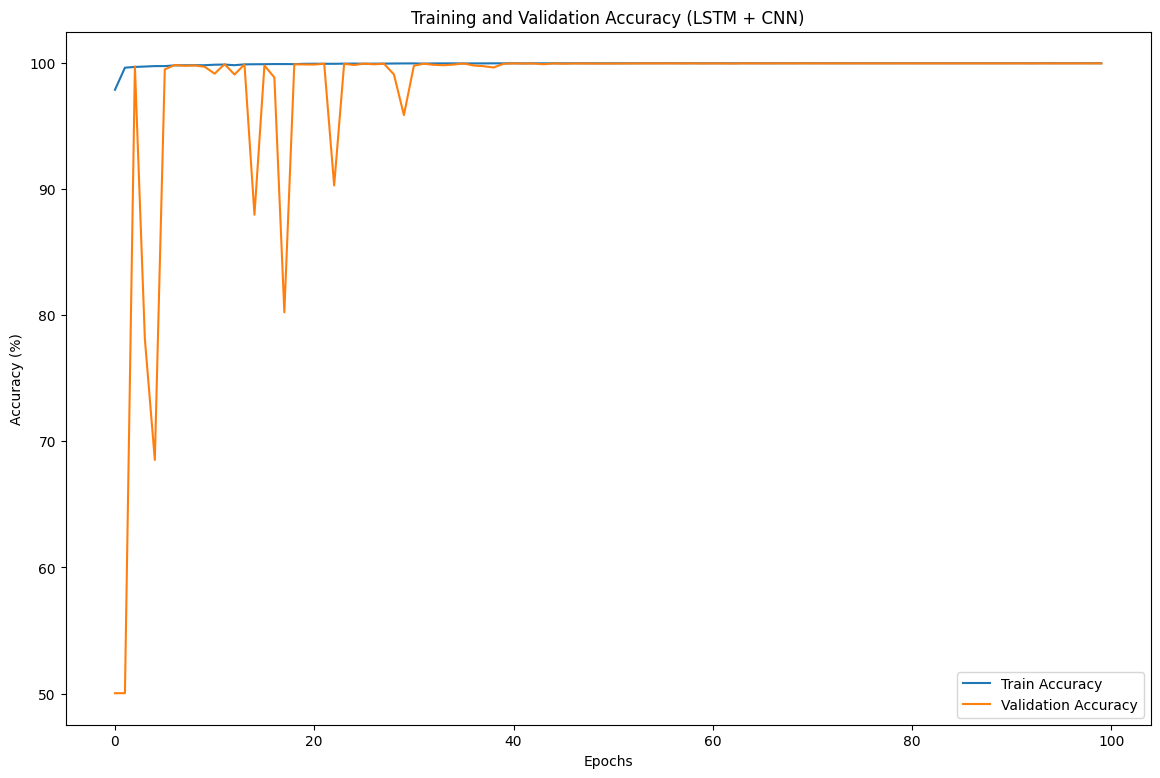

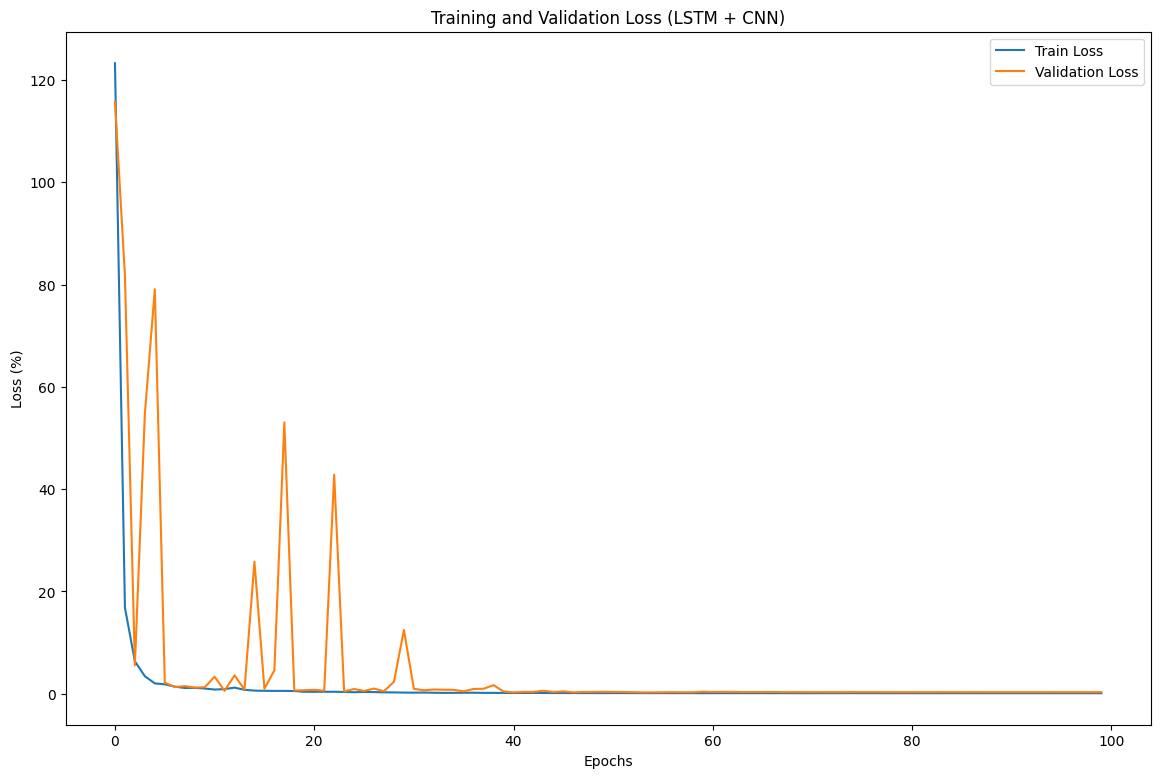

Epoch 1 - Train Loss: 123.27%, Validation Loss: 115.74%, Train Accuracy: 97.88%, Validation Accuracy: 50.02%
Epoch 2 - Train Loss: 16.83%, Validation Loss: 81.75%, Train Accuracy: 99.63%, Validation Accuracy: 50.03%
Epoch 3 - Train Loss: 6.32%, Validation Loss: 5.55%, Train Accuracy: 99.69%, Validation Accuracy: 99.74%
Epoch 4 - Train Loss: 3.42%, Validation Loss: 54.70%, Train Accuracy: 99.72%, Validation Accuracy: 78.12%
Epoch 5 - Train Loss: 2.01%, Validation Loss: 79.10%, Train Accuracy: 99.76%, Validation Accuracy: 68.52%
Epoch 6 - Train Loss: 1.83%, Validation Loss: 2.18%, Train Accuracy: 99.76%, Validation Accuracy: 99.50%
Epoch 7 - Train Loss: 1.38%, Validation Loss: 1.31%, Train Accuracy: 99.81%, Validation Accuracy: 99.84%
Epoch 8 - Train Loss: 1.12%, Validation Loss: 1.48%, Train Accuracy: 99.82%, Validation Accuracy: 99.79%
Epoch 9 - Train Loss: 1.14%, Validation Loss: 1.20%, Train Accuracy: 99.83%, Validation Accuracy: 99.81%
Epoch 10 - Train Loss: 1.01%, Validation Loss: 

In [ ]:

def evaluate_model(model, X, y_one_hot, dataset_name="Validation"):
    start_time = time.time()

    loss, accuracy = model.evaluate(X, y_one_hot, verbose=0)
    evaluation_time = time.time() - start_time

    predictions = model.predict(X)
    true_labels = np.argmax(y_one_hot, axis=1)
    pred_labels = np.argmax(predictions, axis=1)


    val_f1 = f1_score(true_labels, pred_labels, average='macro')
    val_precision = precision_score(true_labels, pred_labels, average='macro')
    val_recall = recall_score(true_labels, pred_labels, average='macro')

    print(f"{dataset_name} Loss: {loss:.6f}")
    print(f"{dataset_name} Accuracy: {accuracy:.6f}")
    print(f"{dataset_name} F1-Score: {val_f1:.6f}")
    print(f"{dataset_name} Precision: {val_precision:.6f}")
    print(f"{dataset_name} Recall: {val_recall:.6f}")
    print(f"{dataset_name} Evaluation Time: {evaluation_time:.2f} seconds")

    target_names = [str(i) for i in range(2)]
    val_classification_report = classification_report(true_labels, pred_labels, target_names=target_names, digits=6)
    print(f"{dataset_name} Classification Report:")
    print(val_classification_report)


    plot_roc_curve(true_labels, predictions, 2, dataset_name)
    plot_precision_recall_curve(true_labels, predictions, 2, dataset_name)


def plot_roc_curve(true_labels, predictions, num_classes, dataset_name):
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(true_labels, predictions[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.4f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({dataset_name})')
    plt.legend(loc="lower right")
    plt.show()


def plot_precision_recall_curve(true_labels, predictions, num_classes, dataset_name):
    precision = {}
    recall = {}
    average_precision = {}

    for i in range(num_classes):
        precision[i], recall[i], _ = precision_recall_curve(true_labels, predictions[:, i], pos_label=i)
        average_precision[i] = average_precision_score(true_labels, predictions[:, i], pos_label=i)

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (Avg Precision = {average_precision[i]:.2f})')

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve ({dataset_name})")
    plt.legend(loc="best")
    plt.show()


evaluate_model(model_lstm_cnn, X_TON_IOT_valid, y_TON_IOT_valid_one_hot, dataset_name="Validation")


y_TON_IOT_test2_one_hot = tf.keras.utils.to_categorical(y_TON_IOT_test2, num_classes=2)
evaluate_model(model_lstm_cnn, X_TON_IOT_test2, y_TON_IOT_test2_one_hot, dataset_name="Test")


plt.figure(figsize=(14, 9))
plt.plot(np.array(history_lstm_cnn.history['accuracy']) * 100, label='Train Accuracy')
plt.plot(np.array(history_lstm_cnn.history['val_accuracy']) * 100, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy (LSTM + CNN)')
plt.legend()
plt.show()

plt.figure(figsize=(14, 9))
plt.plot(np.array(history_lstm_cnn.history['loss']) * 100, label='Train Loss')
plt.plot(np.array(history_lstm_cnn.history['val_loss']) * 100, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (%)')
plt.title('Training and Validation Loss (LSTM + CNN)')
plt.legend()
plt.show()


for epoch, (loss, val_loss, accuracy, val_accuracy) in enumerate(zip(history_lstm_cnn.history['loss'],
                                                                      history_lstm_cnn.history['val_loss'],
                                                                      history_lstm_cnn.history['accuracy'],
                                                                      history_lstm_cnn.history['val_accuracy']), 1):
    print(f"Epoch {epoch} - Train Loss: {loss * 100:.2f}%, Validation Loss: {val_loss * 100:.2f}%, Train Accuracy: {accuracy * 100:.2f}%, Validation Accuracy: {val_accuracy * 100:.2f}%")



In [ ]:
import pickle
with open('history_lstm_cnn.pkl', 'wb') as file:
    pickle.dump(history_lstm_cnn.history, file)

# ***CNN_GRU***

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense, BatchNormalization, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
import time


def scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)  # Ensure it returns a float
    else:
        return float(lr * tf.math.exp(-0.1))  # Ensure it returns a float

lr_scheduler = LearningRateScheduler(scheduler)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#CNN_GRU Model
model_gru_cnn = Sequential()
model_gru_cnn.add(Conv1D(64, 3, activation='relu', input_shape=X_TON_IOT_train.shape[1:]))
model_gru_cnn.add(MaxPooling1D(pool_size=2))
model_gru_cnn.add(Conv1D(128, 3, activation='relu'))
model_gru_cnn.add(MaxPooling1D(pool_size=2))
model_gru_cnn.add(GRU(128, activation='tanh', return_sequences=True, kernel_regularizer=l2(0.01)))
model_gru_cnn.add(BatchNormalization())
model_gru_cnn.add(Dropout(0.5))
model_gru_cnn.add(GRU(256, activation='tanh', kernel_regularizer=l2(0.01)))
model_gru_cnn.add(BatchNormalization())
model_gru_cnn.add(Dropout(0.5))
model_gru_cnn.add(Flatten())
model_gru_cnn.add(Dense(2, activation='softmax'))

model_gru_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


start_time = time.time()

history_gru_cnn = model_gru_cnn.fit(X_TON_IOT_train, y_TON_IOT_train_one_hot, epochs=100, batch_size=1024,
                                    validation_data=(X_TON_IOT_valid, y_TON_IOT_valid_one_hot),
                                    callbacks=[lr_scheduler], verbose=1)
end_time = time.time()
training_time = end_time - start_time

 # training_time
print(f"Le temps d'entraînement du modèle CNN_GRU est de {training_time:.2f} secondes.")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.8944 - loss: 2.5454 - val_accuracy: 0.5000 - val_loss: 1.4332 - learning_rate: 0.0010
Epoch 2/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9944 - loss: 0.2460 - val_accuracy: 0.7190 - val_loss: 0.5256 - learning_rate: 0.0010
Epoch 3/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9968 - loss: 0.0701 - val_accuracy: 0.9968 - val_loss: 0.0531 - learning_rate: 0.0010
Epoch 4/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9972 - loss: 0.0304 - val_accuracy: 0.9978 - val_loss: 0.0243 - learning_rate: 0.0010
Epoch 5/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9973 - loss: 0.0224 - val_accuracy: 0.9836 - val_loss: 0.0653 - learning_rate: 0.0010
Epoch 6/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9979 - loss: 0.0158 - val_accuracy: 0.9959 - val_loss: 0.0259 - learning_rate: 0.0010
Epoch 7/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9980 - l

1849/1849 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Validation Loss: 0.004418
Validation Accuracy: 0.999713
Validation F1-Score: 0.999713
Validation Precision: 0.999713
Validation Recall: 0.999713
Validation Evaluation Time: 5.48 seconds
Validation Classification Report:
              precision    recall  f1-score   support

           0   0.999899  0.999527  0.999713     29571
           1   0.999527  0.999899  0.999713     29571

    accuracy                       0.999713     59142
   macro avg   0.999713  0.999713  0.999713     59142
weighted avg   0.999713  0.999713  0.999713     59142



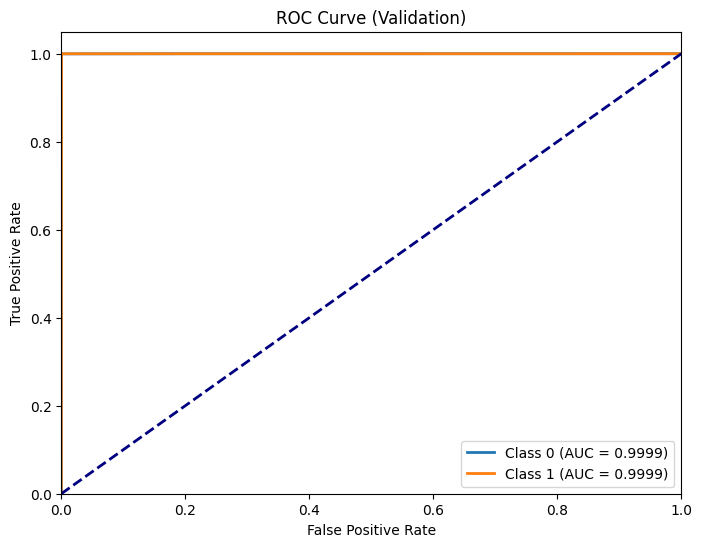

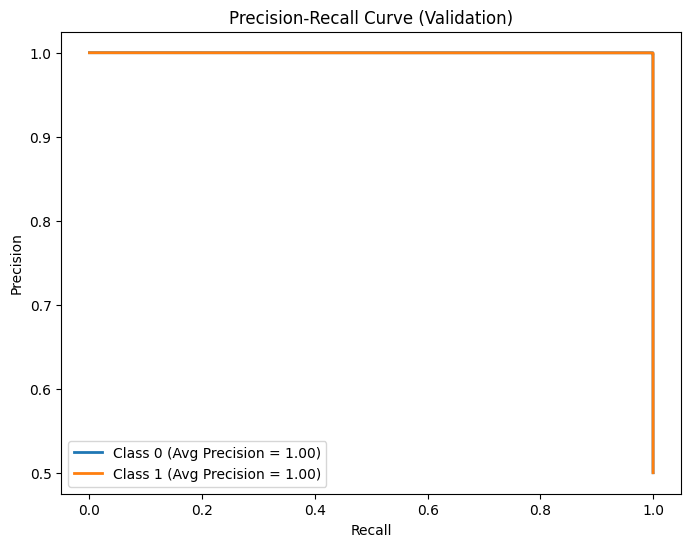

1191/1191 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Test Loss: 0.001178
Test Accuracy: 0.999816
Test F1-Score: 0.999734
Test Precision: 0.999713
Test Recall: 0.999755
Test Evaluation Time: 4.02 seconds
Test Classification Report:
              precision    recall  f1-score   support

           0   0.999527  0.999645  0.999586      8454
           1   0.999899  0.999865  0.999882     29641

    accuracy                       0.999816     38095
   macro avg   0.999713  0.999755  0.999734     38095
weighted avg   0.999816  0.999816  0.999816     38095



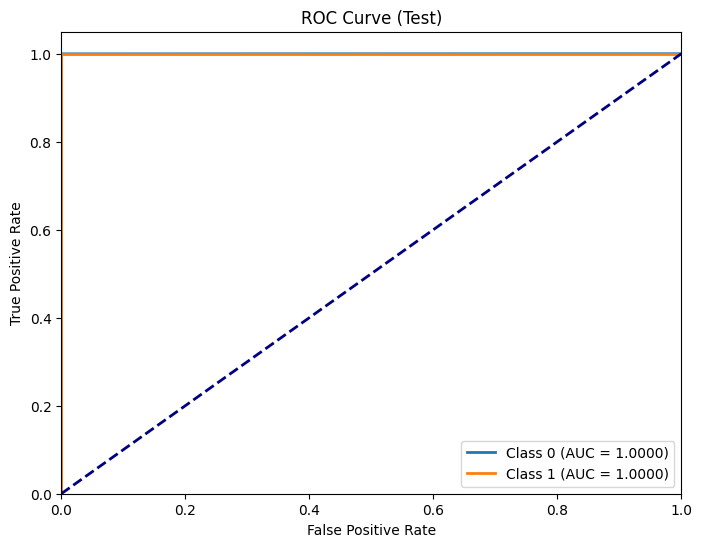

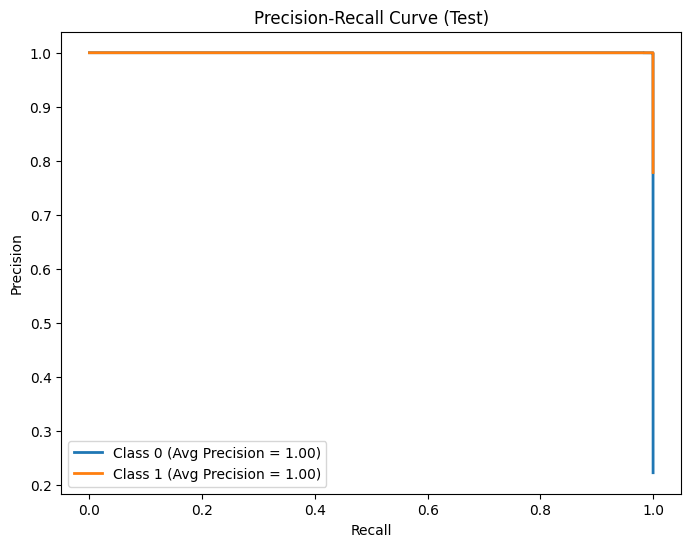

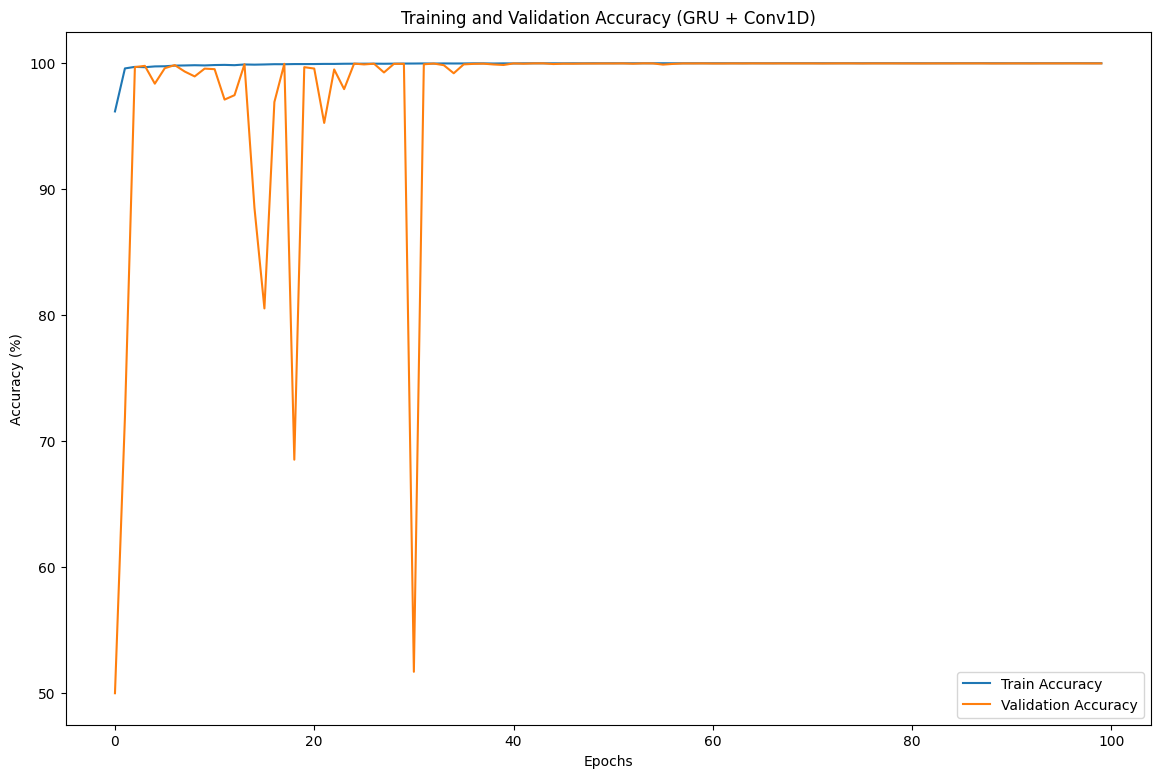

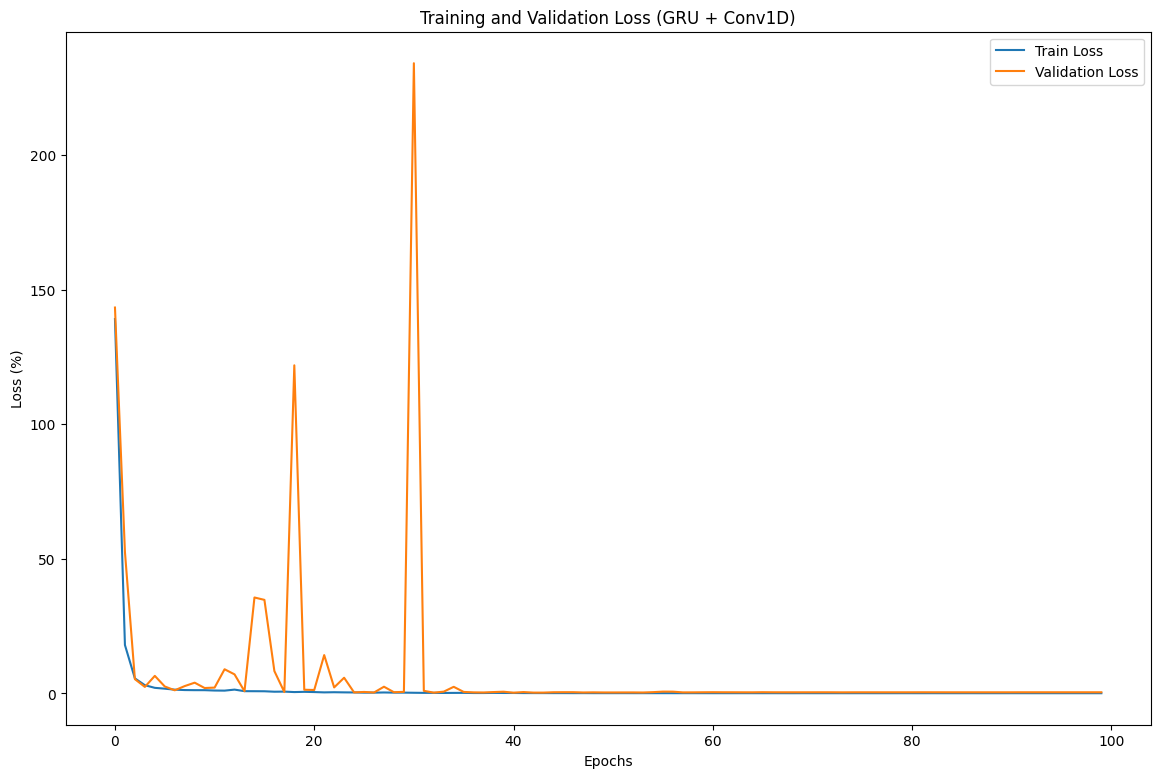

Epoch 1 - Train Loss: 139.05%, Validation Loss: 143.32%, Train Accuracy: 96.16%, Validation Accuracy: 50.00%
Epoch 2 - Train Loss: 17.98%, Validation Loss: 52.56%, Train Accuracy: 99.57%, Validation Accuracy: 71.90%
Epoch 3 - Train Loss: 5.59%, Validation Loss: 5.31%, Train Accuracy: 99.70%, Validation Accuracy: 99.68%
Epoch 4 - Train Loss: 3.07%, Validation Loss: 2.43%, Train Accuracy: 99.67%, Validation Accuracy: 99.78%
Epoch 5 - Train Loss: 2.08%, Validation Loss: 6.53%, Train Accuracy: 99.73%, Validation Accuracy: 98.36%
Epoch 6 - Train Loss: 1.78%, Validation Loss: 2.59%, Train Accuracy: 99.75%, Validation Accuracy: 99.59%
Epoch 7 - Train Loss: 1.41%, Validation Loss: 1.17%, Train Accuracy: 99.80%, Validation Accuracy: 99.84%
Epoch 8 - Train Loss: 1.26%, Validation Loss: 2.74%, Train Accuracy: 99.81%, Validation Accuracy: 99.33%
Epoch 9 - Train Loss: 1.22%, Validation Loss: 4.00%, Train Accuracy: 99.83%, Validation Accuracy: 98.94%
Epoch 10 - Train Loss: 1.22%, Validation Loss: 2.

In [ ]:

def evaluate_model(model, X, y_one_hot, dataset_name="Validation"):
    start_time = time.time()

    loss, accuracy = model.evaluate(X, y_one_hot, verbose=0)
    evaluation_time = time.time() - start_time

    predictions = model.predict(X)
    true_labels = np.argmax(y_one_hot, axis=1)
    pred_labels = np.argmax(predictions, axis=1)


    val_f1 = f1_score(true_labels, pred_labels, average='macro')
    val_precision = precision_score(true_labels, pred_labels, average='macro')
    val_recall = recall_score(true_labels, pred_labels, average='macro')

    print(f"{dataset_name} Loss: {loss:.6f}")
    print(f"{dataset_name} Accuracy: {accuracy:.6f}")
    print(f"{dataset_name} F1-Score: {val_f1:.6f}")
    print(f"{dataset_name} Precision: {val_precision:.6f}")
    print(f"{dataset_name} Recall: {val_recall:.6f}")
    print(f"{dataset_name} Evaluation Time: {evaluation_time:.2f} seconds")

    target_names = [str(i) for i in range(2)]
    val_classification_report = classification_report(true_labels, pred_labels, target_names=target_names, digits=6)
    print(f"{dataset_name} Classification Report:")
    print(val_classification_report)


    plot_roc_curve(true_labels, predictions, 2, dataset_name)
    plot_precision_recall_curve(true_labels, predictions, 2, dataset_name)



def plot_roc_curve(true_labels, predictions, num_classes, dataset_name):
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(true_labels, predictions[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.4f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({dataset_name})')
    plt.legend(loc="lower right")
    plt.show()


def plot_precision_recall_curve(true_labels, predictions, num_classes, dataset_name):
    precision = {}
    recall = {}
    average_precision = {}

    for i in range(num_classes):
        precision[i], recall[i], _ = precision_recall_curve(true_labels, predictions[:, i], pos_label=i)
        average_precision[i] = average_precision_score(true_labels, predictions[:, i], pos_label=i)

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (Avg Precision = {average_precision[i]:.2f})')

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve ({dataset_name})")
    plt.legend(loc="best")
    plt.show()


evaluate_model(model_gru_cnn, X_TON_IOT_valid, y_TON_IOT_valid_one_hot, dataset_name="Validation")


y_TON_IOT_test2_one_hot = tf.keras.utils.to_categorical(y_TON_IOT_test2, num_classes=2)
evaluate_model(model_gru_cnn, X_TON_IOT_test2, y_TON_IOT_test2_one_hot, dataset_name="Test")


plt.figure(figsize=(14, 9))
plt.plot(np.array(history_gru_cnn.history['accuracy']) * 100, label='Train Accuracy')
plt.plot(np.array(history_gru_cnn.history['val_accuracy']) * 100, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy (GRU + Conv1D)')
plt.legend()
plt.show()

plt.figure(figsize=(14, 9))
plt.plot(np.array(history_gru_cnn.history['loss']) * 100, label='Train Loss')
plt.plot(np.array(history_gru_cnn.history['val_loss']) * 100, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (%)')
plt.title('Training and Validation Loss (GRU + Conv1D)')
plt.legend()
plt.show()


for epoch, (loss, val_loss, accuracy, val_accuracy) in enumerate(zip(history_gru_cnn.history['loss'],
                                                                      history_gru_cnn.history['val_loss'],
                                                                      history_gru_cnn.history['accuracy'],
                                                                      history_gru_cnn.history['val_accuracy']), 1):
    print(f"Epoch {epoch} - Train Loss: {loss * 100:.2f}%, Validation Loss: {val_loss * 100:.2f}%, Train Accuracy: {accuracy * 100:.2f}%, Validation Accuracy: {val_accuracy * 100:.2f}%")

In [ ]:
import pickle
with open('history_gru_cnn.pkl', 'wb') as file:
    pickle.dump(history_gru_cnn.history, file)

#***CNN_RNN***

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense, BatchNormalization, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, precision_score, recall_score
import seaborn as sns


def scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.1))

lr_scheduler = LearningRateScheduler(scheduler)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# CNN_RNN Model
model_rnn_cnn = Sequential()
model_rnn_cnn.add(Conv1D(64, 3, activation='relu', input_shape=X_TON_IOT_train.shape[1:]))
model_rnn_cnn.add(MaxPooling1D(pool_size=2))
model_rnn_cnn.add(Conv1D(128, 3, activation='relu'))
model_rnn_cnn.add(MaxPooling1D(pool_size=2))
model_rnn_cnn.add(SimpleRNN(128, activation='tanh', return_sequences=True, kernel_regularizer=l2(0.01)))
model_rnn_cnn.add(BatchNormalization())
model_rnn_cnn.add(Dropout(0.5))
model_rnn_cnn.add(SimpleRNN(256, activation='tanh', kernel_regularizer=l2(0.01)))
model_rnn_cnn.add(BatchNormalization())
model_rnn_cnn.add(Dropout(0.5))
model_rnn_cnn.add(Flatten())
model_rnn_cnn.add(Dense(2, activation='softmax'))

model_rnn_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()

history_rnn_cnn = model_rnn_cnn.fit(X_TON_IOT_train, y_TON_IOT_train_one_hot, epochs=100, batch_size=1024,
                                    validation_data=(X_TON_IOT_valid, y_TON_IOT_valid_one_hot),
                                    callbacks=[lr_scheduler], verbose=1)
end_time = time.time()
training_time = end_time - start_time

print(f"Le temps d'entraînement du modèle CNN_RNN est de {training_time:.2f} secondes.")


Epoch 1/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - accuracy: 0.9485 - loss: 2.2051 - val_accuracy: 0.9968 - val_loss: 0.3137 - learning_rate: 0.0010
Epoch 2/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9962 - loss: 0.1966 - val_accuracy: 0.9427 - val_loss: 0.2313 - learning_rate: 0.0010
Epoch 3/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9965 - loss: 0.0385 - val_accuracy: 0.9978 - val_loss: 0.0201 - learning_rate: 0.0010
Epoch 4/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9977 - loss: 0.0183 - val_accuracy: 0.9987 - val_loss: 0.0120 - learning_rate: 0.0010
Epoch 5/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9983 - loss: 0.0134 - val_accuracy: 0.9986 - val_loss: 0.0107 - learning_rate: 0.0010
Epoch 6/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9983 - loss: 0.0117 - val_accuracy: 0.9990 - val_loss: 0.0106 - learning_rate: 0.0010
Epoch 7/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9982 -

1849/1849 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step
Validation Loss: 0.001291
Validation Accuracy: 0.999645
Validation F1-Score: 0.999645
Validation Precision: 0.999645
Validation Recall: 0.999645
Validation Evaluation Time: 5.93 seconds
Validation Classification Report:
              precision    recall  f1-score   support

           0   0.999898  0.999391  0.999645     29571
           1   0.999392  0.999899  0.999645     29571

    accuracy                       0.999645     59142
   macro avg   0.999645  0.999645  0.999645     59142
weighted avg   0.999645  0.999645  0.999645     59142



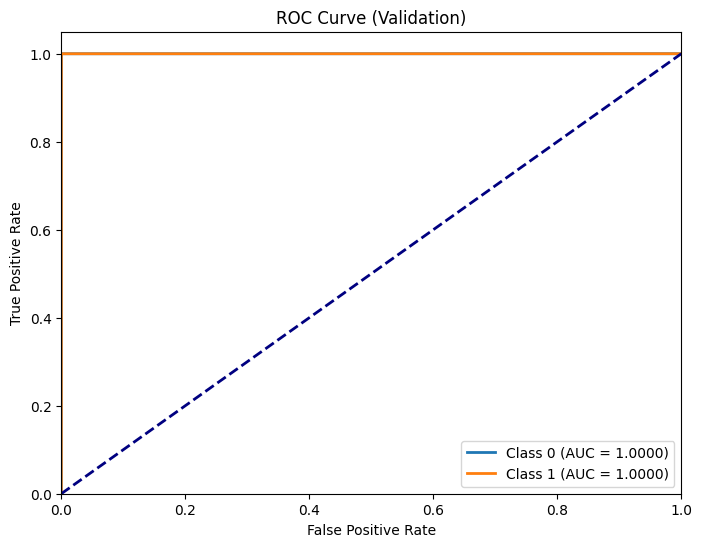

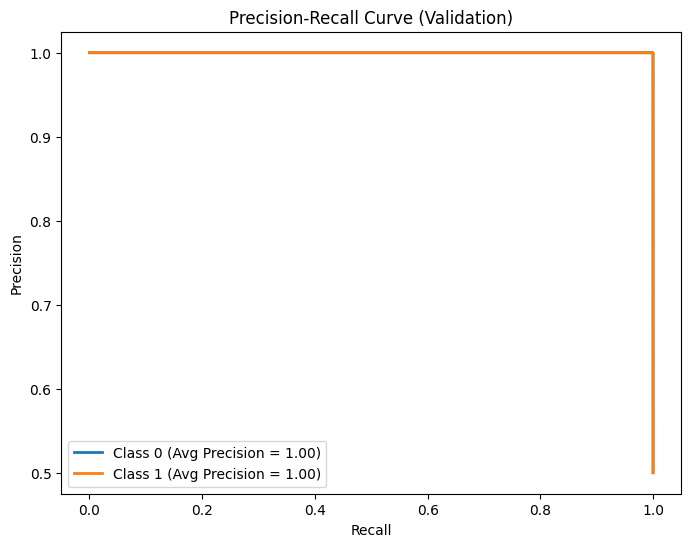

1191/1191 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Test Loss: 0.000956
Test Accuracy: 0.999816
Test F1-Score: 0.999734
Test Precision: 0.999671
Test Recall: 0.999797
Test Evaluation Time: 3.88 seconds
Test Classification Report:
              precision    recall  f1-score   support

           0   0.999409  0.999763  0.999586      8454
           1   0.999933  0.999831  0.999882     29641

    accuracy                       0.999816     38095
   macro avg   0.999671  0.999797  0.999734     38095
weighted avg   0.999816  0.999816  0.999816     38095



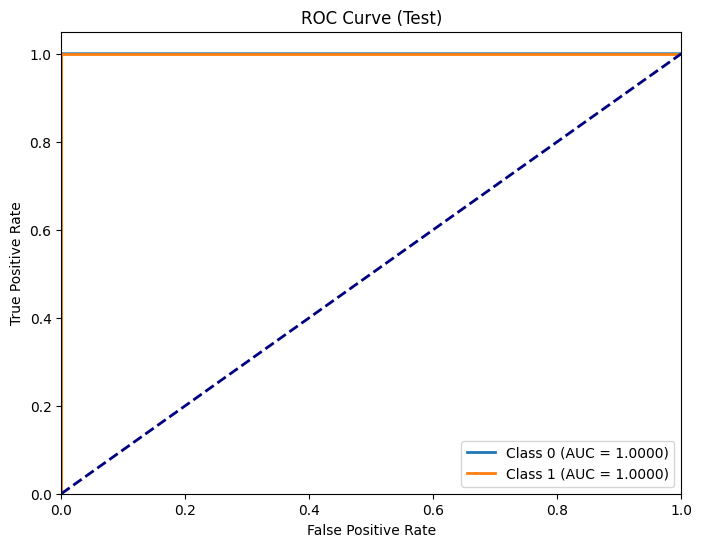

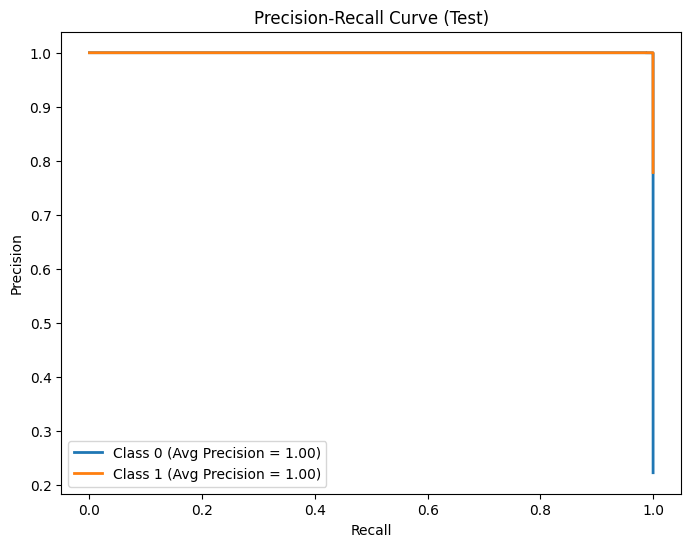

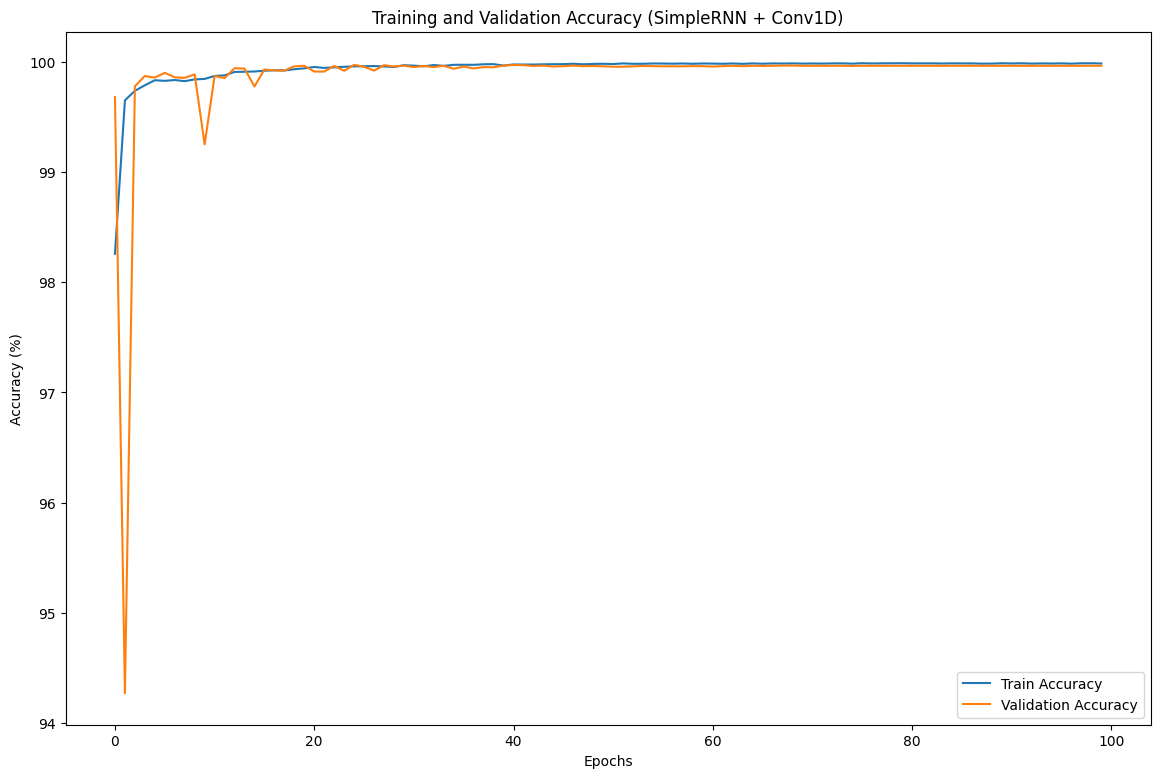

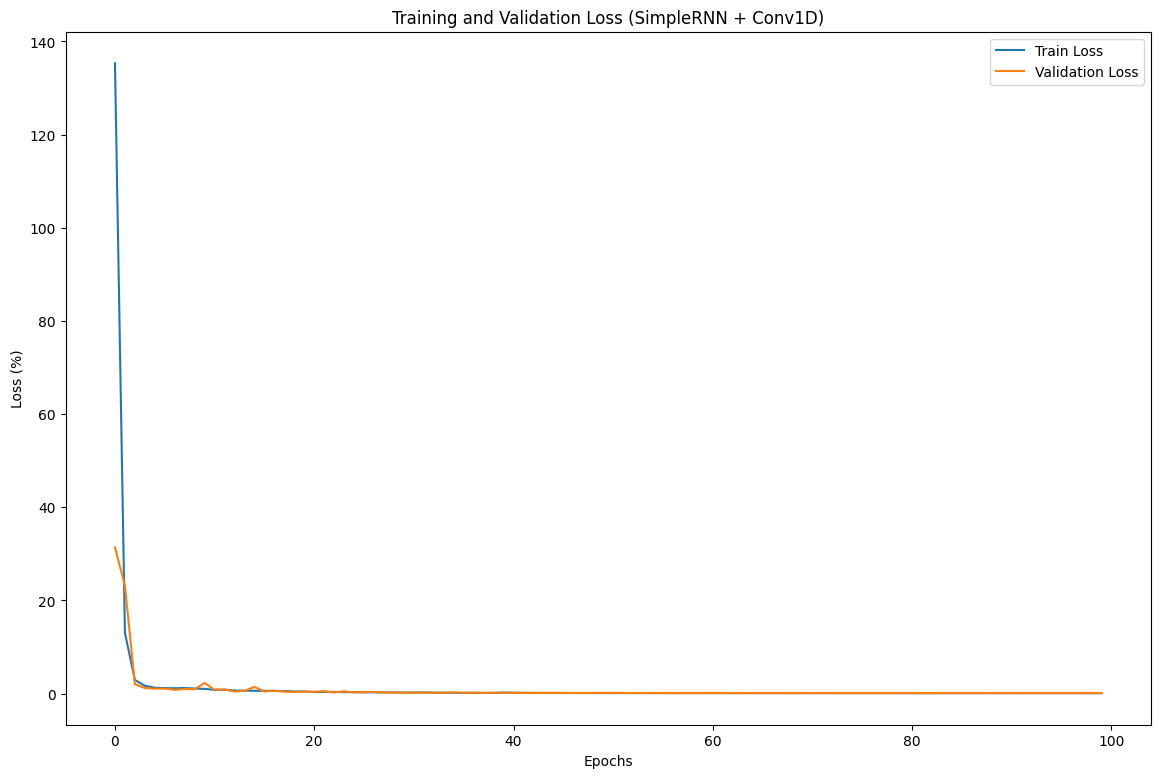

Epoch 1 - Train Loss: 135.33%, Validation Loss: 31.37%, Train Accuracy: 98.26%, Validation Accuracy: 99.68%
Epoch 2 - Train Loss: 13.01%, Validation Loss: 23.13%, Train Accuracy: 99.65%, Validation Accuracy: 94.27%
Epoch 3 - Train Loss: 2.93%, Validation Loss: 2.01%, Train Accuracy: 99.74%, Validation Accuracy: 99.78%
Epoch 4 - Train Loss: 1.68%, Validation Loss: 1.20%, Train Accuracy: 99.79%, Validation Accuracy: 99.87%
Epoch 5 - Train Loss: 1.26%, Validation Loss: 1.07%, Train Accuracy: 99.83%, Validation Accuracy: 99.86%
Epoch 6 - Train Loss: 1.20%, Validation Loss: 1.06%, Train Accuracy: 99.83%, Validation Accuracy: 99.90%
Epoch 7 - Train Loss: 1.16%, Validation Loss: 0.82%, Train Accuracy: 99.84%, Validation Accuracy: 99.86%
Epoch 8 - Train Loss: 1.20%, Validation Loss: 0.99%, Train Accuracy: 99.83%, Validation Accuracy: 99.85%
Epoch 9 - Train Loss: 1.10%, Validation Loss: 0.94%, Train Accuracy: 99.84%, Validation Accuracy: 99.89%
Epoch 10 - Train Loss: 1.01%, Validation Loss: 2.2

In [ ]:

def evaluate_model(model, X, y_one_hot, dataset_name="Validation"):
    start_time = time.time()

    loss, accuracy = model.evaluate(X, y_one_hot, verbose=0)
    evaluation_time = time.time() - start_time

    predictions = model.predict(X)
    true_labels = np.argmax(y_one_hot, axis=1)
    pred_labels = np.argmax(predictions, axis=1)


    val_f1 = f1_score(true_labels, pred_labels, average='macro')
    val_precision = precision_score(true_labels, pred_labels, average='macro')
    val_recall = recall_score(true_labels, pred_labels, average='macro')

    print(f"{dataset_name} Loss: {loss:.6f}")
    print(f"{dataset_name} Accuracy: {accuracy:.6f}")
    print(f"{dataset_name} F1-Score: {val_f1:.6f}")
    print(f"{dataset_name} Precision: {val_precision:.6f}")
    print(f"{dataset_name} Recall: {val_recall:.6f}")
    print(f"{dataset_name} Evaluation Time: {evaluation_time:.2f} seconds")

    target_names = [str(i) for i in range(2)]
    val_classification_report = classification_report(true_labels, pred_labels, target_names=target_names, digits=6)
    print(f"{dataset_name} Classification Report:")
    print(val_classification_report)


    plot_roc_curve(true_labels, predictions, 2, dataset_name)
    plot_precision_recall_curve(true_labels, predictions, 2, dataset_name)


def plot_roc_curve(true_labels, predictions, num_classes, dataset_name):
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(true_labels, predictions[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.4f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({dataset_name})')
    plt.legend(loc="lower right")
    plt.show()


def plot_precision_recall_curve(true_labels, predictions, num_classes, dataset_name):
    precision = {}
    recall = {}
    average_precision = {}

    for i in range(num_classes):
        precision[i], recall[i], _ = precision_recall_curve(true_labels, predictions[:, i], pos_label=i)
        average_precision[i] = average_precision_score(true_labels, predictions[:, i], pos_label=i)

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (Avg Precision = {average_precision[i]:.2f})')

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve ({dataset_name})")
    plt.legend(loc="best")
    plt.show()


evaluate_model(model_rnn_cnn, X_TON_IOT_valid, y_TON_IOT_valid_one_hot, dataset_name="Validation")


y_TON_IOT_test2_one_hot = tf.keras.utils.to_categorical(y_TON_IOT_test2, num_classes=2)
evaluate_model(model_rnn_cnn, X_TON_IOT_test2, y_TON_IOT_test2_one_hot, dataset_name="Test")


plt.figure(figsize=(14, 9))
plt.plot(np.array(history_rnn_cnn.history['accuracy']) * 100, label='Train Accuracy')
plt.plot(np.array(history_rnn_cnn.history['val_accuracy']) * 100, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy (SimpleRNN + Conv1D)')
plt.legend()
plt.show()

plt.figure(figsize=(14, 9))
plt.plot(np.array(history_rnn_cnn.history['loss']) * 100, label='Train Loss')
plt.plot(np.array(history_rnn_cnn.history['val_loss']) * 100, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (%)')
plt.title('Training and Validation Loss (SimpleRNN + Conv1D)')
plt.legend()
plt.show()


for epoch, (loss, val_loss, accuracy, val_accuracy) in enumerate(zip(history_rnn_cnn.history['loss'],
                                                                      history_rnn_cnn.history['val_loss'],
                                                                      history_rnn_cnn.history['accuracy'],
                                                                      history_rnn_cnn.history['val_accuracy']), 1):
    print(f"Epoch {epoch} - Train Loss: {loss * 100:.2f}%, Validation Loss: {val_loss * 100:.2f}%, Train Accuracy: {accuracy * 100:.2f}%, Validation Accuracy: {val_accuracy * 100:.2f}%")

In [ ]:
import pickle
with open('history_rnn_cnn.pkl', 'wb') as file:
    pickle.dump(history_rnn_cnn.history, file)

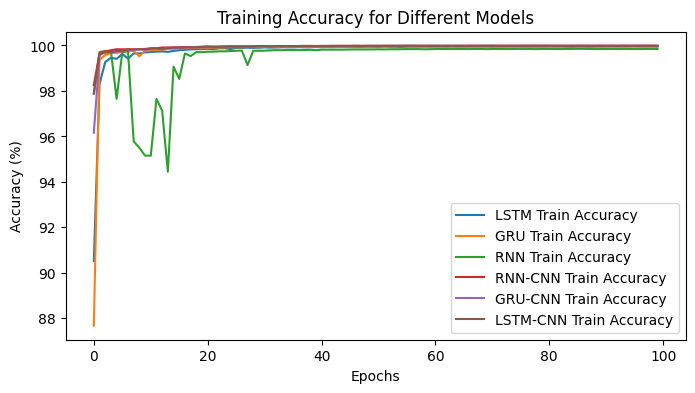

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Load the training history objects for different models
with open('history_lstm.pkl', 'rb') as file:
    history_lstm = pickle.load(file)
with open('history_gru.pkl', 'rb') as file:
    history_gru = pickle.load(file)
with open('history_rnn.pkl', 'rb') as file:
    history_rnn = pickle.load(file)
with open('history_rnn_cnn.pkl', 'rb') as file:
    history_rnn_cnn = pickle.load(file)
with open('history_gru_cnn.pkl', 'rb') as file:
    history_gru_cnn = pickle.load(file)
with open('history_lstm_cnn.pkl', 'rb') as file:
    history_lstm_cnn = pickle.load(file)

# Plot the training accuracy curves for different models
plt.figure(figsize=(8, 4))
plt.plot(np.array(history_lstm['accuracy']) * 100, label='LSTM Train Accuracy')
plt.plot(np.array(history_gru['accuracy']) * 100, label='GRU Train Accuracy')
plt.plot(np.array(history_rnn['accuracy']) * 100, label='RNN Train Accuracy')
plt.plot(np.array(history_rnn_cnn['accuracy']) * 100, label='RNN-CNN Train Accuracy')
plt.plot(np.array(history_gru_cnn['accuracy']) * 100, label='GRU-CNN Train Accuracy')
plt.plot(np.array(history_lstm_cnn['accuracy']) * 100, label='LSTM-CNN Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy for Different Models')
plt.legend()
plt.show()



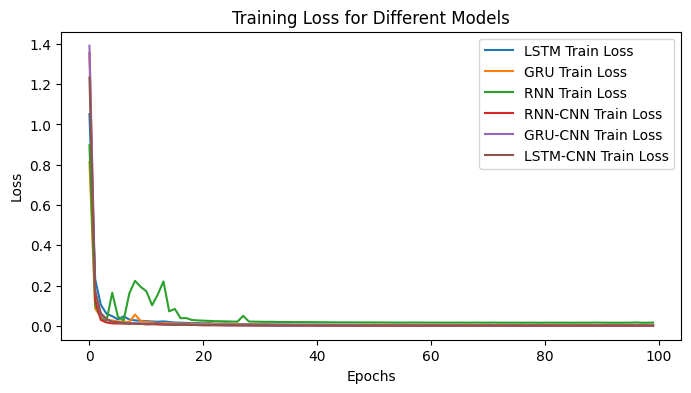

In [ ]:
# Plot the training loss curves for different models
plt.figure(figsize=(8, 4))
plt.plot(history_lstm['loss'], label='LSTM Train Loss')
plt.plot(history_gru['loss'], label='GRU Train Loss')
plt.plot(history_rnn['loss'], label='RNN Train Loss')
plt.plot(history_rnn_cnn['loss'], label='RNN-CNN Train Loss')
plt.plot(history_gru_cnn['loss'], label='GRU-CNN Train Loss')
plt.plot(history_lstm_cnn['loss'], label='LSTM-CNN Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss for Different Models')
plt.legend()
plt.show()


# **CICIoT2023**

In [ ]:
# Load the dataset with low_memory=False to suppress the warning
df_Edge_IIoTset = pd.read_csv('/content/drive/MyDrive/part-00001-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv')

# Print the shape of the DataFrame
shape = df_Edge_IIoTset.shape
print(shape)


(218805, 47)


In [ ]:
df_Edge_IIoTset.head()

flow_duration  Header_Length  Protocol Type  Duration          Rate  \
0       0.000000          53.46           5.94     63.36      1.145800   
1       0.000000          54.00           6.00     64.00      1.027823   
2       2.204616          93.96           6.00     64.00      0.671213   
3       0.053618       12497.00          17.00     64.00  47647.897124   
4       0.000000           0.00           1.00     64.00      0.667744   

          Srate  Drate  fin_flag_number  syn_flag_number  rst_flag_number  \
0      1.145800    0.0              0.0              1.0              0.0   
1      1.027823    0.0              0.0              0.0              0.0   
2      0.671213    0.0              0.0              1.0              0.0   
3  47647.897124    0.0              0.0              0.0              0.0   
4      0.667744    0.0              0.0              0.0              0.0   

   ...       Std  Tot size           IAT  Number   Magnitue    Radius  \
0  ...  0.040218     54.06  8.309402e+07     9.5  10.393232  0.057331   
1  ...  0.000000     54.00  8.307159e+07     9.5  10.392305  0.000000   
2  ...  0.000000     54.00  8.336561e+07     9.5  10.392305  0.000000   
3  ...  0.000000     50.00  8.310693e+07     9.5  10.000000  0.000000   
4  ...  0.000000     42.00  8.314933e+07     9.5   9.165151  0.000000   

   Covariance  Variance  Weight                    label  
0    0.054789      0.03  141.55           DDoS-SYN_Flood  
1    0.000000      0.00  141.55           DDoS-TCP_Flood  
2    0.000000      0.00  141.55  DDoS-SynonymousIP_Flood  
3    0.000000      0.00  141.55           DDoS-UDP_Flood  
4    0.000000      0.00  141.55          DDoS-ICMP_Flood  

[5 rows x 47 columns]

In [ ]:
print(df_Edge_IIoTset.groupby("label").size())

label
Backdoor_Malware              18
BenignTraffic               5200
BrowserHijacking              30
CommandInjection              26
DDoS-ACK_Fragmentation      1384
DDoS-HTTP_Flood              127
DDoS-ICMP_Flood            33529
DDoS-ICMP_Fragmentation     2132
DDoS-PSHACK_Flood          19373
DDoS-RSTFINFlood           19032
DDoS-SYN_Flood             19235
DDoS-SlowLoris               100
DDoS-SynonymousIP_Flood    16798
DDoS-TCP_Flood             20964
DDoS-UDP_Flood             25343
DDoS-UDP_Fragmentation      1392
DNS_Spoofing                 827
DictionaryBruteForce          57
DoS-HTTP_Flood               347
DoS-SYN_Flood               9314
DoS-TCP_Flood              12326
DoS-UDP_Flood              15500
MITM-ArpSpoofing            1432
Mirai-greeth_flood          4728
Mirai-greip_flood           3606
Mirai-udpplain              4308
Recon-HostDiscovery          652
Recon-OSScan                 425
Recon-PingSweep               10
Recon-PortScan               399
SqlI

In [ ]:
import pandas as pd

df_Edge_IIoTset['label2'] = df_Edge_IIoTset['label'].apply(lambda x: 0 if x == "BenignTraffic" else 1)

print(df_Edge_IIoTset.head())


   flow_duration  Header_Length  Protocol Type  Duration          Rate  \
0       0.000000          53.46           5.94     63.36      1.145800   
1       0.000000          54.00           6.00     64.00      1.027823   
2       2.204616          93.96           6.00     64.00      0.671213   
3       0.053618       12497.00          17.00     64.00  47647.897124   
4       0.000000           0.00           1.00     64.00      0.667744   

          Srate  Drate  fin_flag_number  syn_flag_number  rst_flag_number  \
0      1.145800    0.0              0.0              1.0              0.0   
1      1.027823    0.0              0.0              0.0              0.0   
2      0.671213    0.0              0.0              1.0              0.0   
3  47647.897124    0.0              0.0              0.0              0.0   
4      0.667744    0.0              0.0              0.0              0.0   

   ...  Tot size           IAT  Number   Magnitue    Radius  Covariance  \
0  ...     54.06 

In [ ]:
df_Edge_IIoTset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218805 entries, 0 to 218804
Data columns (total 48 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    218805 non-null  float64
 1   Header_Length    218805 non-null  float64
 2   Protocol Type    218805 non-null  float64
 3   Duration         218805 non-null  float64
 4   Rate             218805 non-null  float64
 5   Srate            218805 non-null  float64
 6   Drate            218805 non-null  float64
 7   fin_flag_number  218805 non-null  float64
 8   syn_flag_number  218805 non-null  float64
 9   rst_flag_number  218805 non-null  float64
 10  psh_flag_number  218805 non-null  float64
 11  ack_flag_number  218805 non-null  float64
 12  ece_flag_number  218805 non-null  float64
 13  cwr_flag_number  218805 non-null  float64
 14  ack_count        218805 non-null  float64
 15  syn_count        218805 non-null  float64
 16  fin_count        218805 non-null  floa

In [ ]:
df_Edge_IIoTset.head()
print('Dataframe shape: ', shape)
print('Number of rows: ', shape[0])
print('Number of columns: ', shape[1])
#df.shape

Dataframe shape:  (218805, 47)
Number of rows:  218805
Number of columns:  47


In [ ]:

df_Edge_IIoTset.isnull().sum()

flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
label2             0
dtype: int64

In [ ]:
import pandas as pd

# Adjust display settings to show all columns
pd.set_option('display.max_rows', None)

# Count the number of null values in each column
null_counts = df_Edge_IIoTset.isnull().sum()

# Print the null counts for each column
print(null_counts)

# Reset the display settings if needed
pd.reset_option('display.max_rows')


flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
label2       

**Null and duplicated values**

Checking Missing Value

Following code shows dataset does not have any missing values

**Checking duplicated values**

Now we need to check if there is any duplicated value, because it does not make any sense to have duplicate value in our analysis. I will check shape, so the dataset does not have a duplicated value.

In [ ]:
df_Edge_IIoTset[df_Edge_IIoTset.duplicated()].shape

(0, 48)

In [ ]:
# Display the duplicate rows
duplicate_rows = df_Edge_IIoTset[df_Edge_IIoTset.duplicated()]
print(duplicate_rows)


Empty DataFrame
Columns: [flow_duration, Header_Length, Protocol Type, Duration, Rate, Srate, Drate, fin_flag_number, syn_flag_number, rst_flag_number, psh_flag_number, ack_flag_number, ece_flag_number, cwr_flag_number, ack_count, syn_count, fin_count, urg_count, rst_count, HTTP, HTTPS, DNS, Telnet, SMTP, SSH, IRC, TCP, UDP, DHCP, ARP, ICMP, IPv, LLC, Tot sum, Min, Max, AVG, Std, Tot size, IAT, Number, Magnitue, Radius, Covariance, Variance, Weight, label, label2]
Index: []

[0 rows x 48 columns]


In [ ]:

# Remove duplicate rows and keep the first occurrence
df_Edge_IIoTset_cleaned = df_Edge_IIoTset.drop_duplicates()


In [ ]:
df_Edge_IIoTset_cleaned[df_Edge_IIoTset_cleaned.duplicated()].shape

(0, 48)

In [ ]:

df_Edge_IIoTset_cleaned.shape

(218805, 48)

In [ ]:

df_Edge_IIoTset_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218805 entries, 0 to 218804
Data columns (total 48 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    218805 non-null  float64
 1   Header_Length    218805 non-null  float64
 2   Protocol Type    218805 non-null  float64
 3   Duration         218805 non-null  float64
 4   Rate             218805 non-null  float64
 5   Srate            218805 non-null  float64
 6   Drate            218805 non-null  float64
 7   fin_flag_number  218805 non-null  float64
 8   syn_flag_number  218805 non-null  float64
 9   rst_flag_number  218805 non-null  float64
 10  psh_flag_number  218805 non-null  float64
 11  ack_flag_number  218805 non-null  float64
 12  ece_flag_number  218805 non-null  float64
 13  cwr_flag_number  218805 non-null  float64
 14  ack_count        218805 non-null  float64
 15  syn_count        218805 non-null  float64
 16  fin_count        218805 non-null  floa

 **codage of string**

In [ ]:
df_Edge_IIoTset_cleaned.shape

(218805, 48)

In [ ]:

df_Edge_IIoTset_cleaned = df_Edge_IIoTset_cleaned.drop('label', axis = 1)

In [ ]:
df_Edge_IIoTset_cleaned.head()

flow_duration  Header_Length  Protocol Type  Duration          Rate  \
0       0.000000          53.46           5.94     63.36      1.145800   
1       0.000000          54.00           6.00     64.00      1.027823   
2       2.204616          93.96           6.00     64.00      0.671213   
3       0.053618       12497.00          17.00     64.00  47647.897124   
4       0.000000           0.00           1.00     64.00      0.667744   

          Srate  Drate  fin_flag_number  syn_flag_number  rst_flag_number  \
0      1.145800    0.0              0.0              1.0              0.0   
1      1.027823    0.0              0.0              0.0              0.0   
2      0.671213    0.0              0.0              1.0              0.0   
3  47647.897124    0.0              0.0              0.0              0.0   
4      0.667744    0.0              0.0              0.0              0.0   

   ...       Std  Tot size           IAT  Number   Magnitue    Radius  \
0  ...  0.040218     54.06  8.309402e+07     9.5  10.393232  0.057331   
1  ...  0.000000     54.00  8.307159e+07     9.5  10.392305  0.000000   
2  ...  0.000000     54.00  8.336561e+07     9.5  10.392305  0.000000   
3  ...  0.000000     50.00  8.310693e+07     9.5  10.000000  0.000000   
4  ...  0.000000     42.00  8.314933e+07     9.5   9.165151  0.000000   

   Covariance  Variance  Weight  label2  
0    0.054789      0.03  141.55       1  
1    0.000000      0.00  141.55       1  
2    0.000000      0.00  141.55       1  
3    0.000000      0.00  141.55       1  
4    0.000000      0.00  141.55       1  

[5 rows x 47 columns]

In [ ]:
df = df_Edge_IIoTset_cleaned

In [ ]:
print(df_Edge_IIoTset_cleaned.groupby("label2").size())

label2
0      5200
1    213605
dtype: int64


In [ ]:
X_TON_IOT = df_Edge_IIoTset_cleaned.drop('label2', axis = 1)
y_TON_IOT = df_Edge_IIoTset_cleaned['label2']
X_TON_IOT.shape, y_TON_IOT.shape

((218805, 46), (218805,))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
X_TON_IOT_train, X_TON_IOT_test,y_TON_IOT_train, y_TON_IOT_test = train_test_split(X_TON_IOT, y_TON_IOT, test_size=0.4, random_state = 1337
)
X_TON_IOT_valid, X_TON_IOT_test2,y_TON_IOT_valid, y_TON_IOT_test2 = train_test_split(X_TON_IOT_test, y_TON_IOT_test, test_size=0.5, random_state = 1337
)

In [ ]:
from imblearn.combine import SMOTETomek

# Create the SMOTE-TOMEK sampler
smt = SMOTETomek(random_state=42)

# Apply SMOTE-TOMEK to balance the classes
X_TON_IOT_train, y_TON_IOT_train = smt.fit_resample(X_TON_IOT_train, y_TON_IOT_train)


In [ ]:
from imblearn.combine import SMOTETomek
# Apply SMOTE-TOMEK to balance the classes
X_TON_IOT_valid, y_TON_IOT_valid = smt.fit_resample(X_TON_IOT_valid, y_TON_IOT_valid)


In [ ]:
y_TON_IOT_train.value_counts()

In [ ]:
y_TON_IOT.value_counts()

In [ ]:
y_TON_IOT.value_counts()

In [ ]:
X_TON_IOT.info()

In [ ]:

from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
X_TON_IOT_train = scaling.fit_transform(X_TON_IOT_train)
X_TON_IOT_valid = scaling.transform(X_TON_IOT_valid)
X_TON_IOT_test2 = scaling.transform(X_TON_IOT_test2)

In [ ]:
#For CNN and CNN-LSTM
print(X_TON_IOT_train.shape)
X_TON_IOT_train = X_TON_IOT_train.reshape(X_TON_IOT_train.shape[0], X_TON_IOT_train.shape[1], 1)
X_TON_IOT_valid = X_TON_IOT_valid.reshape(X_TON_IOT_valid.shape[0], X_TON_IOT_valid.shape[1], 1)
X_TON_IOT_test2 = X_TON_IOT_test2.reshape(X_TON_IOT_test2.shape[0], X_TON_IOT_test2.shape[1], 1)
print(X_TON_IOT_train.shape)

In [ ]:
# Import the necessary function
from tensorflow.keras.utils import to_categorical

# Conversion des étiquettes en one-hot encoding
y_TON_IOT_train_one_hot = to_categorical(y_TON_IOT_train, num_classes=2)
y_TON_IOT_valid_one_hot = to_categorical(y_TON_IOT_valid, num_classes=2)

# ***RNN***

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, precision_score, recall_score
import seaborn as sns


def scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)  # Ensure it returns a float
    else:
        return float(lr * tf.math.exp(-0.1))  # Ensure it returns a float

lr_scheduler = LearningRateScheduler(scheduler)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# RNN Model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(128, activation='tanh', return_sequences=True, input_shape=X_TON_IOT_train.shape[1:], kernel_regularizer=l2(0.01)))
model_rnn.add(BatchNormalization())
model_rnn.add(Dropout(0.5))
model_rnn.add(SimpleRNN(256, activation='tanh', kernel_regularizer=l2(0.01)))
model_rnn.add(BatchNormalization())
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(2, activation='softmax'))

model_rnn.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()

history_rnn = model_rnn.fit(X_TON_IOT_train, y_TON_IOT_train_one_hot, epochs=100, batch_size=1024,
                            validation_data=(X_TON_IOT_valid, y_TON_IOT_valid_one_hot),
                            callbacks=[lr_scheduler], verbose=1)
end_time = time.time()
training_time = end_time - start_time

 # training_time
print(f"Le temps d'entraînement du modèle SimpleRNN est de {training_time:.2f} secondes.")

Epoch 1/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.9650 - loss: 1.2002 - val_accuracy: 0.9924 - val_loss: 0.1301 - learning_rate: 0.0010
Epoch 2/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9916 - loss: 0.0986 - val_accuracy: 0.9895 - val_loss: 0.0661 - learning_rate: 0.0010
Epoch 3/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9927 - loss: 0.0469 - val_accuracy: 0.9934 - val_loss: 0.0401 - learning_rate: 0.0010
Epoch 4/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9928 - loss: 0.0404 - val_accuracy: 0.9922 - val_loss: 0.0427 - learning_rate: 0.0010
Epoch 5/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9929 - loss: 0.0386 - val_accuracy: 0.9932 - val_loss: 0.0365 - learning_rate: 0.0010
Epoch 6/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9933 - loss: 0.0376 - val_accuracy: 0.9827 - val_loss: 0.0755 - learning_rate: 0.0010
Epoch 7/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9769 -

2668/2668 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step
Validation Loss: 0.091152
Validation Accuracy: 0.991458
Validation F1-Score: 0.991458
Validation Precision: 0.991602
Validation Recall: 0.991458
Validation Evaluation Time: 11.48 seconds
Validation Classification Report:
              precision    recall  f1-score   support

           0   0.983204  1.000000  0.991531     42674
           1   1.000000  0.982917  0.991385     42674

    accuracy                       0.991458     85348
   macro avg   0.991602  0.991458  0.991458     85348
weighted avg   0.991602  0.991458  0.991458     85348



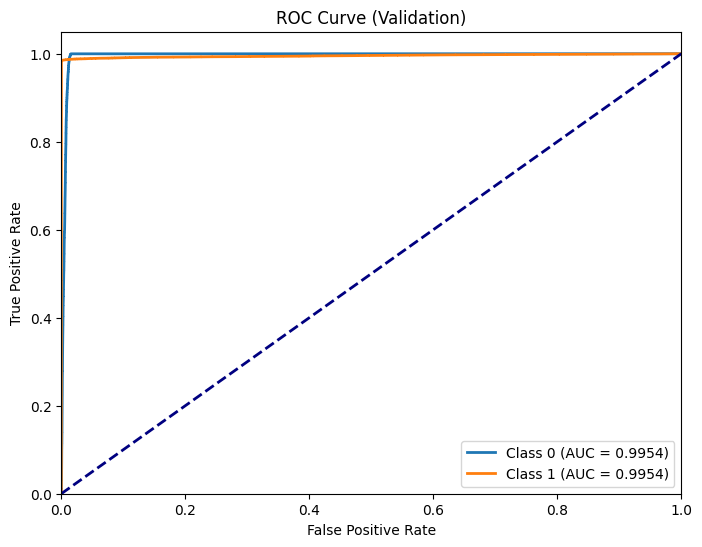

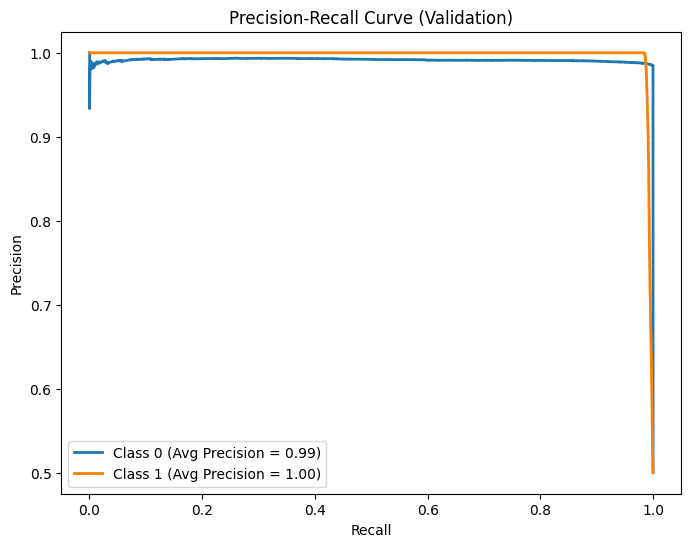

1368/1368 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
Test Loss: 0.122073
Test Accuracy: 0.983204
Test F1-Score: 0.859102
Test Precision: 0.785619
Test Recall: 0.990911
Test Evaluation Time: 10.32 seconds
Test Classification Report:
              precision    recall  f1-score   support

           0   0.571262  0.998979  0.726867       979
           1   0.999976  0.982843  0.991336     42782

    accuracy                       0.983204     43761
   macro avg   0.785619  0.990911  0.859102     43761
weighted avg   0.990385  0.983204  0.985419     43761



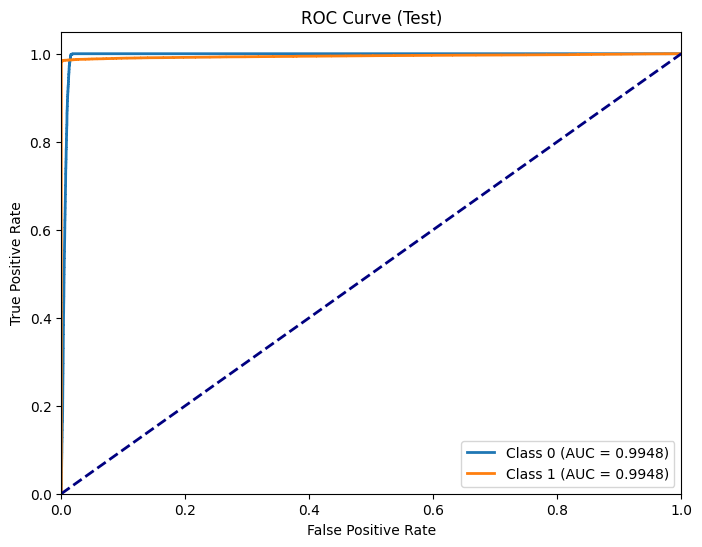

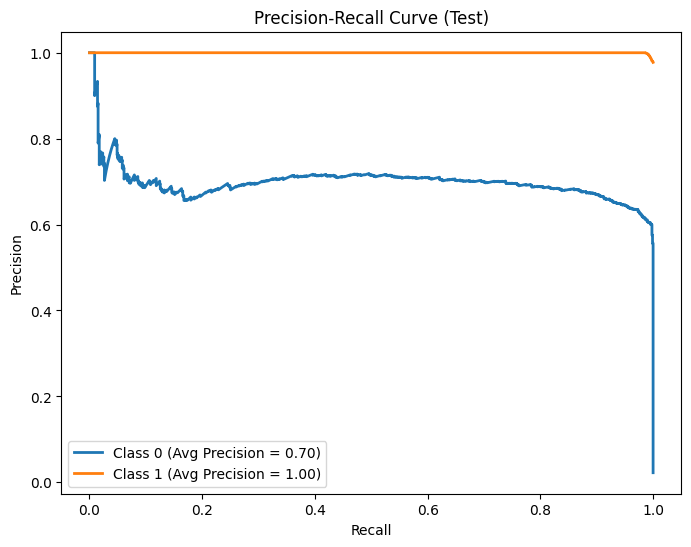

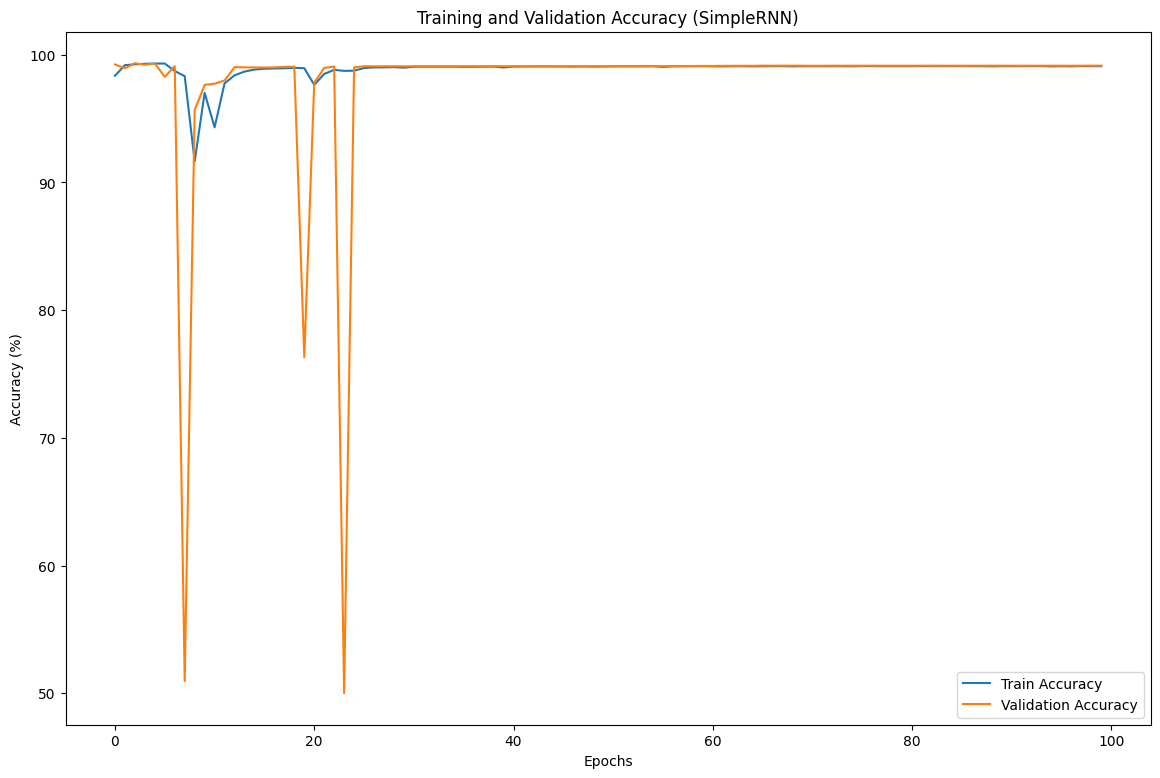

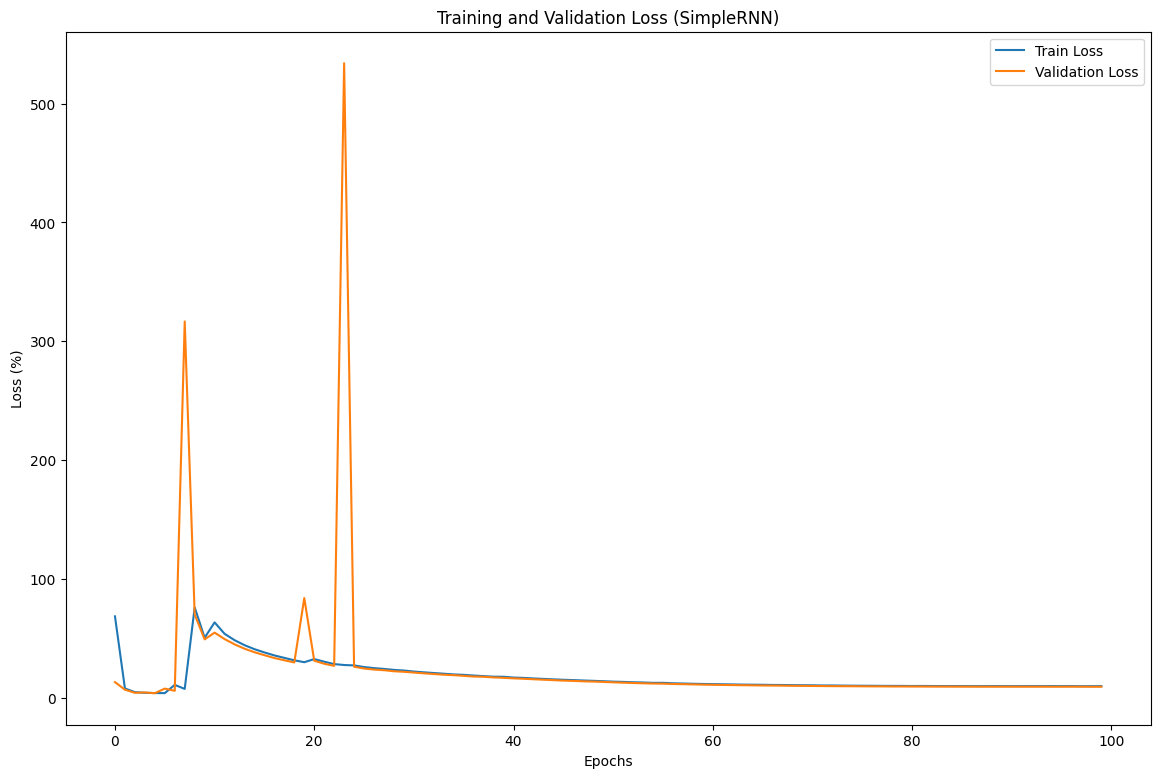

Epoch 1 - Train Loss: 68.38%, Validation Loss: 13.01%, Train Accuracy: 98.36%, Validation Accuracy: 99.24%
Epoch 2 - Train Loss: 7.66%, Validation Loss: 6.61%, Train Accuracy: 99.18%, Validation Accuracy: 98.95%
Epoch 3 - Train Loss: 4.55%, Validation Loss: 4.01%, Train Accuracy: 99.25%, Validation Accuracy: 99.34%
Epoch 4 - Train Loss: 4.00%, Validation Loss: 4.27%, Train Accuracy: 99.29%, Validation Accuracy: 99.22%
Epoch 5 - Train Loss: 3.78%, Validation Loss: 3.65%, Train Accuracy: 99.31%, Validation Accuracy: 99.32%
Epoch 6 - Train Loss: 3.74%, Validation Loss: 7.55%, Train Accuracy: 99.31%, Validation Accuracy: 98.27%
Epoch 7 - Train Loss: 10.69%, Validation Loss: 5.70%, Train Accuracy: 98.73%, Validation Accuracy: 99.11%
Epoch 8 - Train Loss: 7.28%, Validation Loss: 316.65%, Train Accuracy: 98.33%, Validation Accuracy: 50.95%
Epoch 9 - Train Loss: 75.90%, Validation Loss: 69.99%, Train Accuracy: 91.66%, Validation Accuracy: 95.67%
Epoch 10 - Train Loss: 50.37%, Validation Loss: 

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score, average_precision_score # Import average_precision_score
import seaborn as sns
import time

def evaluate_model(model, X, y_one_hot, dataset_name="Validation"):
    start_time = time.time()

    loss, accuracy = model.evaluate(X, y_one_hot, verbose=0)
    evaluation_time = time.time() - start_time

    predictions = model.predict(X)
    true_labels = np.argmax(y_one_hot, axis=1)
    pred_labels = np.argmax(predictions, axis=1)


    val_f1 = f1_score(true_labels, pred_labels, average='macro')
    val_precision = precision_score(true_labels, pred_labels, average='macro')
    val_recall = recall_score(true_labels, pred_labels, average='macro')

    print(f"{dataset_name} Loss: {loss:.6f}")
    print(f"{dataset_name} Accuracy: {accuracy:.6f}")
    print(f"{dataset_name} F1-Score: {val_f1:.6f}")
    print(f"{dataset_name} Precision: {val_precision:.6f}")
    print(f"{dataset_name} Recall: {val_recall:.6f}")
    print(f"{dataset_name} Evaluation Time: {evaluation_time:.2f} seconds")

    target_names = [str(i) for i in range(2)]
    val_classification_report = classification_report(true_labels, pred_labels, target_names=target_names, digits=6)
    print(f"{dataset_name} Classification Report:")
    print(val_classification_report)

    plot_roc_curve(true_labels, predictions, 2, dataset_name)
    plot_precision_recall_curve(true_labels, predictions, 2, dataset_name)


def plot_roc_curve(true_labels, predictions, num_classes, dataset_name):
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(true_labels, predictions[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.4f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({dataset_name})')
    plt.legend(loc="lower right")
    plt.show()


def plot_precision_recall_curve(true_labels, predictions, num_classes, dataset_name):
    precision = {}
    recall = {}
    average_precision = {}

    for i in range(num_classes):
        precision[i], recall[i], _ = precision_recall_curve(true_labels, predictions[:, i], pos_label=i)
        average_precision[i] = average_precision_score(true_labels, predictions[:, i], pos_label=i)

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (Avg Precision = {average_precision[i]:.2f})')

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve ({dataset_name})")
    plt.legend(loc="best")
    plt.show()


evaluate_model(model_rnn, X_TON_IOT_valid, y_TON_IOT_valid_one_hot, dataset_name="Validation")

y_TON_IOT_test2_one_hot = tf.keras.utils.to_categorical(y_TON_IOT_test2, num_classes=2)
evaluate_model(model_rnn, X_TON_IOT_test2, y_TON_IOT_test2_one_hot, dataset_name="Test")


plt.figure(figsize=(14, 9))
plt.plot(np.array(history_rnn.history['accuracy']) * 100, label='Train Accuracy')
plt.plot(np.array(history_rnn.history['val_accuracy']) * 100, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy (SimpleRNN)')
plt.legend()
plt.show()

plt.figure(figsize=(14, 9))
plt.plot(np.array(history_rnn.history['loss']) * 100, label='Train Loss')
plt.plot(np.array(history_rnn.history['val_loss']) * 100, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (%)')
plt.title('Training and Validation Loss (SimpleRNN)')
plt.legend()
plt.show()


for epoch, (loss, val_loss, accuracy, val_accuracy) in enumerate(zip(history_rnn.history['loss'],
                                                                      history_rnn.history['val_loss'],
                                                                      history_rnn.history['accuracy'],
                                                                      history_rnn.history['val_accuracy']), 1):
    print(f"Epoch {epoch} - Train Loss: {loss * 100:.2f}%, Validation Loss: {val_loss * 100:.2f}%, Train Accuracy: {accuracy * 100:.2f}%, Validation Accuracy: {val_accuracy * 100:.2f}%")

In [ ]:
import pickle
# Save the history object of the RNN model
with open('history_rnn.pkl', 'wb') as file:
    pickle.dump(history_rnn.history, file)

# **GRU**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, precision_score, recall_score
import seaborn as sns
import time
import numpy as np



def scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)  # Ensure it returns a float
    else:
        return float(lr * tf.math.exp(-0.1))  # Ensure it returns a float

lr_scheduler = LearningRateScheduler(scheduler)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#GRU Model
model_gru = Sequential()
model_gru.add(GRU(128, activation='tanh', return_sequences=True, input_shape=X_TON_IOT_train.shape[1:], kernel_regularizer=l2(0.01)))
model_gru.add(BatchNormalization())
model_gru.add(Dropout(0.5))
model_gru.add(GRU(256, activation='tanh', kernel_regularizer=l2(0.01)))
model_gru.add(BatchNormalization())
model_gru.add(Dropout(0.5))
model_gru.add(Dense(2, activation='softmax'))

model_gru.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()

history_gru = model_gru.fit(X_TON_IOT_train, y_TON_IOT_train_one_hot, epochs=100, batch_size=1024,
                            validation_data=(X_TON_IOT_valid, y_TON_IOT_valid_one_hot),
                            callbacks=[lr_scheduler], verbose=1)
end_time = time.time()
training_time = end_time - start_time

# training_time
print(f"Le temps d'entraînement du modèle GRU est de {training_time:.2f} secondes.")

Epoch 1/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 66ms/step - accuracy: 0.9479 - loss: 1.2086 - val_accuracy: 0.8904 - val_loss: 0.5665 - learning_rate: 0.0010
Epoch 2/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.9897 - loss: 0.1336 - val_accuracy: 0.6369 - val_loss: 0.7744 - learning_rate: 0.0010
Epoch 3/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.9907 - loss: 0.0683 - val_accuracy: 0.8254 - val_loss: 0.9723 - learning_rate: 0.0010
Epoch 4/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - accuracy: 0.9834 - loss: 0.1102 - val_accuracy: 0.9874 - val_loss: 0.0564 - learning_rate: 0.0010
Epoch 5/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.9926 - loss: 0.0394 - val_accuracy: 0.9917 - val_loss: 0.0396 - learning_rate: 0.0010
Epoch 6/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.9930 - loss: 0.0349 - val_accuracy: 0.9924 - val_loss: 0.0377 - learning_rate: 0.0010
Epoch 7/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - accuracy: 0.9

2668/2668 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step
Validation Loss: 0.023040
Validation Accuracy: 0.994399
Validation F1-Score: 0.994399
Validation Precision: 0.994427
Validation Recall: 0.994399
Validation Evaluation Time: 9.27 seconds
Validation Classification Report:
              precision    recall  f1-score   support

           0   0.990720  0.998149  0.994420     42674
           1   0.998135  0.990650  0.994378     42674

    accuracy                       0.994399     85348
   macro avg   0.994427  0.994399  0.994399     85348
weighted avg   0.994427  0.994399  0.994399     85348



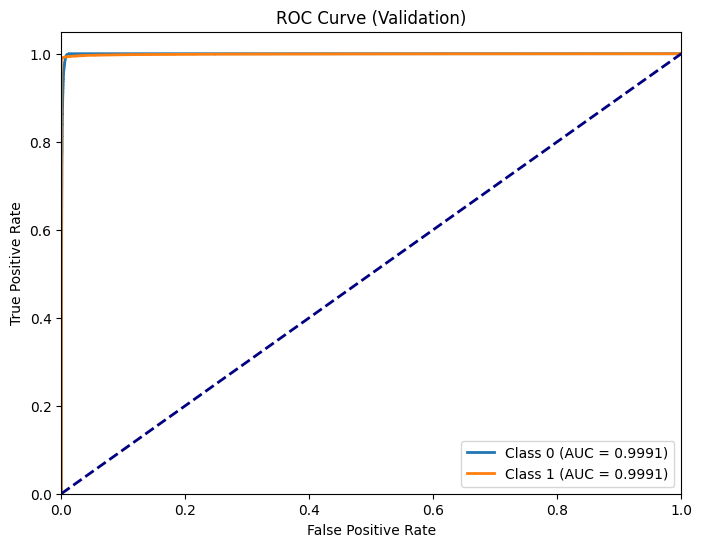

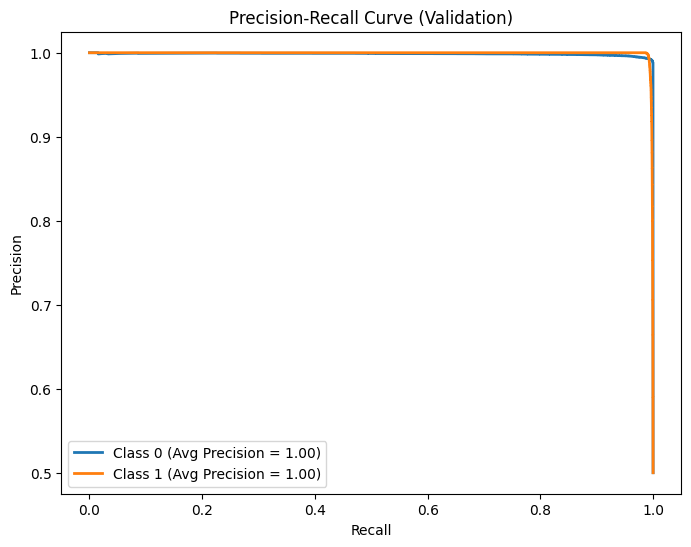

1368/1368 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Test Loss: 0.034073
Test Accuracy: 0.990471
Test F1-Score: 0.909316
Test Precision: 0.851447
Test Recall: 0.992132
Test Evaluation Time: 5.18 seconds
Test Classification Report:
              precision    recall  f1-score   support

           0   0.703035  0.993871  0.823529       979
           1   0.999858  0.990393  0.995103     42782

    accuracy                       0.990471     43761
   macro avg   0.851447  0.992132  0.909316     43761
weighted avg   0.993218  0.990471  0.991265     43761



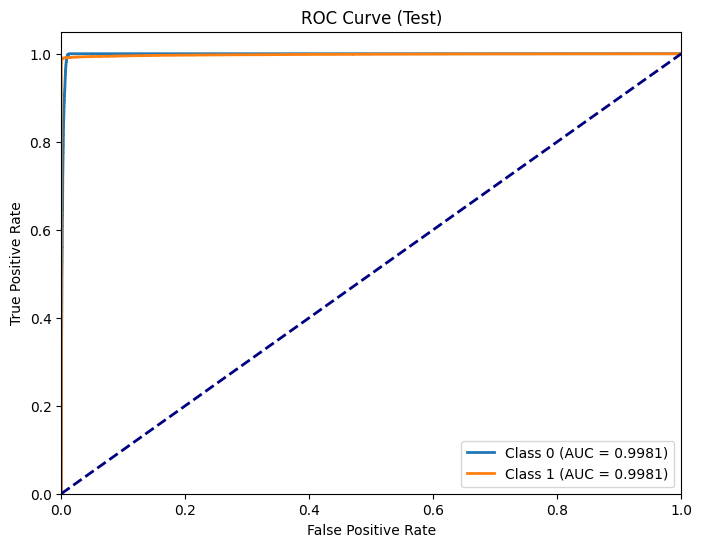

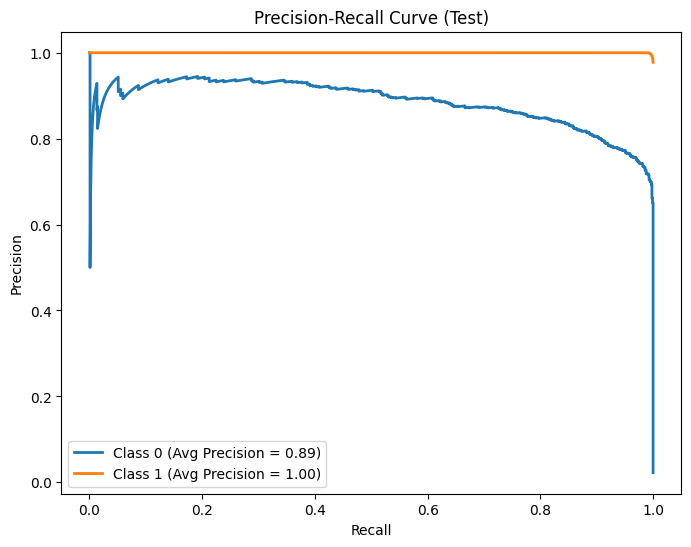

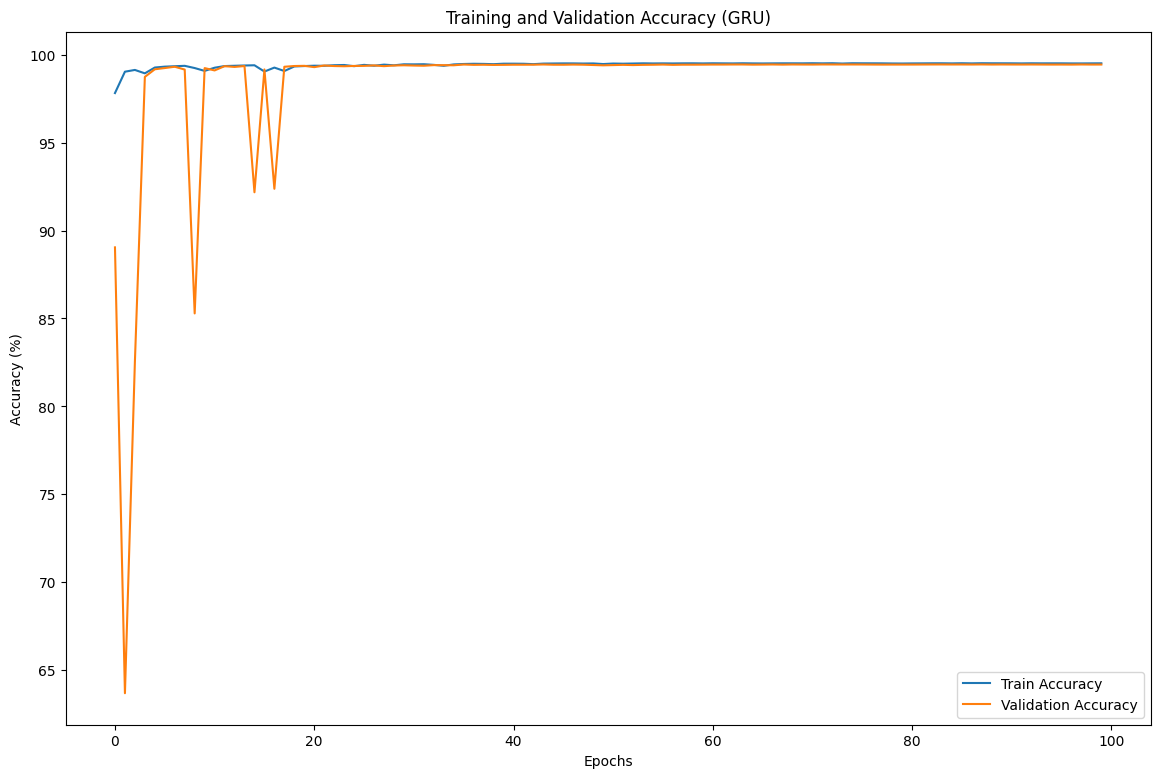

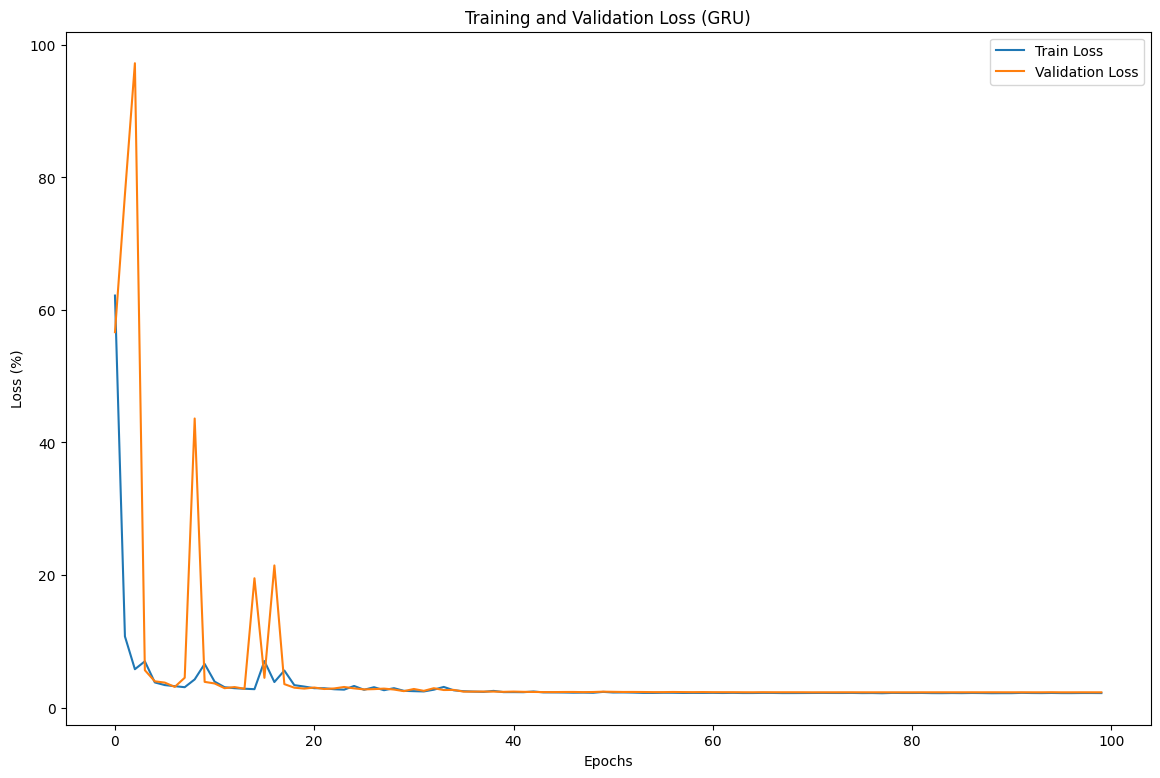

Epoch 1 - Train Loss: 62.17%, Validation Loss: 56.65%, Train Accuracy: 97.82%, Validation Accuracy: 89.04%
Epoch 2 - Train Loss: 10.74%, Validation Loss: 77.44%, Train Accuracy: 99.03%, Validation Accuracy: 63.69%
Epoch 3 - Train Loss: 5.79%, Validation Loss: 97.23%, Train Accuracy: 99.13%, Validation Accuracy: 82.54%
Epoch 4 - Train Loss: 6.98%, Validation Loss: 5.64%, Train Accuracy: 98.94%, Validation Accuracy: 98.74%
Epoch 5 - Train Loss: 3.79%, Validation Loss: 3.96%, Train Accuracy: 99.27%, Validation Accuracy: 99.17%
Epoch 6 - Train Loss: 3.40%, Validation Loss: 3.77%, Train Accuracy: 99.32%, Validation Accuracy: 99.24%
Epoch 7 - Train Loss: 3.23%, Validation Loss: 3.12%, Train Accuracy: 99.34%, Validation Accuracy: 99.31%
Epoch 8 - Train Loss: 3.08%, Validation Loss: 4.50%, Train Accuracy: 99.37%, Validation Accuracy: 99.15%
Epoch 9 - Train Loss: 4.25%, Validation Loss: 43.62%, Train Accuracy: 99.24%, Validation Accuracy: 85.29%
Epoch 10 - Train Loss: 6.59%, Validation Loss: 3.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score, average_precision_score # Import average_precision_score
import seaborn as sns
import time


def evaluate_model(model, X, y_one_hot, dataset_name="Validation"):
    start_time = time.time()

    loss, accuracy = model.evaluate(X, y_one_hot, verbose=0)
    evaluation_time = time.time() - start_time

    predictions = model.predict(X)
    true_labels = np.argmax(y_one_hot, axis=1)
    pred_labels = np.argmax(predictions, axis=1)


    val_f1 = f1_score(true_labels, pred_labels, average='macro')
    val_precision = precision_score(true_labels, pred_labels, average='macro')
    val_recall = recall_score(true_labels, pred_labels, average='macro')

    print(f"{dataset_name} Loss: {loss:.6f}")
    print(f"{dataset_name} Accuracy: {accuracy:.6f}")
    print(f"{dataset_name} F1-Score: {val_f1:.6f}")
    print(f"{dataset_name} Precision: {val_precision:.6f}")
    print(f"{dataset_name} Recall: {val_recall:.6f}")
    print(f"{dataset_name} Evaluation Time: {evaluation_time:.2f} seconds")

    target_names = [str(i) for i in range(2)]
    val_classification_report = classification_report(true_labels, pred_labels, target_names=target_names, digits=6)
    print(f"{dataset_name} Classification Report:")
    print(val_classification_report)


    plot_roc_curve(true_labels, predictions, 2, dataset_name)
    plot_precision_recall_curve(true_labels, predictions, 2, dataset_name)


def plot_roc_curve(true_labels, predictions, num_classes, dataset_name):
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(true_labels, predictions[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.4f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({dataset_name})')
    plt.legend(loc="lower right")
    plt.show()


def plot_precision_recall_curve(true_labels, predictions, num_classes, dataset_name):
    precision = {}
    recall = {}
    average_precision = {}

    for i in range(num_classes):
        precision[i], recall[i], _ = precision_recall_curve(true_labels, predictions[:, i], pos_label=i)
        average_precision[i] = average_precision_score(true_labels, predictions[:, i], pos_label=i)

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (Avg Precision = {average_precision[i]:.2f})')

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve ({dataset_name})")
    plt.legend(loc="best")
    plt.show()


evaluate_model(model_gru, X_TON_IOT_valid, y_TON_IOT_valid_one_hot, dataset_name="Validation")


y_TON_IOT_test2_one_hot = tf.keras.utils.to_categorical(y_TON_IOT_test2, num_classes=2)
evaluate_model(model_gru, X_TON_IOT_test2, y_TON_IOT_test2_one_hot, dataset_name="Test")


plt.figure(figsize=(14, 9))
plt.plot(np.array(history_gru.history['accuracy']) * 100, label='Train Accuracy')
plt.plot(np.array(history_gru.history['val_accuracy']) * 100, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy (GRU)')
plt.legend()
plt.show()

plt.figure(figsize=(14, 9))
plt.plot(np.array(history_gru.history['loss']) * 100, label='Train Loss')
plt.plot(np.array(history_gru.history['val_loss']) * 100, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (%)')
plt.title('Training and Validation Loss (GRU)')
plt.legend()
plt.show()


for epoch, (loss, val_loss, accuracy, val_accuracy) in enumerate(zip(history_gru.history['loss'],
                                                                      history_gru.history['val_loss'],
                                                                      history_gru.history['accuracy'],
                                                                      history_gru.history['val_accuracy']), 1):
    print(f"Epoch {epoch} - Train Loss: {loss * 100:.2f}%, Validation Loss: {val_loss * 100:.2f}%, Train Accuracy: {accuracy * 100:.2f}%, Validation Accuracy: {val_accuracy * 100:.2f}%")

In [ ]:
import pickle
# Save the history object of the GRU model
with open('history_gru.pkl', 'wb') as file:
    pickle.dump(history_gru.history, file)

#***LSTM***

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense, BatchNormalization,LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, precision_score, recall_score
import seaborn as sns
import time
import numpy as np


def scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)  # Ensure it returns a float
    else:
        return float(lr * tf.math.exp(-0.1))  # Ensure it returns a float

lr_scheduler = LearningRateScheduler(scheduler)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model_lstm = Sequential()
model_lstm.add(LSTM(128, activation='tanh', return_sequences=True, input_shape=X_TON_IOT_train.shape[1:], kernel_regularizer=l2(0.01)))
model_lstm.add(BatchNormalization())
model_lstm.add(Dropout(0.5))
model_lstm.add(LSTM(256, activation='tanh', kernel_regularizer=l2(0.01)))
model_lstm.add(BatchNormalization())
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(2, activation='softmax'))

model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()

history_lstm = model_lstm.fit(X_TON_IOT_train, y_TON_IOT_train_one_hot, epochs=100, batch_size=1024,
                            validation_data=(X_TON_IOT_valid, y_TON_IOT_valid_one_hot),
                            callbacks=[lr_scheduler], verbose=1)
end_time = time.time()
training_time = end_time - start_time

 # training_time
print(f"Le temps d'entraînement du modèleLSTM est de {training_time:.2f} secondes.")

Epoch 1/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 68ms/step - accuracy: 0.9438 - loss: 1.1465 - val_accuracy: 0.5357 - val_loss: 0.7954 - learning_rate: 0.0010
Epoch 2/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.9886 - loss: 0.1175 - val_accuracy: 0.8612 - val_loss: 0.3427 - learning_rate: 0.0010
Epoch 3/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - accuracy: 0.9913 - loss: 0.0591 - val_accuracy: 0.9912 - val_loss: 0.0527 - learning_rate: 0.0010
Epoch 4/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - accuracy: 0.9920 - loss: 0.0447 - val_accuracy: 0.9923 - val_loss: 0.0398 - learning_rate: 0.0010
Epoch 5/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - accuracy: 0.9925 - loss: 0.0383 - val_accuracy: 0.9220 - val_loss: 0.1977 - learning_rate: 0.0010
Epoch 6/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 70ms/step - accuracy: 0.9880 - loss: 0.0848 - val_accuracy: 0.9421 - val_loss: 0.1425 - learning_rate: 0.0010
Epoch 7/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 69ms/step - accuracy: 0.9

2668/2668 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step
Validation Loss: 0.030840
Validation Accuracy: 0.993286
Validation F1-Score: 0.993286
Validation Precision: 0.993303
Validation Recall: 0.993286
Validation Evaluation Time: 10.15 seconds
Validation Classification Report:
              precision    recall  f1-score   support

           0   0.990448  0.996180  0.993306     42674
           1   0.996158  0.990392  0.993267     42674

    accuracy                       0.993286     85348
   macro avg   0.993303  0.993286  0.993286     85348
weighted avg   0.993303  0.993286  0.993286     85348



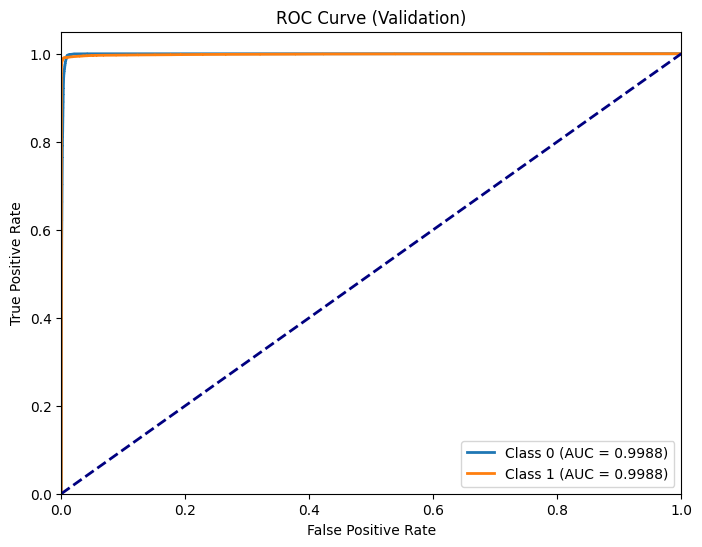

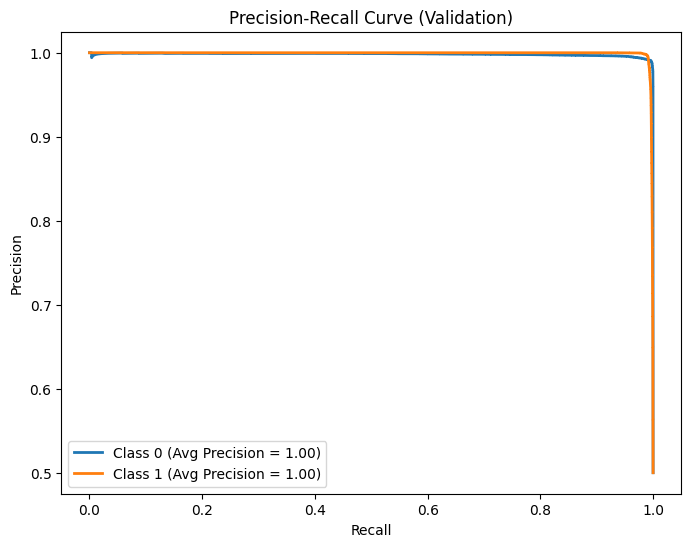

1368/1368 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Test Loss: 0.036733
Test Accuracy: 0.990037
Test F1-Score: 0.905689
Test Precision: 0.847066
Test Recall: 0.990413
Test Evaluation Time: 4.82 seconds
Test Classification Report:
              precision    recall  f1-score   support

           0   0.694345  0.990807  0.816498       979
           1   0.999788  0.990019  0.994879     42782

    accuracy                       0.990037     43761
   macro avg   0.847066  0.990413  0.905689     43761
weighted avg   0.992954  0.990037  0.990889     43761



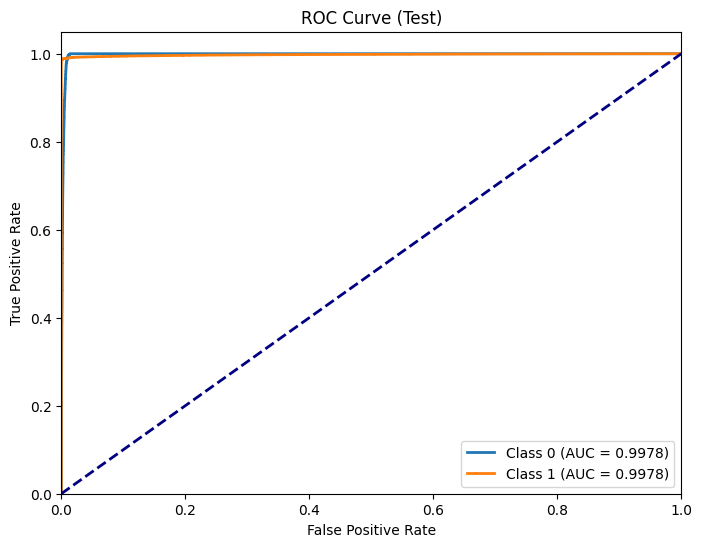

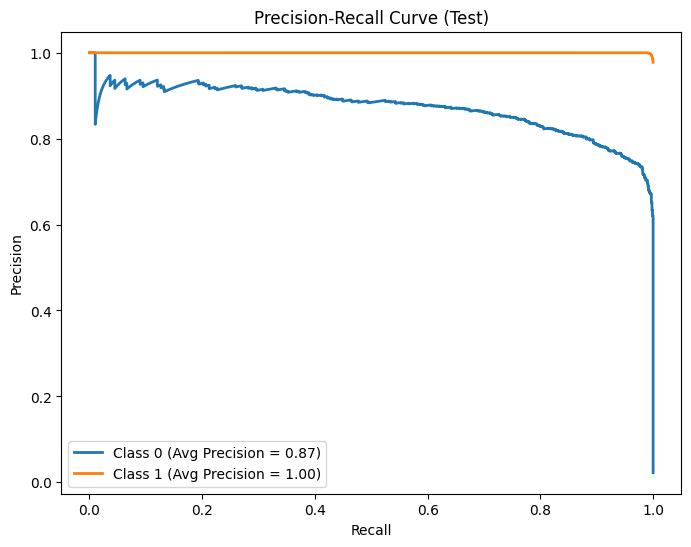

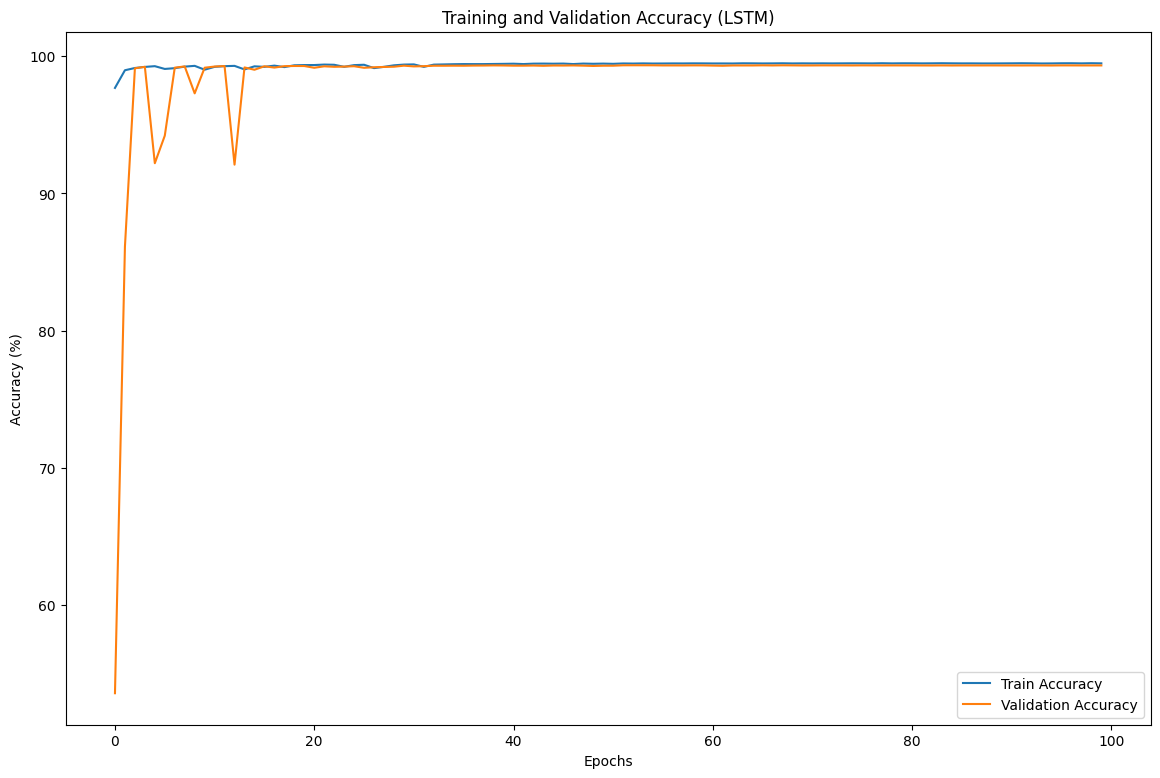

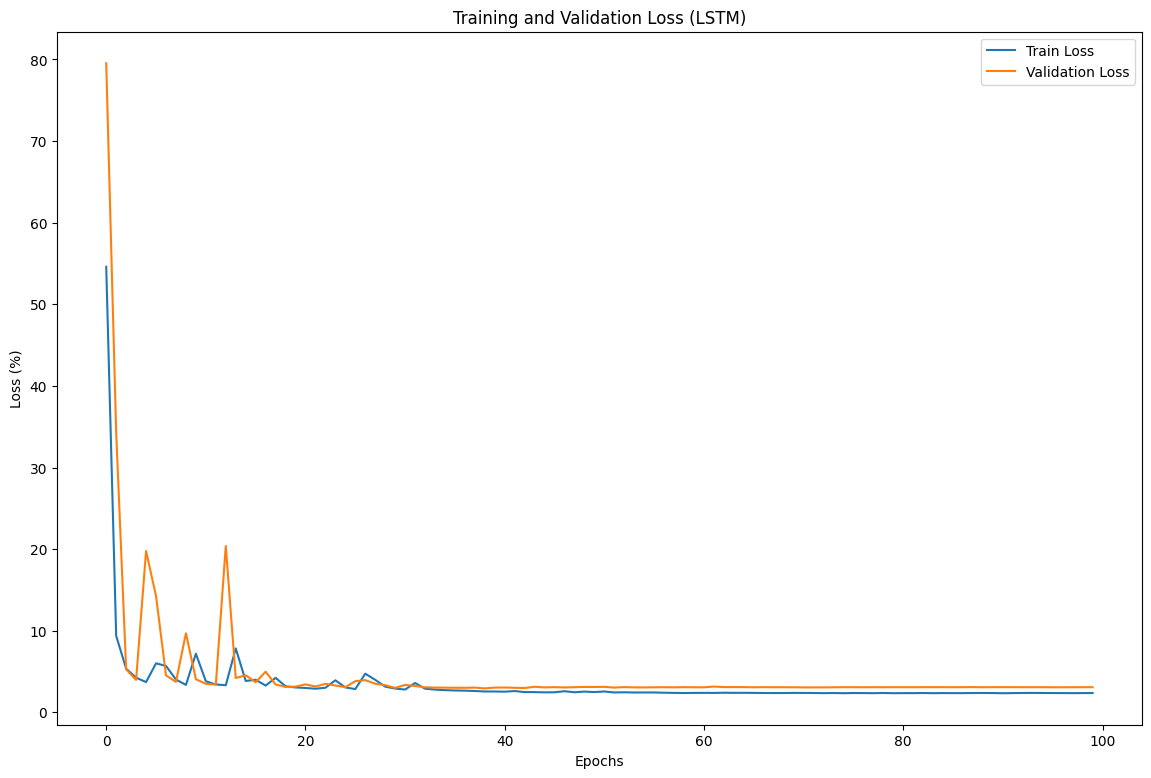

Epoch 1 - Train Loss: 54.60%, Validation Loss: 79.54%, Train Accuracy: 97.69%, Validation Accuracy: 53.57%
Epoch 2 - Train Loss: 9.38%, Validation Loss: 34.27%, Train Accuracy: 98.98%, Validation Accuracy: 86.12%
Epoch 3 - Train Loss: 5.36%, Validation Loss: 5.27%, Train Accuracy: 99.14%, Validation Accuracy: 99.12%
Epoch 4 - Train Loss: 4.25%, Validation Loss: 3.98%, Train Accuracy: 99.22%, Validation Accuracy: 99.23%
Epoch 5 - Train Loss: 3.71%, Validation Loss: 19.77%, Train Accuracy: 99.27%, Validation Accuracy: 92.20%
Epoch 6 - Train Loss: 6.01%, Validation Loss: 14.25%, Train Accuracy: 99.07%, Validation Accuracy: 94.21%
Epoch 7 - Train Loss: 5.69%, Validation Loss: 4.54%, Train Accuracy: 99.13%, Validation Accuracy: 99.16%
Epoch 8 - Train Loss: 4.02%, Validation Loss: 3.74%, Train Accuracy: 99.24%, Validation Accuracy: 99.26%
Epoch 9 - Train Loss: 3.37%, Validation Loss: 9.69%, Train Accuracy: 99.30%, Validation Accuracy: 97.29%
Epoch 10 - Train Loss: 7.19%, Validation Loss: 4.0

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score, average_precision_score
import seaborn as sns
import numpy as np
import time

def evaluate_model(model, X, y_one_hot, dataset_name="Validation"):
    start_time = time.time()

    loss, accuracy = model.evaluate(X, y_one_hot, verbose=0)
    evaluation_time = time.time() - start_time

    predictions = model.predict(X)
    true_labels = np.argmax(y_one_hot, axis=1)
    pred_labels = np.argmax(predictions, axis=1)


    val_f1 = f1_score(true_labels, pred_labels, average='macro')
    val_precision = precision_score(true_labels, pred_labels, average='macro')
    val_recall = recall_score(true_labels, pred_labels, average='macro')

    print(f"{dataset_name} Loss: {loss:.6f}")
    print(f"{dataset_name} Accuracy: {accuracy:.6f}")
    print(f"{dataset_name} F1-Score: {val_f1:.6f}")
    print(f"{dataset_name} Precision: {val_precision:.6f}")
    print(f"{dataset_name} Recall: {val_recall:.6f}")
    print(f"{dataset_name} Evaluation Time: {evaluation_time:.2f} seconds")

    target_names = [str(i) for i in range(2)]
    val_classification_report = classification_report(true_labels, pred_labels, target_names=target_names, digits=6)
    print(f"{dataset_name} Classification Report:")
    print(val_classification_report)


    plot_roc_curve(true_labels, predictions, 2, dataset_name)


    plot_precision_recall_curve(true_labels, predictions, 2, dataset_name)


def plot_roc_curve(true_labels, predictions, num_classes, dataset_name):
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(true_labels, predictions[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.4f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({dataset_name})')
    plt.legend(loc="lower right")
    plt.show()


def plot_precision_recall_curve(true_labels, predictions, num_classes, dataset_name):
    precision = {}
    recall = {}
    average_precision = {}

    for i in range(num_classes):
        precision[i], recall[i], _ = precision_recall_curve(true_labels, predictions[:, i], pos_label=i)
        average_precision[i] = average_precision_score(true_labels, predictions[:, i], pos_label=i)

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (Avg Precision = {average_precision[i]:.2f})')

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve ({dataset_name})")
    plt.legend(loc="best")
    plt.show()


evaluate_model(model_lstm, X_TON_IOT_valid, y_TON_IOT_valid_one_hot, dataset_name="Validation")


y_TON_IOT_test2_one_hot = tf.keras.utils.to_categorical(y_TON_IOT_test2, num_classes=2)
evaluate_model(model_lstm, X_TON_IOT_test2, y_TON_IOT_test2_one_hot, dataset_name="Test")


plt.figure(figsize=(14, 9))
plt.plot(np.array(history_lstm.history['accuracy']) * 100, label='Train Accuracy')
plt.plot(np.array(history_lstm.history['val_accuracy']) * 100, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy (LSTM)')
plt.legend()
plt.show()

plt.figure(figsize=(14, 9))
plt.plot(np.array(history_lstm.history['loss']) * 100, label='Train Loss')
plt.plot(np.array(history_lstm.history['val_loss']) * 100, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (%)')
plt.title('Training and Validation Loss (LSTM)')
plt.legend()
plt.show()


for epoch, (loss, val_loss, accuracy, val_accuracy) in enumerate(zip(history_lstm.history['loss'],
                                                                      history_lstm.history['val_loss'],
                                                                      history_lstm.history['accuracy'],
                                                                      history_lstm.history['val_accuracy']), 1):
    print(f"Epoch {epoch} - Train Loss: {loss * 100:.2f}%, Validation Loss: {val_loss * 100:.2f}%, Train Accuracy: {accuracy * 100:.2f}%, Validation Accuracy: {val_accuracy * 100:.2f}%")


In [ ]:
import pickle
# Save the history object of the LSTM model
with open('history_lstm.pkl', 'wb') as file:
    pickle.dump(history_lstm.history, file)

#***CNN_RNN***

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense, BatchNormalization, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, precision_score, recall_score
import seaborn as sns


def scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)  # Ensure it returns a float
    else:
        return float(lr * tf.math.exp(-0.1))  # Ensure it returns a float

lr_scheduler = LearningRateScheduler(scheduler)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#CNN_RNN Model
model_rnn_cnn = Sequential()
model_rnn_cnn.add(Conv1D(64, 3, activation='relu', input_shape=X_TON_IOT_train.shape[1:]))
model_rnn_cnn.add(MaxPooling1D(pool_size=2))
model_rnn_cnn.add(Conv1D(128, 3, activation='relu'))
model_rnn_cnn.add(MaxPooling1D(pool_size=2))
model_rnn_cnn.add(SimpleRNN(128, activation='tanh', return_sequences=True, kernel_regularizer=l2(0.01)))
model_rnn_cnn.add(BatchNormalization())
model_rnn_cnn.add(Dropout(0.5))
model_rnn_cnn.add(SimpleRNN(256, activation='tanh', kernel_regularizer=l2(0.01)))
model_rnn_cnn.add(BatchNormalization())
model_rnn_cnn.add(Dropout(0.5))
model_rnn_cnn.add(Flatten())
model_rnn_cnn.add(Dense(2, activation='softmax'))

model_rnn_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()

history_rnn_cnn = model_rnn_cnn.fit(X_TON_IOT_train, y_TON_IOT_train_one_hot, epochs=100, batch_size=1024,
                                    validation_data=(X_TON_IOT_valid, y_TON_IOT_valid_one_hot),
                                    callbacks=[lr_scheduler], verbose=1)
end_time = time.time()
training_time = end_time - start_time

 # training_time
print(f"Le temps d'entraînement du modèle CNN_RNN est de {training_time:.2f} secondes.")

Epoch 1/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.9682 - loss: 1.8419 - val_accuracy: 0.9911 - val_loss: 0.2319 - learning_rate: 0.0010
Epoch 2/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9919 - loss: 0.0949 - val_accuracy: 0.9888 - val_loss: 0.1133 - learning_rate: 0.0010
Epoch 3/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9908 - loss: 0.0703 - val_accuracy: 0.5010 - val_loss: 2.8529 - learning_rate: 0.0010
Epoch 4/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9814 - loss: 0.1506 - val_accuracy: 0.9853 - val_loss: 0.0848 - learning_rate: 0.0010
Epoch 5/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9917 - loss: 0.0604 - val_accuracy: 0.9924 - val_loss: 0.0477 - learning_rate: 0.0010
Epoch 6/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9919 - loss: 0.0529 - val_accuracy: 0.9886 - val_loss: 0.1692 - learning_rate: 0.0010
Epoch 7/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9815 - 

2668/2668 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step
Validation Loss: 0.029648
Validation Accuracy: 0.994552
Validation F1-Score: 0.994552
Validation Precision: 0.994573
Validation Recall: 0.994552
Validation Evaluation Time: 10.30 seconds
Validation Classification Report:
              precision    recall  f1-score   support

           0   0.991294  0.997868  0.994570     42674
           1   0.997853  0.991236  0.994534     42674

    accuracy                       0.994552     85348
   macro avg   0.994573  0.994552  0.994552     85348
weighted avg   0.994573  0.994552  0.994552     85348



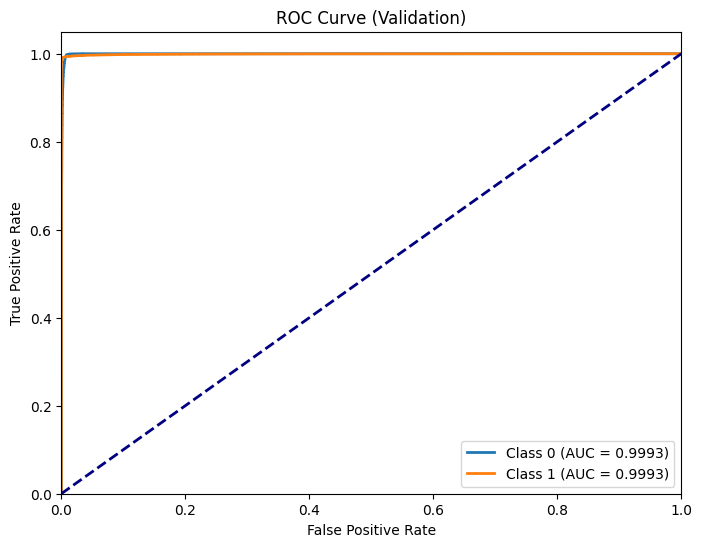

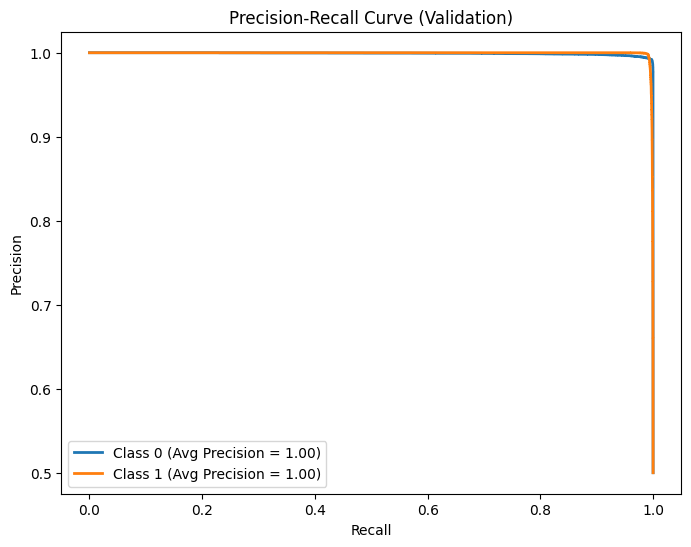

1368/1368 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Test Loss: 0.038936
Test Accuracy: 0.990905
Test F1-Score: 0.912330
Test Precision: 0.857213
Test Recall: 0.989360
Test Evaluation Time: 10.30 seconds
Test Classification Report:
              precision    recall  f1-score   support

           0   0.714708  0.987743  0.829331       979
           1   0.999717  0.990978  0.995328     42782

    accuracy                       0.990905     43761
   macro avg   0.857213  0.989360  0.912330     43761
weighted avg   0.993341  0.990905  0.991614     43761



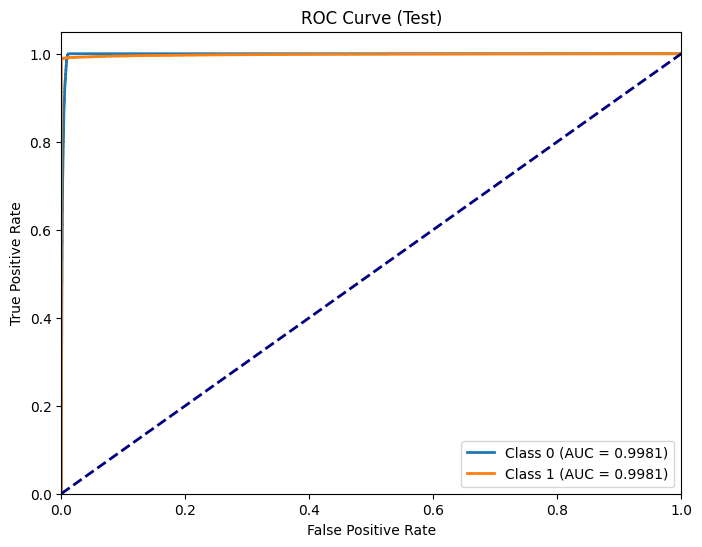

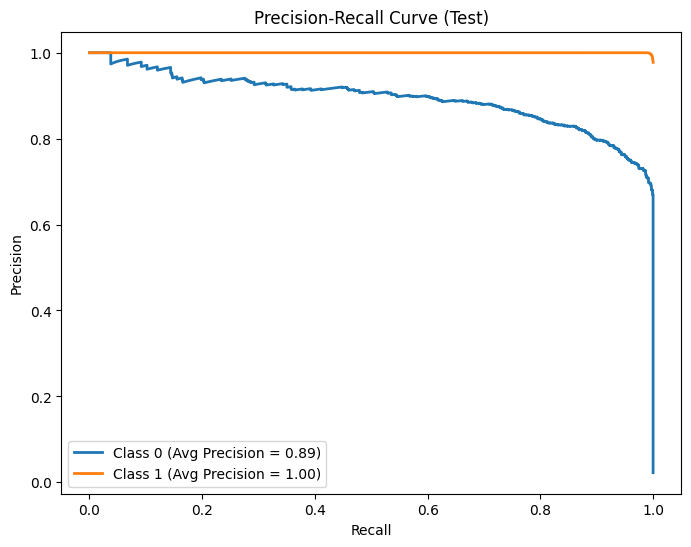

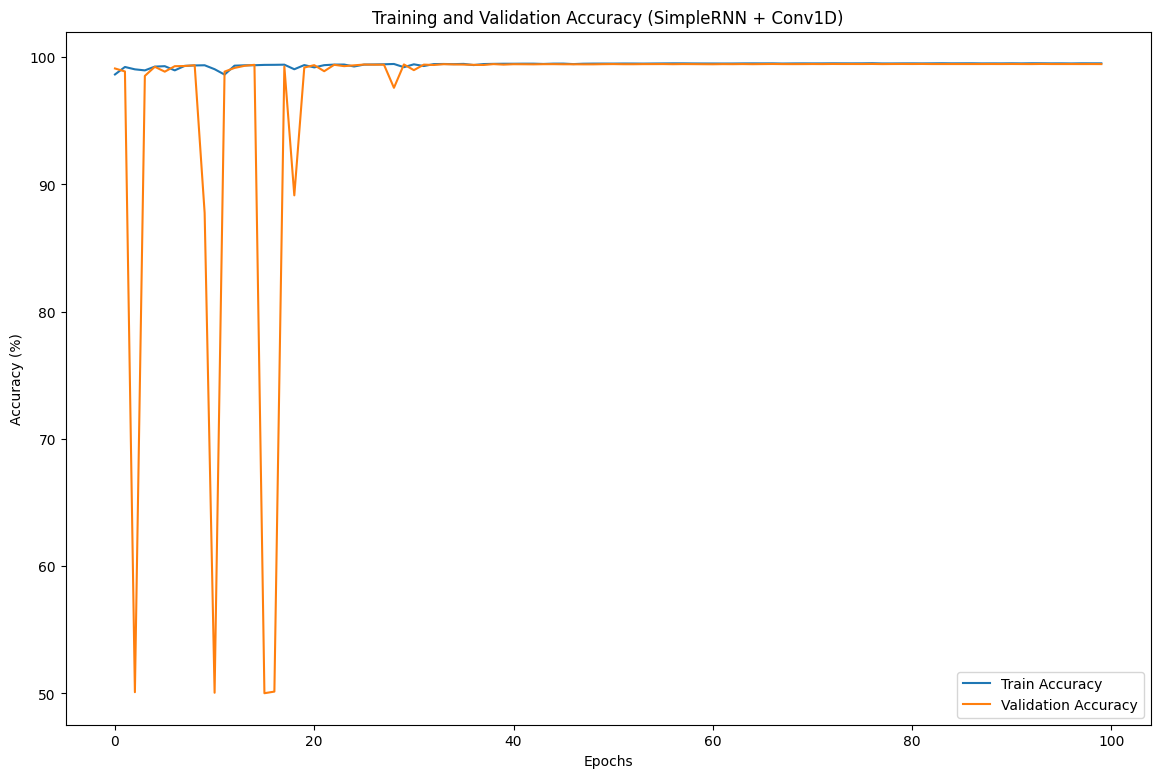

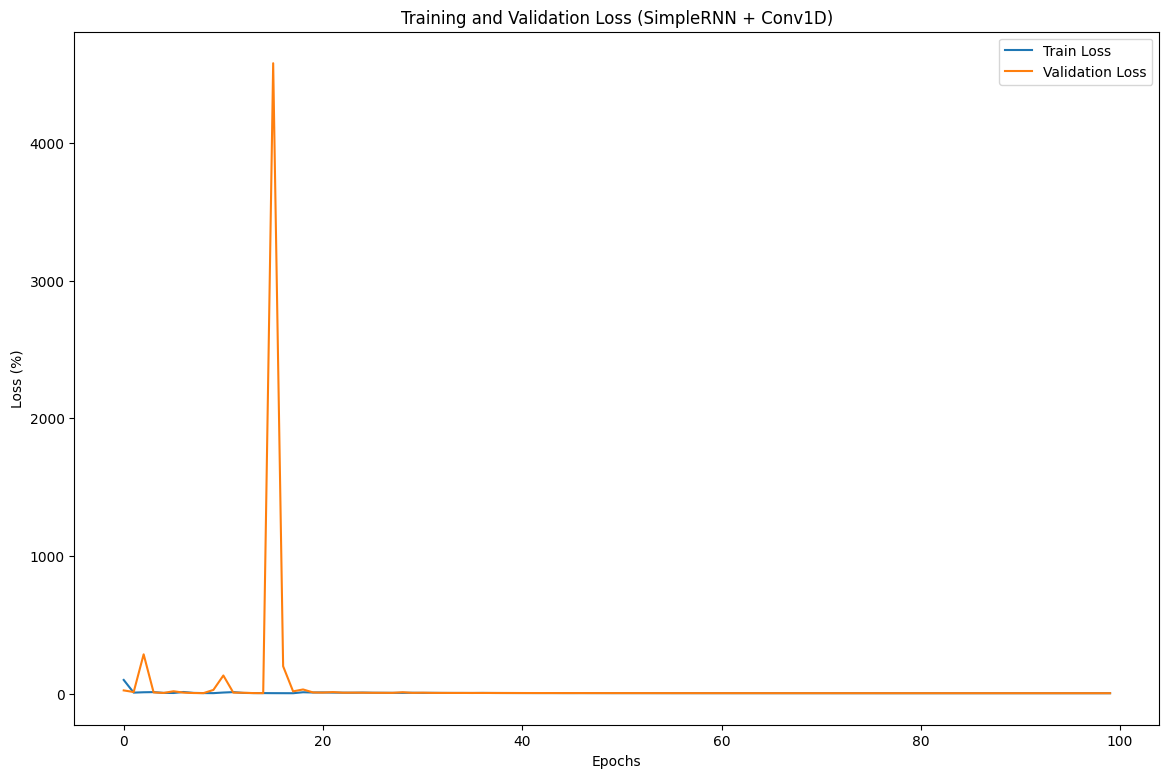

Epoch 1 - Train Loss: 99.20%, Validation Loss: 23.19%, Train Accuracy: 98.64%, Validation Accuracy: 99.11%
Epoch 2 - Train Loss: 7.03%, Validation Loss: 11.33%, Train Accuracy: 99.23%, Validation Accuracy: 98.88%
Epoch 3 - Train Loss: 9.67%, Validation Loss: 285.29%, Train Accuracy: 99.04%, Validation Accuracy: 50.10%
Epoch 4 - Train Loss: 10.78%, Validation Loss: 8.48%, Train Accuracy: 98.96%, Validation Accuracy: 98.53%
Epoch 5 - Train Loss: 5.15%, Validation Loss: 4.77%, Train Accuracy: 99.26%, Validation Accuracy: 99.24%
Epoch 6 - Train Loss: 4.37%, Validation Loss: 16.92%, Train Accuracy: 99.29%, Validation Accuracy: 98.86%
Epoch 7 - Train Loss: 11.70%, Validation Loss: 6.94%, Train Accuracy: 98.96%, Validation Accuracy: 99.29%
Epoch 8 - Train Loss: 5.12%, Validation Loss: 4.14%, Train Accuracy: 99.32%, Validation Accuracy: 99.30%
Epoch 9 - Train Loss: 3.73%, Validation Loss: 3.32%, Train Accuracy: 99.35%, Validation Accuracy: 99.37%
Epoch 10 - Train Loss: 3.32%, Validation Loss: 

In [ ]:

def evaluate_model(model, X, y_one_hot, dataset_name="Validation"):
    start_time = time.time()

    loss, accuracy = model.evaluate(X, y_one_hot, verbose=0)
    evaluation_time = time.time() - start_time

    predictions = model.predict(X)
    true_labels = np.argmax(y_one_hot, axis=1)
    pred_labels = np.argmax(predictions, axis=1)


    val_f1 = f1_score(true_labels, pred_labels, average='macro')
    val_precision = precision_score(true_labels, pred_labels, average='macro')
    val_recall = recall_score(true_labels, pred_labels, average='macro')

    print(f"{dataset_name} Loss: {loss:.6f}")
    print(f"{dataset_name} Accuracy: {accuracy:.6f}")
    print(f"{dataset_name} F1-Score: {val_f1:.6f}")
    print(f"{dataset_name} Precision: {val_precision:.6f}")
    print(f"{dataset_name} Recall: {val_recall:.6f}")
    print(f"{dataset_name} Evaluation Time: {evaluation_time:.2f} seconds")

    target_names = [str(i) for i in range(2)]
    val_classification_report = classification_report(true_labels, pred_labels, target_names=target_names, digits=6)
    print(f"{dataset_name} Classification Report:")
    print(val_classification_report)


    plot_roc_curve(true_labels, predictions, 2, dataset_name)
   plot_precision_recall_curve(true_labels, predictions, 2, dataset_name)


def plot_roc_curve(true_labels, predictions, num_classes, dataset_name):
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(true_labels, predictions[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.4f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({dataset_name})')
    plt.legend(loc="lower right")
    plt.show()


def plot_precision_recall_curve(true_labels, predictions, num_classes, dataset_name):
    precision = {}
    recall = {}
    average_precision = {}

    for i in range(num_classes):
        precision[i], recall[i], _ = precision_recall_curve(true_labels, predictions[:, i], pos_label=i)
        average_precision[i] = average_precision_score(true_labels, predictions[:, i], pos_label=i)

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (Avg Precision = {average_precision[i]:.2f})')

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve ({dataset_name})")
    plt.legend(loc="best")
    plt.show()


evaluate_model(model_rnn_cnn, X_TON_IOT_valid, y_TON_IOT_valid_one_hot, dataset_name="Validation")


y_TON_IOT_test2_one_hot = tf.keras.utils.to_categorical(y_TON_IOT_test2, num_classes=2)
evaluate_model(model_rnn_cnn, X_TON_IOT_test2, y_TON_IOT_test2_one_hot, dataset_name="Test")


plt.figure(figsize=(14, 9))
plt.plot(np.array(history_rnn_cnn.history['accuracy']) * 100, label='Train Accuracy')
plt.plot(np.array(history_rnn_cnn.history['val_accuracy']) * 100, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy (SimpleRNN + Conv1D)')
plt.legend()
plt.show()

plt.figure(figsize=(14, 9))
plt.plot(np.array(history_rnn_cnn.history['loss']) * 100, label='Train Loss')
plt.plot(np.array(history_rnn_cnn.history['val_loss']) * 100, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (%)')
plt.title('Training and Validation Loss (SimpleRNN + Conv1D)')
plt.legend()
plt.show()


for epoch, (loss, val_loss, accuracy, val_accuracy) in enumerate(zip(history_rnn_cnn.history['loss'],
                                                                      history_rnn_cnn.history['val_loss'],
                                                                      history_rnn_cnn.history['accuracy'],
                                                                      history_rnn_cnn.history['val_accuracy']), 1):
    print(f"Epoch {epoch} - Train Loss: {loss * 100:.2f}%, Validation Loss: {val_loss * 100:.2f}%, Train Accuracy: {accuracy * 100:.2f}%, Validation Accuracy: {val_accuracy * 100:.2f}%")

In [ ]:
import pickle
# Save the history object of the  CNN_RNN model
with open('history_rnn_cnn.pkl', 'wb') as file:
    pickle.dump(history_rnn_cnn.history, file)

#***CNN_GRU***

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense, BatchNormalization, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
import time


def scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)  # Ensure it returns a float
    else:
        return float(lr * tf.math.exp(-0.1))  # Ensure it returns a float

lr_scheduler = LearningRateScheduler(scheduler)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# CNN_GRU
model_gru_cnn = Sequential()
model_gru_cnn.add(Conv1D(64, 3, activation='relu', input_shape=X_TON_IOT_train.shape[1:]))
model_gru_cnn.add(MaxPooling1D(pool_size=2))
model_gru_cnn.add(Conv1D(128, 3, activation='relu'))
model_gru_cnn.add(MaxPooling1D(pool_size=2))
model_gru_cnn.add(GRU(128, activation='tanh', return_sequences=True, kernel_regularizer=l2(0.01)))
model_gru_cnn.add(BatchNormalization())
model_gru_cnn.add(Dropout(0.5))
model_gru_cnn.add(GRU(256, activation='tanh', kernel_regularizer=l2(0.01)))
model_gru_cnn.add(BatchNormalization())
model_gru_cnn.add(Dropout(0.5))
model_gru_cnn.add(Flatten())
model_gru_cnn.add(Dense(2, activation='softmax'))

model_gru_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


start_time = time.time()
CNN_GRU Model
history_gru_cnn = model_gru_cnn.fit(X_TON_IOT_train, y_TON_IOT_train_one_hot, epochs=100, batch_size=1024,
                                    validation_data=(X_TON_IOT_valid, y_TON_IOT_valid_one_hot),
                                    callbacks=[lr_scheduler], verbose=1)
end_time = time.time()
training_time = end_time - start_time

 # training_time
print(f"Le temps d'entraînement du modèle CNN_GRU est de {training_time:.2f} secondes.")


Epoch 1/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9710 - loss: 1.8048 - val_accuracy: 0.9927 - val_loss: 0.5193 - learning_rate: 0.0010
Epoch 2/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9899 - loss: 0.1177 - val_accuracy: 0.5700 - val_loss: 1.4641 - learning_rate: 0.0010
Epoch 3/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9761 - loss: 0.1960 - val_accuracy: 0.9919 - val_loss: 0.0693 - learning_rate: 0.0010
Epoch 4/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9927 - loss: 0.0583 - val_accuracy: 0.9899 - val_loss: 0.0915 - learning_rate: 0.0010
Epoch 5/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9932 - loss: 0.0438 - val_accuracy: 0.8834 - val_loss: 0.3093 - learning_rate: 0.0010
Epoch 6/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9871 - loss: 0.0946 - val_accuracy: 0.7687 - val_loss: 0.5198 - learning_rate: 0.0010
Epoch 7/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.9884 - 

2668/2668 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
Validation Loss: 0.023271
Validation Accuracy: 0.994118
Validation F1-Score: 0.994118
Validation Precision: 0.994131
Validation Recall: 0.994118
Validation Evaluation Time: 10.30 seconds
Validation Classification Report:
              precision    recall  f1-score   support

           0   0.991630  0.996649  0.994133     42674
           1   0.996632  0.991587  0.994103     42674

    accuracy                       0.994118     85348
   macro avg   0.994131  0.994118  0.994118     85348
weighted avg   0.994131  0.994118  0.994118     85348



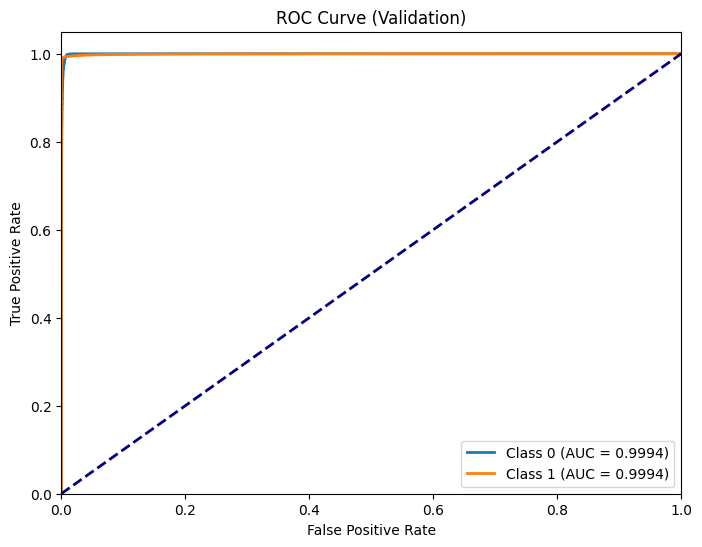

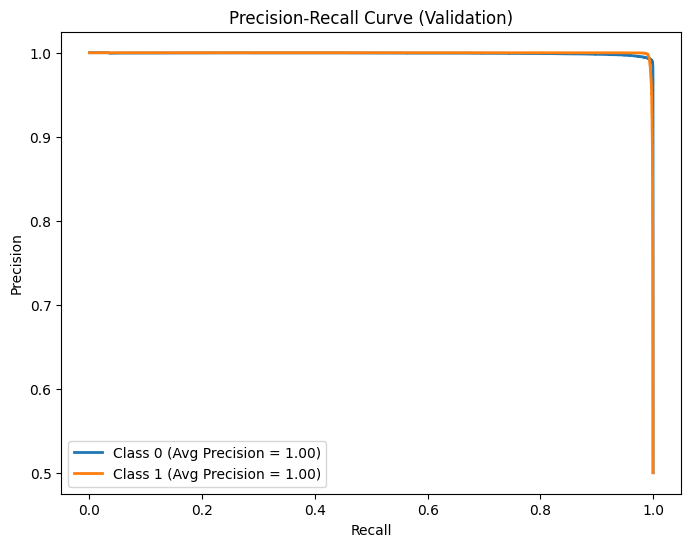

1368/1368 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Test Loss: 0.029582
Test Accuracy: 0.991294
Test F1-Score: 0.915190
Test Precision: 0.862387
Test Recall: 0.987563
Test Evaluation Time: 5.03 seconds
Test Classification Report:
              precision    recall  f1-score   support

           0   0.725151  0.983657  0.834850       979
           1   0.999623  0.991468  0.995529     42782

    accuracy                       0.991294     43761
   macro avg   0.862387  0.987563  0.915190     43761
weighted avg   0.993483  0.991294  0.991934     43761



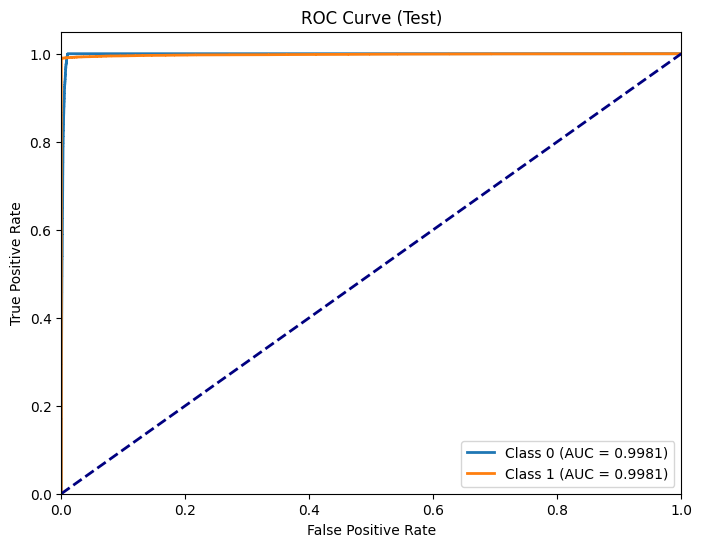

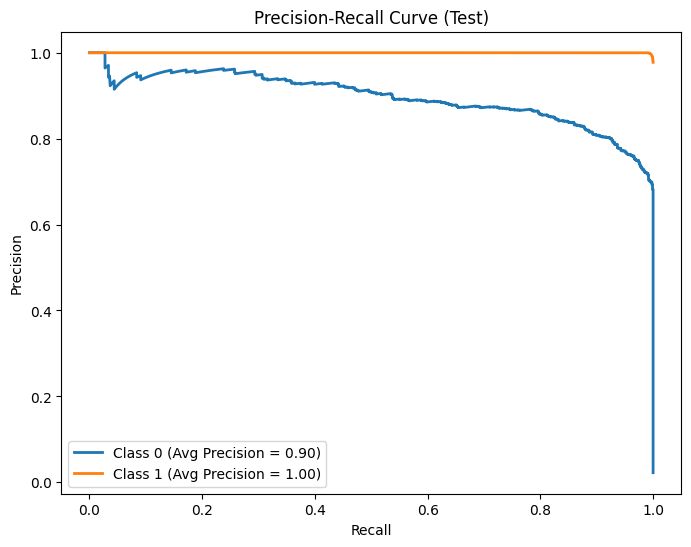

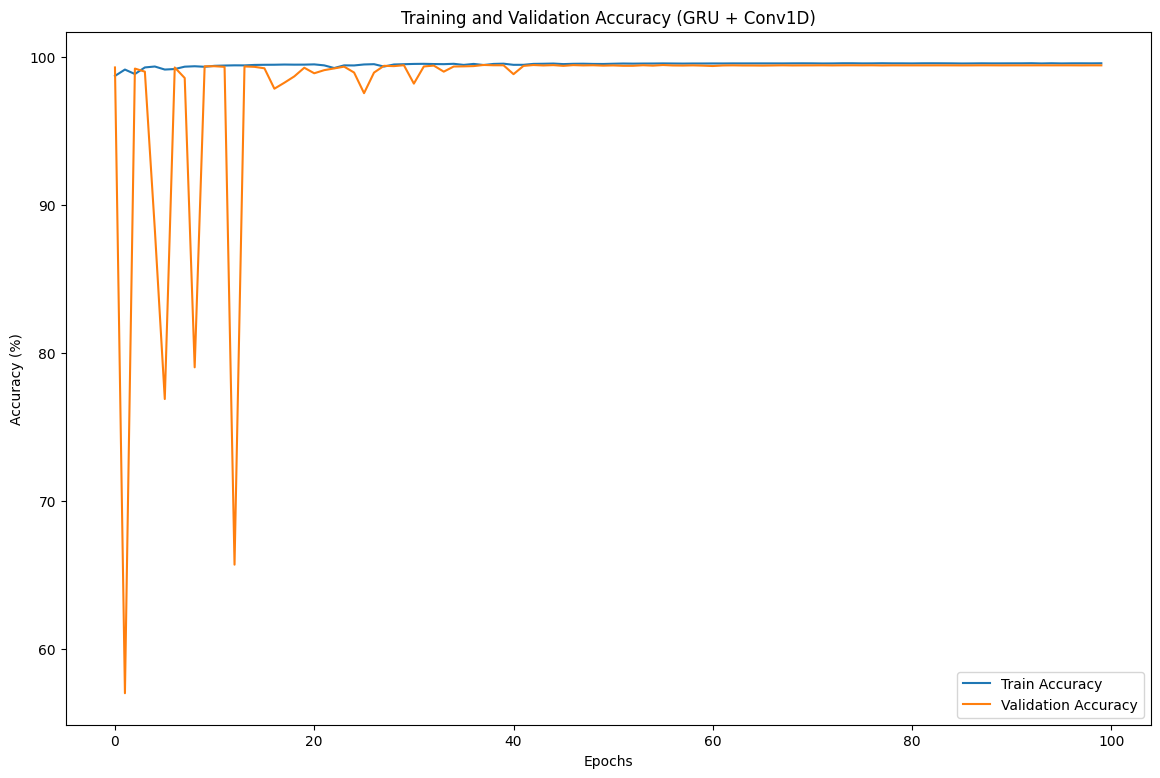

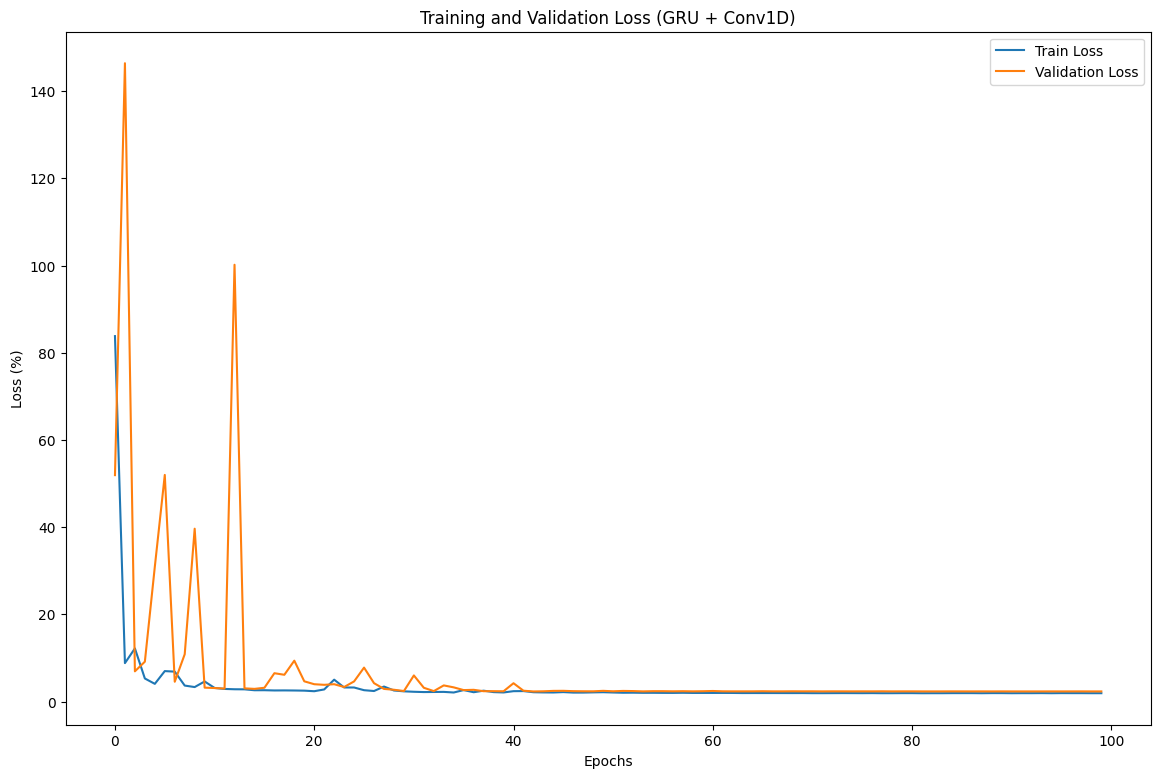

Epoch 1 - Train Loss: 83.82%, Validation Loss: 51.93%, Train Accuracy: 98.70%, Validation Accuracy: 99.27%
Epoch 2 - Train Loss: 8.82%, Validation Loss: 146.41%, Train Accuracy: 99.13%, Validation Accuracy: 57.00%
Epoch 3 - Train Loss: 12.19%, Validation Loss: 6.93%, Train Accuracy: 98.83%, Validation Accuracy: 99.19%
Epoch 4 - Train Loss: 5.29%, Validation Loss: 9.15%, Train Accuracy: 99.27%, Validation Accuracy: 98.99%
Epoch 5 - Train Loss: 4.06%, Validation Loss: 30.93%, Train Accuracy: 99.33%, Validation Accuracy: 88.34%
Epoch 6 - Train Loss: 6.99%, Validation Loss: 51.98%, Train Accuracy: 99.13%, Validation Accuracy: 76.87%
Epoch 7 - Train Loss: 6.86%, Validation Loss: 4.54%, Train Accuracy: 99.16%, Validation Accuracy: 99.27%
Epoch 8 - Train Loss: 3.67%, Validation Loss: 10.85%, Train Accuracy: 99.32%, Validation Accuracy: 98.56%
Epoch 9 - Train Loss: 3.33%, Validation Loss: 39.65%, Train Accuracy: 99.35%, Validation Accuracy: 79.01%
Epoch 10 - Train Loss: 4.61%, Validation Loss:

In [ ]:

def evaluate_model(model, X, y_one_hot, dataset_name="Validation"):
    start_time = time.time()

    loss, accuracy = model.evaluate(X, y_one_hot, verbose=0)
    evaluation_time = time.time() - start_time

    predictions = model.predict(X)
    true_labels = np.argmax(y_one_hot, axis=1)
    pred_labels = np.argmax(predictions, axis=1)


    val_f1 = f1_score(true_labels, pred_labels, average='macro')
    val_precision = precision_score(true_labels, pred_labels, average='macro')
    val_recall = recall_score(true_labels, pred_labels, average='macro')

    print(f"{dataset_name} Loss: {loss:.6f}")
    print(f"{dataset_name} Accuracy: {accuracy:.6f}")
    print(f"{dataset_name} F1-Score: {val_f1:.6f}")
    print(f"{dataset_name} Precision: {val_precision:.6f}")
    print(f"{dataset_name} Recall: {val_recall:.6f}")
    print(f"{dataset_name} Evaluation Time: {evaluation_time:.2f} seconds")

    target_names = [str(i) for i in range(2)]
    val_classification_report = classification_report(true_labels, pred_labels, target_names=target_names, digits=6)
    print(f"{dataset_name} Classification Report:")
    print(val_classification_report)


    plot_roc_curve(true_labels, predictions, 2, dataset_name)
    plot_precision_recall_curve(true_labels, predictions, 2, dataset_name)


def plot_roc_curve(true_labels, predictions, num_classes, dataset_name):
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(true_labels, predictions[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.4f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({dataset_name})')
    plt.legend(loc="lower right")
    plt.show()

def plot_precision_recall_curve(true_labels, predictions, num_classes, dataset_name):
    precision = {}
    recall = {}
    average_precision = {}

    for i in range(num_classes):
        precision[i], recall[i], _ = precision_recall_curve(true_labels, predictions[:, i], pos_label=i)
        average_precision[i] = average_precision_score(true_labels, predictions[:, i], pos_label=i)

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (Avg Precision = {average_precision[i]:.2f})')

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve ({dataset_name})")
    plt.legend(loc="best")
    plt.show()


evaluate_model(model_gru_cnn, X_TON_IOT_valid, y_TON_IOT_valid_one_hot, dataset_name="Validation")


y_TON_IOT_test2_one_hot = tf.keras.utils.to_categorical(y_TON_IOT_test2, num_classes=2)
evaluate_model(model_gru_cnn, X_TON_IOT_test2, y_TON_IOT_test2_one_hot, dataset_name="Test")


plt.figure(figsize=(14, 9))
plt.plot(np.array(history_gru_cnn.history['accuracy']) * 100, label='Train Accuracy')
plt.plot(np.array(history_gru_cnn.history['val_accuracy']) * 100, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy (GRU + Conv1D)')
plt.legend()
plt.show()

plt.figure(figsize=(14, 9))
plt.plot(np.array(history_gru_cnn.history['loss']) * 100, label='Train Loss')
plt.plot(np.array(history_gru_cnn.history['val_loss']) * 100, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (%)')
plt.title('Training and Validation Loss (GRU + Conv1D)')
plt.legend()
plt.show()


for epoch, (loss, val_loss, accuracy, val_accuracy) in enumerate(zip(history_gru_cnn.history['loss'],
                                                                      history_gru_cnn.history['val_loss'],
                                                                      history_gru_cnn.history['accuracy'],
                                                                      history_gru_cnn.history['val_accuracy']), 1):
    print(f"Epoch {epoch} - Train Loss: {loss * 100:.2f}%, Validation Loss: {val_loss * 100:.2f}%, Train Accuracy: {accuracy * 100:.2f}%, Validation Accuracy: {val_accuracy * 100:.2f}%")

In [ ]:
import pickle
# Save the history object of the CNN_GRU model
with open('history_gru_cnn.pkl', 'wb') as file:
    pickle.dump(history_gru_cnn.history, file)

#***CNN_LSTM***

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense, BatchNormalization, Conv1D, MaxPooling1D, Flatten,LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, precision_score, recall_score
import seaborn as sns


def scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)  # Ensure it returns a float
    else:
        return float(lr * tf.math.exp(-0.1))  # Ensure it returns a float

lr_scheduler = LearningRateScheduler(scheduler)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#CNN_LSTM Model
model_lstm_cnn = Sequential()
model_lstm_cnn.add(Conv1D(64, 3, activation='relu', input_shape=X_TON_IOT_train.shape[1:]))
model_lstm_cnn.add(MaxPooling1D(pool_size=2))
model_lstm_cnn.add(Conv1D(128, 3, activation='relu'))
model_lstm_cnn.add(MaxPooling1D(pool_size=2))
model_lstm_cnn.add(LSTM(128, activation='tanh', return_sequences=True, kernel_regularizer=l2(0.01)))
model_lstm_cnn.add(BatchNormalization())
model_lstm_cnn.add(Dropout(0.5))
model_lstm_cnn.add(LSTM(256, activation='tanh', kernel_regularizer=l2(0.01)))
model_lstm_cnn.add(BatchNormalization())
model_lstm_cnn.add(Dropout(0.5))
model_lstm_cnn.add(Flatten())
model_lstm_cnn.add(Dense(2, activation='softmax'))

model_lstm_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()

history_lstm_cnn = model_lstm_cnn.fit(X_TON_IOT_train, y_TON_IOT_train_one_hot, epochs=100, batch_size=1024,
                                      validation_data=(X_TON_IOT_valid, y_TON_IOT_valid_one_hot),
                                      callbacks=[lr_scheduler], verbose=1)
end_time = time.time()
training_time = end_time - start_time

 # training_time
print(f"Le temps d'entraînement du modèle CNN_LSTM est de {training_time:.2f} secondes.")

Epoch 1/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9670 - loss: 1.9048 - val_accuracy: 0.9775 - val_loss: 0.6374 - learning_rate: 0.0010
Epoch 2/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9914 - loss: 0.1192 - val_accuracy: 0.9921 - val_loss: 0.2344 - learning_rate: 0.0010
Epoch 3/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9924 - loss: 0.0516 - val_accuracy: 0.7769 - val_loss: 0.4514 - learning_rate: 0.0010
Epoch 4/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9912 - loss: 0.0554 - val_accuracy: 0.9933 - val_loss: 0.0351 - learning_rate: 0.0010
Epoch 5/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9935 - loss: 0.0335 - val_accuracy: 0.9931 - val_loss: 0.0372 - learning_rate: 0.0010
Epoch 6/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9931 - loss: 0.0416 - val_accuracy: 0.9929 - val_loss: 0.0312 - learning_rate: 0.0010
Epoch 7/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.993

2668/2668 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
Validation Loss: 0.023137
Validation Accuracy: 0.993825
Validation F1-Score: 0.993825
Validation Precision: 0.993832
Validation Recall: 0.993825
Validation Evaluation Time: 9.02 seconds
Validation Classification Report:
              precision    recall  f1-score   support

           0   0.992015  0.995665  0.993837     42674
           1   0.995649  0.991986  0.993814     42674

    accuracy                       0.993825     85348
   macro avg   0.993832  0.993825  0.993825     85348
weighted avg   0.993832  0.993825  0.993825     85348



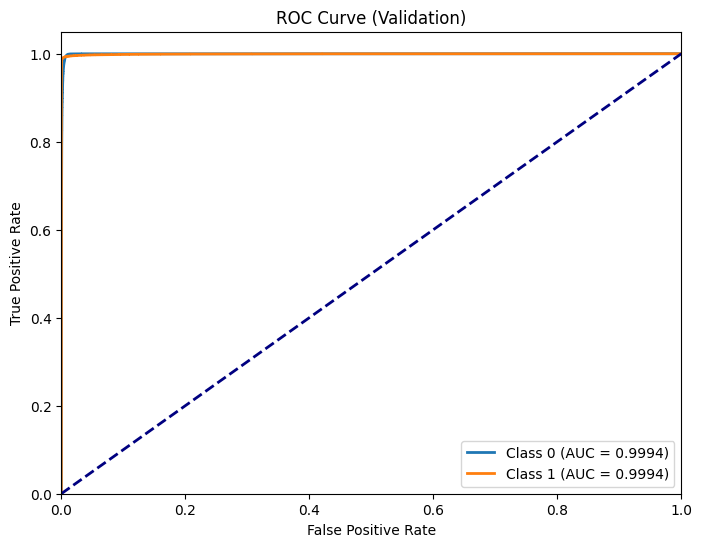

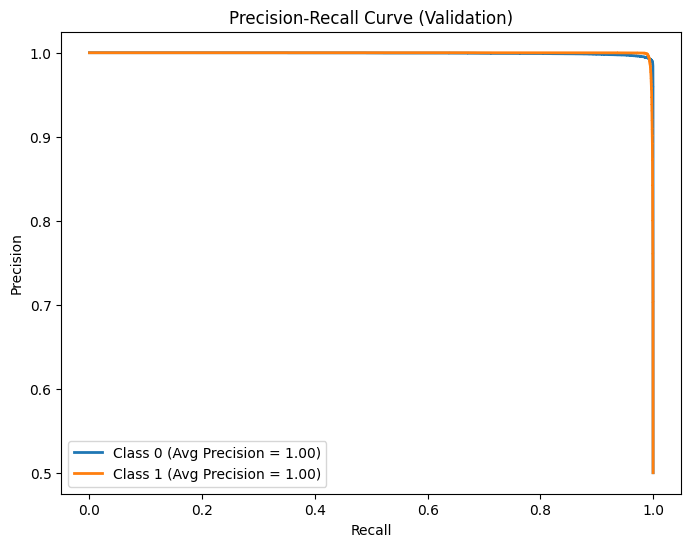

1368/1368 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Test Loss: 0.028424
Test Accuracy: 0.991636
Test F1-Score: 0.918079
Test Precision: 0.866363
Test Recall: 0.988237
Test Evaluation Time: 5.20 seconds
Test Classification Report:
              precision    recall  f1-score   support

           0   0.733080  0.984678  0.840453       979
           1   0.999647  0.991796  0.995706     42782

    accuracy                       0.991636     43761
   macro avg   0.866363  0.988237  0.918079     43761
weighted avg   0.993683  0.991636  0.992232     43761



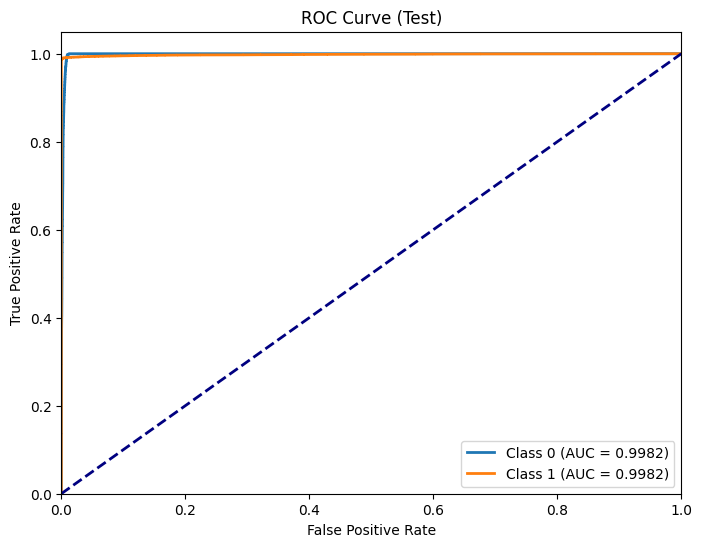

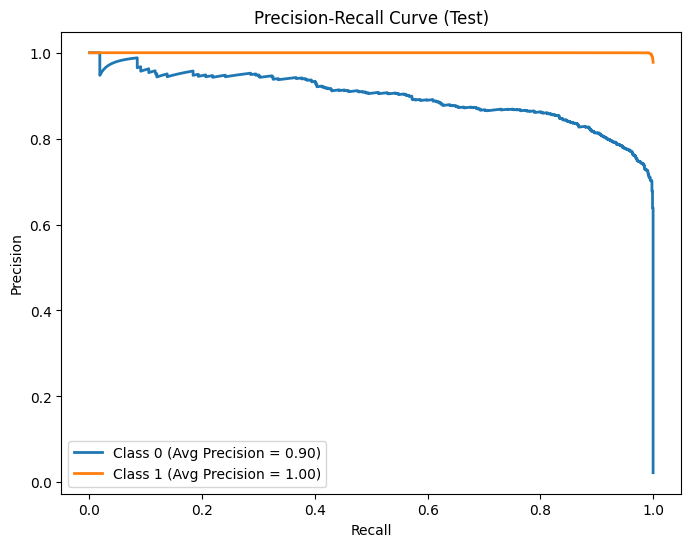

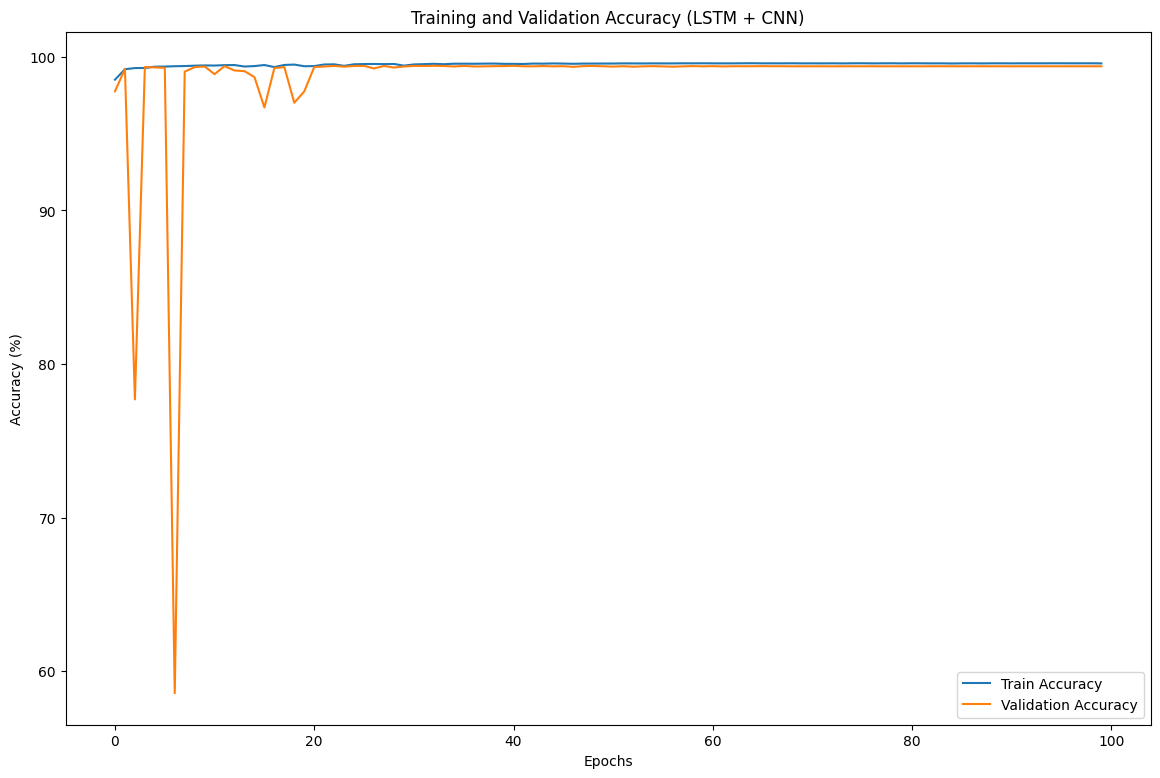

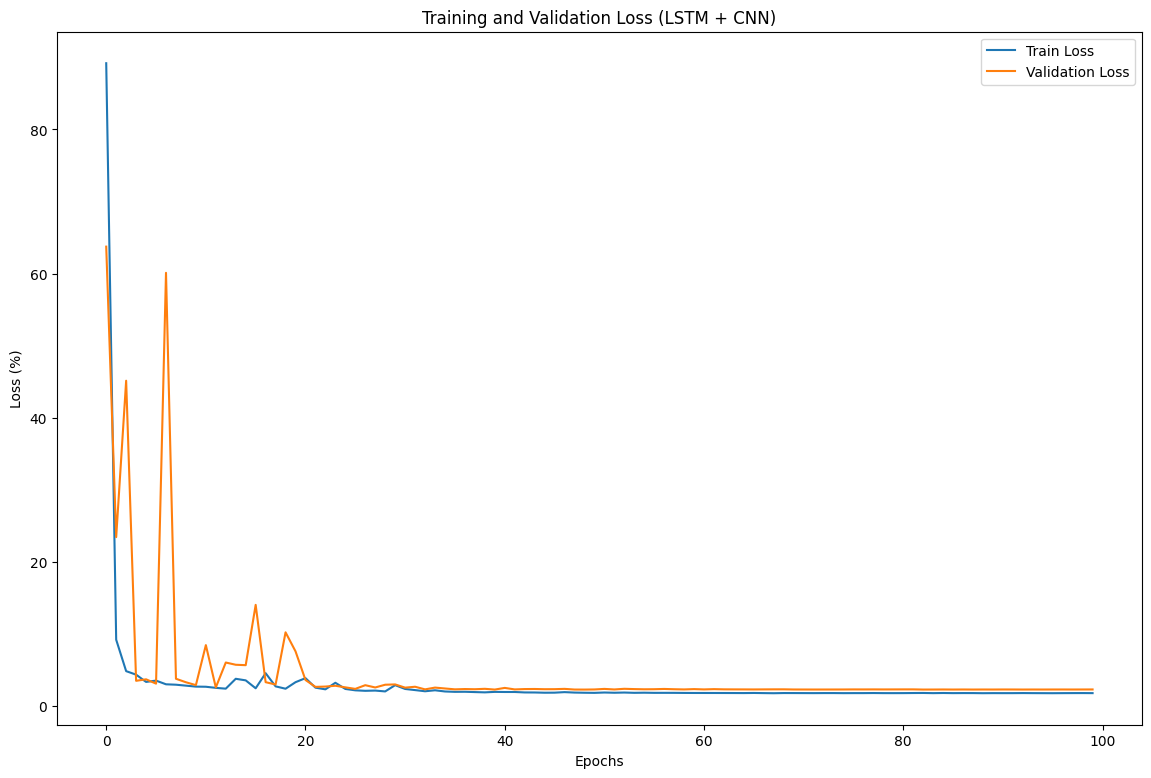

Epoch 1 - Train Loss: 89.18%, Validation Loss: 63.74%, Train Accuracy: 98.51%, Validation Accuracy: 97.75%
Epoch 2 - Train Loss: 9.21%, Validation Loss: 23.44%, Train Accuracy: 99.19%, Validation Accuracy: 99.21%
Epoch 3 - Train Loss: 4.85%, Validation Loss: 45.14%, Train Accuracy: 99.27%, Validation Accuracy: 77.69%
Epoch 4 - Train Loss: 4.37%, Validation Loss: 3.51%, Train Accuracy: 99.27%, Validation Accuracy: 99.33%
Epoch 5 - Train Loss: 3.36%, Validation Loss: 3.72%, Train Accuracy: 99.36%, Validation Accuracy: 99.31%
Epoch 6 - Train Loss: 3.54%, Validation Loss: 3.12%, Train Accuracy: 99.37%, Validation Accuracy: 99.29%
Epoch 7 - Train Loss: 3.03%, Validation Loss: 60.11%, Train Accuracy: 99.39%, Validation Accuracy: 58.56%
Epoch 8 - Train Loss: 2.97%, Validation Loss: 3.80%, Train Accuracy: 99.40%, Validation Accuracy: 99.03%
Epoch 9 - Train Loss: 2.84%, Validation Loss: 3.31%, Train Accuracy: 99.42%, Validation Accuracy: 99.33%
Epoch 10 - Train Loss: 2.71%, Validation Loss: 2.9

In [ ]:

def evaluate_model(model, X, y_one_hot, dataset_name="Validation"):
    start_time = time.time()

    loss, accuracy = model.evaluate(X, y_one_hot, verbose=0)
    evaluation_time = time.time() - start_time

    predictions = model.predict(X)
    true_labels = np.argmax(y_one_hot, axis=1)
    pred_labels = np.argmax(predictions, axis=1)


    val_f1 = f1_score(true_labels, pred_labels, average='macro')
    val_precision = precision_score(true_labels, pred_labels, average='macro')
    val_recall = recall_score(true_labels, pred_labels, average='macro')

    print(f"{dataset_name} Loss: {loss:.6f}")
    print(f"{dataset_name} Accuracy: {accuracy:.6f}")
    print(f"{dataset_name} F1-Score: {val_f1:.6f}")
    print(f"{dataset_name} Precision: {val_precision:.6f}")
    print(f"{dataset_name} Recall: {val_recall:.6f}")
    print(f"{dataset_name} Evaluation Time: {evaluation_time:.2f} seconds")

    target_names = [str(i) for i in range(2)]
    val_classification_report = classification_report(true_labels, pred_labels, target_names=target_names, digits=6)
    print(f"{dataset_name} Classification Report:")
    print(val_classification_report)


    plot_roc_curve(true_labels, predictions, 2, dataset_name)


    plot_precision_recall_curve(true_labels, predictions, 2, dataset_name)


def plot_roc_curve(true_labels, predictions, num_classes, dataset_name):
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(true_labels, predictions[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.4f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({dataset_name})')
    plt.legend(loc="lower right")
    plt.show()


def plot_precision_recall_curve(true_labels, predictions, num_classes, dataset_name):
    precision = {}
    recall = {}
    average_precision = {}

    for i in range(num_classes):
        precision[i], recall[i], _ = precision_recall_curve(true_labels, predictions[:, i], pos_label=i)
        average_precision[i] = average_precision_score(true_labels, predictions[:, i], pos_label=i)

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (Avg Precision = {average_precision[i]:.2f})')

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve ({dataset_name})")
    plt.legend(loc="best")
    plt.show()


evaluate_model(model_lstm_cnn, X_TON_IOT_valid, y_TON_IOT_valid_one_hot, dataset_name="Validation")


y_TON_IOT_test2_one_hot = tf.keras.utils.to_categorical(y_TON_IOT_test2, num_classes=2)
evaluate_model(model_lstm_cnn, X_TON_IOT_test2, y_TON_IOT_test2_one_hot, dataset_name="Test")


plt.figure(figsize=(14, 9))
plt.plot(np.array(history_lstm_cnn.history['accuracy']) * 100, label='Train Accuracy')
plt.plot(np.array(history_lstm_cnn.history['val_accuracy']) * 100, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy (LSTM + CNN)')
plt.legend()
plt.show()

plt.figure(figsize=(14, 9))
plt.plot(np.array(history_lstm_cnn.history['loss']) * 100, label='Train Loss')
plt.plot(np.array(history_lstm_cnn.history['val_loss']) * 100, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (%)')
plt.title('Training and Validation Loss (LSTM + CNN)')
plt.legend()
plt.show()


for epoch, (loss, val_loss, accuracy, val_accuracy) in enumerate(zip(history_lstm_cnn.history['loss'],
                                                                      history_lstm_cnn.history['val_loss'],
                                                                      history_lstm_cnn.history['accuracy'],
                                                                      history_lstm_cnn.history['val_accuracy']), 1):
    print(f"Epoch {epoch} - Train Loss: {loss * 100:.2f}%, Validation Loss: {val_loss * 100:.2f}%, Train Accuracy: {accuracy * 100:.2f}%, Validation Accuracy: {val_accuracy * 100:.2f}%")



In [ ]:
import pickle
## Save the history object of the RNN model
with open('history_lstm_cnn.pkl', 'wb') as file:
    pickle.dump(history_lstm_cnn.history, file)

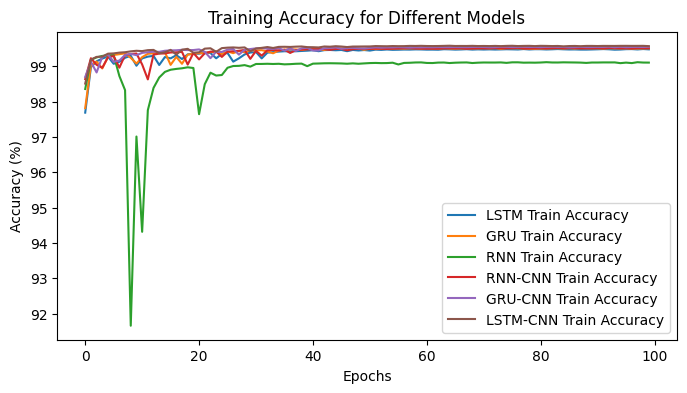

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Load the history objects for different models
with open('history_lstm.pkl', 'rb') as file:
    history_lstm = pickle.load(file)
with open('history_gru.pkl', 'rb') as file:
    history_gru = pickle.load(file)
with open('history_rnn.pkl', 'rb') as file:
    history_rnn = pickle.load(file)
with open('history_rnn_cnn.pkl', 'rb') as file:
    history_rnn_cnn = pickle.load(file)
with open('history_gru_cnn.pkl', 'rb') as file:
    history_gru_cnn = pickle.load(file)
with open('history_lstm_cnn.pkl', 'rb') as file:
    history_lstm_cnn = pickle.load(file)

# Plotting the training accuracy curves
plt.figure(figsize=(8, 4))
plt.plot(np.array(history_lstm['accuracy']) * 100, label='LSTM Train Accuracy')
plt.plot(np.array(history_gru['accuracy']) * 100, label='GRU Train Accuracy')
plt.plot(np.array(history_rnn['accuracy']) * 100, label='RNN Train Accuracy')
plt.plot(np.array(history_rnn_cnn['accuracy']) * 100, label='RNN-CNN Train Accuracy')
plt.plot(np.array(history_gru_cnn['accuracy']) * 100, label='GRU-CNN Train Accuracy')
plt.plot(np.array(history_lstm_cnn['accuracy']) * 100, label='LSTM-CNN Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy for Different Models')
plt.legend()
plt.show()



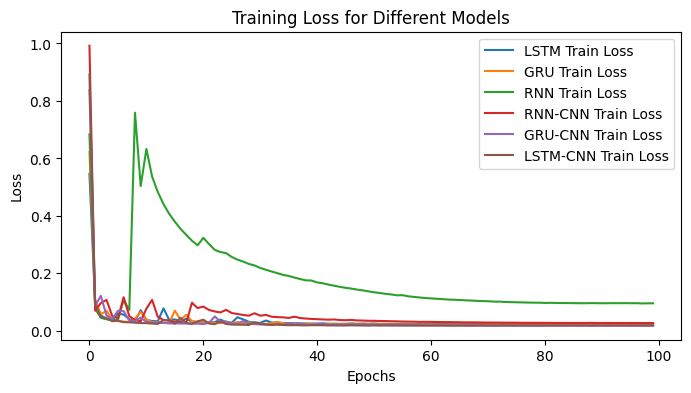

In [ ]:
# Plotting the training loss curves
plt.figure(figsize=(8, 4))
plt.plot(history_lstm['loss'], label='LSTM Train Loss')
plt.plot(history_gru['loss'], label='GRU Train Loss')
plt.plot(history_rnn['loss'], label='RNN Train Loss')
plt.plot(history_rnn_cnn['loss'], label='RNN-CNN Train Loss')
plt.plot(history_gru_cnn['loss'], label='GRU-CNN Train Loss')
plt.plot(history_lstm_cnn['loss'], label='LSTM-CNN Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss for Different Models')
plt.legend()
plt.show()



#***XIIOTID***

In [ ]:
# Load the dataset with low_memory=False to suppress the warning
df_Edge_IIoTset = pd.read_csv('/content/drive/MyDrive/X-IIoTID dataset.csv', low_memory=False)

# Print the shape of the DataFrame
shape = df_Edge_IIoTset.shape
print(shape)


(820834, 68)


In [ ]:
df_Edge_IIoTset.head()

Date   Timestamp         Scr_IP Scr_port        Des_IP Des_port  \
0   9/01/2020  1578540956  192.168.2.199    49278  192.168.2.10       80   
1  13/01/2020  1578871873       10.0.1.5    39769  131.236.3.92       53   
2   9/01/2020  1578522486    172.24.1.80    59050    172.24.1.1       53   
3  27/02/2020  1582757640  192.168.2.196    37966  192.168.2.10     1880   
4  16/12/2019  1576452612    172.24.1.80    38233    172.24.1.1       53   

  Protocol    Service  Duration Scr_bytes  ... OSSEC_alert_level  \
0      tcp       http   0.67369     13437  ...                 5   
1      udp        dns  0.000083        78  ...                 0   
2      udp        dns  0.000132        38  ...                 0   
3      tcp  websocket  9.378481      1121  ...                 0   
4      udp        dns  0.000074         -  ...                 0   

   Login_attempt Succesful_login  File_activity  Process_activity  \
0              0               0              0                 0   
1              0               0              0                 0   
2              0               0              0                 0   
3              1               1              1                 1   
4              0               0              0                 0   

   read_write_physical.process  is_privileged                  class1  \
0                            0              0  Scanning_vulnerability   
1                            0              0                  Normal   
2                            0              0                  Normal   
3                            1              1                  Normal   
4                            0              0                  Normal   

           class2  class3  
0  Reconnaissance  Attack  
1          Normal  Normal  
2          Normal  Normal  
3          Normal  Normal  
4          Normal  Normal  

[5 rows x 68 columns]

In [ ]:
df_Edge_IIoTset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820834 entries, 0 to 820833
Data columns (total 68 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Date                         820503 non-null  object
 1   Timestamp                    820537 non-null  object
 2   Scr_IP                       820834 non-null  object
 3   Scr_port                     820834 non-null  object
 4   Des_IP                       820834 non-null  object
 5   Des_port                     820834 non-null  object
 6   Protocol                     820834 non-null  object
 7   Service                      820834 non-null  object
 8   Duration                     820834 non-null  object
 9   Scr_bytes                    820834 non-null  object
 10  Des_bytes                    820834 non-null  object
 11  Conn_state                   820834 non-null  int64 
 12  missed_bytes                 820834 non-null  object
 13  is_syn_only   

In [ ]:
df_Edge_IIoTset.head()
print('Dataframe shape: ', shape)
print('Number of rows: ', shape[0])
print('Number of columns: ', shape[1])
#df.shape

Dataframe shape:  (820834, 68)
Number of rows:  820834
Number of columns:  68


In [ ]:


df_Edge_IIoTset.isnull().sum()

Date                           331
Timestamp                      297
Scr_IP                           0
Scr_port                         0
Des_IP                           0
                              ... 
read_write_physical.process      0
is_privileged                    0
class1                           0
class2                           0
class3                           0
Length: 68, dtype: int64

In [ ]:
import pandas as pd

# Adjust display settings to show all columns
pd.set_option('display.max_rows', None)

# Count the number of null values in each column
null_counts = df_Edge_IIoTset.isnull().sum()

# Print the null counts for each column
print(null_counts)

# Reset the display settings if needed
pd.reset_option('display.max_rows')



Date                           331
Timestamp                      297
Scr_IP                           0
Scr_port                         0
Des_IP                           0
Des_port                         0
Protocol                         0
Service                          0
Duration                         0
Scr_bytes                        0
Des_bytes                        0
Conn_state                       0
missed_bytes                     0
is_syn_only                      0
Is_SYN_ACK                       0
is_pure_ack                      0
is_with_payload                  0
FIN or RST                       0
Bad_checksum                     0
is_SYN_with_RST                  0
Scr_pkts                         0
Scr_ip_bytes                     0
Des_pkts                         0
Des_ip_bytes                     0
anomaly_alert                    0
total_bytes                      0
total_packet                     0
paket_rate                       0
byte_rate           

In [ ]:
df_Edge_IIoTset[df_Edge_IIoTset.duplicated()].shape

(6222, 68)

In [ ]:
# Display the duplicate rows
duplicate_rows = df_Edge_IIoTset[df_Edge_IIoTset.duplicated()]
print(duplicate_rows)


              Date   Timestamp          Scr_IP Scr_port         Des_IP  \
5591    21/01/2020  1579585116  192.168.10.155    50192   192.168.2.10   
5630    22/01/2020  1579642499        10.0.1.5    47366   129.94.0.197   
14297   22/01/2020  1579646142    172.24.1.213    51975     172.24.1.1   
15801   10/02/2020  1580966999    172.24.1.100     5353    224.0.0.251   
17484   21/01/2020  1579571748  192.168.10.155    44790   192.168.2.10   
...            ...         ...             ...      ...            ...   
820582  21/01/2020  1579570754    192.168.2.10    56610  192.168.2.199   
820623  21/01/2020  1579572659  192.168.10.153    53437   192.168.2.10   
820641  21/01/2020  1579572094    192.168.2.10    33124  192.168.2.199   
820771  21/01/2020  1579570246    192.168.2.10    54714  192.168.2.199   
820823  21/01/2020  1579586256   192.168.2.196    45356   192.168.2.10   

       Des_port Protocol    Service  Duration Scr_bytes  ...  \
5591         80      tcp       http  2.412449  

In [ ]:
# Remove duplicate rows and keep the first occurrence
df_Edge_IIoTset_cleaned = df_Edge_IIoTset.drop_duplicates()

In [ ]:

df_Edge_IIoTset_cleaned[df_Edge_IIoTset_cleaned.duplicated()].shape

(0, 68)

In [ ]:
df_Edge_IIoTset_cleaned.shape

(814612, 68)

In [ ]:
df_Edge_IIoTset_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 814612 entries, 0 to 820833
Data columns (total 68 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Date                         814281 non-null  object
 1   Timestamp                    814315 non-null  object
 2   Scr_IP                       814612 non-null  object
 3   Scr_port                     814612 non-null  object
 4   Des_IP                       814612 non-null  object
 5   Des_port                     814612 non-null  object
 6   Protocol                     814612 non-null  object
 7   Service                      814612 non-null  object
 8   Duration                     814612 non-null  object
 9   Scr_bytes                    814612 non-null  object
 10  Des_bytes                    814612 non-null  object
 11  Conn_state                   814612 non-null  int64 
 12  missed_bytes                 814612 non-null  object
 13  is_syn_only        

In [ ]:
df_Edge_IIoTset_cleaned.shape

(814612, 68)

In [ ]:
df_Edge_IIoTset_cleaned = df_Edge_IIoTset_cleaned.drop('class1', axis = 1)

In [ ]:
df_Edge_IIoTset_cleaned = df_Edge_IIoTset_cleaned.drop('class2', axis = 1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['Date', 'Timestamp', 'Scr_IP', 'Scr_port', 'Des_IP', 'Des_port', 'Protocol', 'Service', 'Duration', 'Scr_bytes', 'Des_bytes', 'missed_bytes', 'Scr_pkts', 'Scr_ip_bytes', 'Des_pkts', 'Des_ip_bytes', 'anomaly_alert', 'total_bytes', 'total_packet', 'paket_rate', 'byte_rate', 'Scr_packts_ratio', 'Des_pkts_ratio', 'Scr_bytes_ratio', 'Des_bytes_ratio', 'Avg_user_time', 'Std_user_time', 'Avg_nice_time', 'Std_nice_time', 'Avg_system_time', 'Std_system_time', 'Avg_iowait_time', 'Std_iowait_time', 'Avg_ideal_time', 'Std_ideal_time', 'Avg_tps', 'Std_tps', 'Avg_rtps', 'Std_rtps', 'Avg_wtps', 'Std_wtps', 'Avg_ldavg_1', 'Std_ldavg_1', 'Avg_kbmemused', 'Std_kbmemused', 'Avg_num_Proc/s', 'Std_num_proc/s', 'Avg_num_cswch/s', 'std_num_cswch/s']

for column in columns_to_encode:
    le = LabelEncoder()
    df_Edge_IIoTset_cleaned[column] = le.fit_transform(df_Edge_IIoTset_cleaned[column])
df_Edge_IIoTset_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 814612 entries, 0 to 820833
Data columns (total 66 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Date                         814612 non-null  int64 
 1   Timestamp                    814612 non-null  int64 
 2   Scr_IP                       814612 non-null  int64 
 3   Scr_port                     814612 non-null  int64 
 4   Des_IP                       814612 non-null  int64 
 5   Des_port                     814612 non-null  int64 
 6   Protocol                     814612 non-null  int64 
 7   Service                      814612 non-null  int64 
 8   Duration                     814612 non-null  int64 
 9   Scr_bytes                    814612 non-null  int64 
 10  Des_bytes                    814612 non-null  int64 
 11  Conn_state                   814612 non-null  int64 
 12  missed_bytes                 814612 non-null  int64 
 13  is_syn_only        

In [ ]:
df_Edge_IIoTset_cleaned.head()

Date  Timestamp  Scr_IP  Scr_port  Des_IP  Des_port  Protocol  Service  \
0    47      30649      25     37284      63      6020         2        4   
1     5      36769       2     27007      12      4973         3        2   
2    47      24817      16     47837      51      4973         3        2   
3    32     182036      24     25062      63      1192         2       16   
4    11       3824      16     25352      51      4973         3        2   

   Duration  Scr_bytes  ...  std_num_cswch/s  OSSEC_alert  OSSEC_alert_level  \
0     88457       2112  ...             4088            1                  5   
1        83      19237  ...            17287            0                  0   
2       132      12458  ...            26013            0                  0   
3    324051        779  ...            46137            0                  0   
4        74          0  ...            34894            0                  0   

   Login_attempt  Succesful_login  File_activity  Process_activity  \
0              0                0              0                 0   
1              0                0              0                 0   
2              0                0              0                 0   
3              1                1              1                 1   
4              0                0              0                 0   

   read_write_physical.process  is_privileged  class3  
0                            0              0  Attack  
1                            0              0  Normal  
2                            0              0  Normal  
3                            1              1  Normal  
4                            0              0  Normal  

[5 rows x 66 columns]

In [ ]:
df = df_Edge_IIoTset_cleaned

In [ ]:





print(df_Edge_IIoTset_cleaned.groupby("class3").size())

class3
Attack    396359
Normal    418253
dtype: int64


In [ ]:
df['class3'] = df['class3'].replace({'Normal': 0, 'Attack': 1})


In [ ]:
print(df_Edge_IIoTset_cleaned.groupby("class3").size())

class3
0    418253
1    396359
dtype: int64


In [ ]:
X_TON_IOT = df_Edge_IIoTset_cleaned.drop('class3', axis = 1)
y_TON_IOT = df_Edge_IIoTset_cleaned['class3']
X_TON_IOT.shape, y_TON_IOT.shape

((814612, 65), (814612,))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
X_TON_IOT_train, X_TON_IOT_test,y_TON_IOT_train, y_TON_IOT_test = train_test_split(X_TON_IOT, y_TON_IOT, test_size=0.4, random_state = 1337
)
X_TON_IOT_valid, X_TON_IOT_test2,y_TON_IOT_valid, y_TON_IOT_test2 = train_test_split(X_TON_IOT_test, y_TON_IOT_test, test_size=0.5, random_state = 1337
)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Perform random sampling
rus = RandomUnderSampler(random_state=42)
# Application de SMOTE-TOMEK pour équilibrer les classes
X_TON_IOT_train, y_TON_IOT_train = rus.fit_resample(X_TON_IOT_train, y_TON_IOT_train)


In [ ]:
from imblearn.combine import SMOTETomek
# Application de SMOTE-TOMEK pour équilibrer les classs
X_TON_IOT_valid, y_TON_IOT_valid = rus.fit_resample(X_TON_IOT_valid, y_TON_IOT_valid)


In [ ]:
y_TON_IOT_train.value_counts()

class3
0    238119
1    238119
Name: count, dtype: int64

In [ ]:

from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
X_TON_IOT_train = scaling.fit_transform(X_TON_IOT_train)
X_TON_IOT_valid = scaling.transform(X_TON_IOT_valid)
X_TON_IOT_test2 = scaling.transform(X_TON_IOT_test2)

In [ ]:
#For CNN and CNN-LSTM
print(X_TON_IOT_train.shape)
X_TON_IOT_train = X_TON_IOT_train.reshape(X_TON_IOT_train.shape[0], X_TON_IOT_train.shape[1], 1)
X_TON_IOT_valid = X_TON_IOT_valid.reshape(X_TON_IOT_valid.shape[0], X_TON_IOT_valid.shape[1], 1)
X_TON_IOT_test2 = X_TON_IOT_test2.reshape(X_TON_IOT_test2.shape[0], X_TON_IOT_test2.shape[1], 1)
print(X_TON_IOT_train.shape)

(476238, 65)
(476238, 65, 1)


In [ ]:


from tensorflow.keras.utils import to_categorical


y_TON_IOT_train_one_hot = to_categorical(y_TON_IOT_train, num_classes=2)
y_TON_IOT_valid_one_hot = to_categorical(y_TON_IOT_valid, num_classes=2)

# ***RNN***

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, precision_score, recall_score
import seaborn as sns


def scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)  # Ensure it returns a float
    else:
        return float(lr * tf.math.exp(-0.1))  # Ensure it returns a float

lr_scheduler = LearningRateScheduler(scheduler)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# RNN Model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(128, activation='tanh', return_sequences=True, input_shape=X_TON_IOT_train.shape[1:], kernel_regularizer=l2(0.01)))
model_rnn.add(BatchNormalization())
model_rnn.add(Dropout(0.5))
model_rnn.add(SimpleRNN(256, activation='tanh', kernel_regularizer=l2(0.01)))
model_rnn.add(BatchNormalization())
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(2, activation='softmax'))

model_rnn.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()

history_rnn = model_rnn.fit(X_TON_IOT_train, y_TON_IOT_train_one_hot, epochs=100, batch_size=1024,
                            validation_data=(X_TON_IOT_valid, y_TON_IOT_valid_one_hot),
                            callbacks=[lr_scheduler], verbose=1)
end_time = time.time()
training_time = end_time - start_time

 # training_time
print(f"Le temps d'entraînement du modèle SimpleRNN est de {training_time:.2f} secondes.")

Epoch 1/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 86s 54ms/step - accuracy: 0.8927 - loss: 1.0756 - val_accuracy: 0.9819 - val_loss: 0.0810 - learning_rate: 0.0010
Epoch 2/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.9716 - loss: 0.1102 - val_accuracy: 0.9941 - val_loss: 0.0395 - learning_rate: 0.0010
Epoch 3/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.9947 - loss: 0.0347 - val_accuracy: 0.9944 - val_loss: 0.0336 - learning_rate: 0.0010
Epoch 4/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9948 - loss: 0.0313 - val_accuracy: 0.9976 - val_loss: 0.0203 - learning_rate: 0.0010
Epoch 5/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.9963 - loss: 0.0253 - val_accuracy: 0.9935 - val_loss: 0.0329 - learning_rate: 0.0010
Epoch 6/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9963 - loss: 0.0234 - val_accuracy: 0.9984 - val_loss: 0.0215 - learning_rate: 0.0010
Epoch 7/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.9

In [ ]:
import pickle

with open('history_rnn.pkl', 'wb') as file:
    pickle.dump(history_rnn.history, file)

4946/4946 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step
Validation Loss: 0.002792
Validation Accuracy: 0.999829
Validation F1-Score: 0.999829
Validation Precision: 0.999829
Validation Recall: 0.999829
Validation Evaluation Time: 25.41 seconds
Validation Classification Report:
              precision    recall  f1-score   support

           0   0.999886  0.999773  0.999829     79129
           1   0.999773  0.999886  0.999829     79129

    accuracy                       0.999829    158258
   macro avg   0.999829  0.999829  0.999829    158258
weighted avg   0.999829  0.999829  0.999829    158258



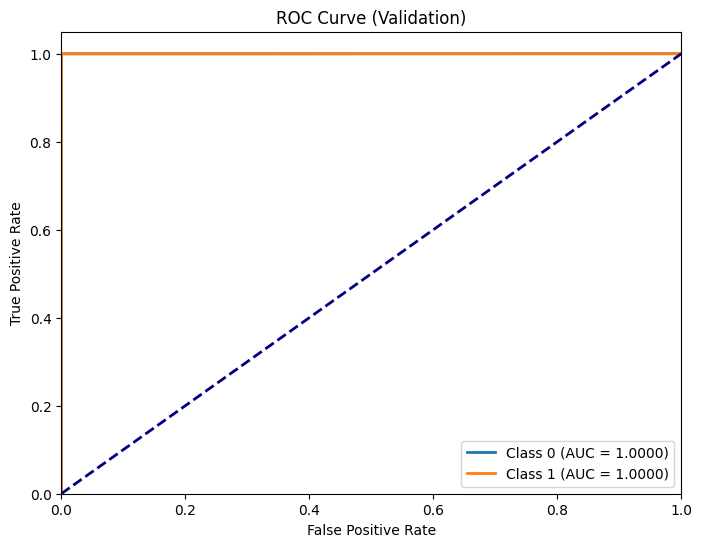

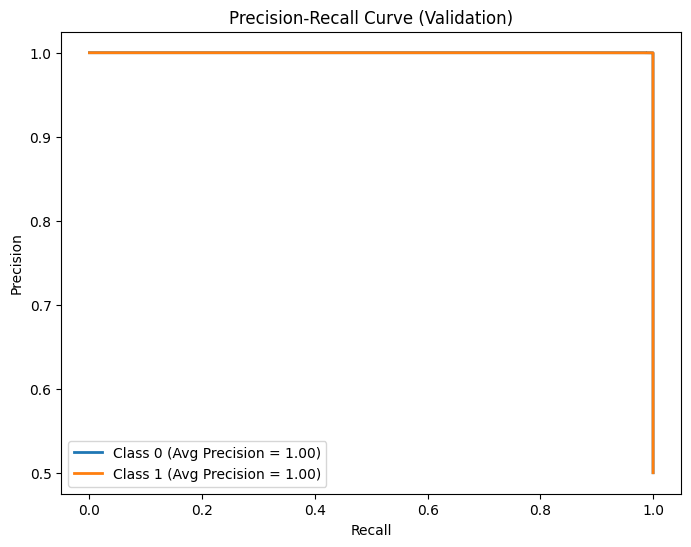

5092/5092 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step
Test Loss: 0.002718
Test Accuracy: 0.999834
Test F1-Score: 0.999834
Test Precision: 0.999833
Test Recall: 0.999835
Test Evaluation Time: 41.16 seconds
Test Classification Report:
              precision    recall  f1-score   support

           0   0.999869  0.999809  0.999839     83812
           1   0.999798  0.999861  0.999829     79111

    accuracy                       0.999834    162923
   macro avg   0.999833  0.999835  0.999834    162923
weighted avg   0.999834  0.999834  0.999834    162923



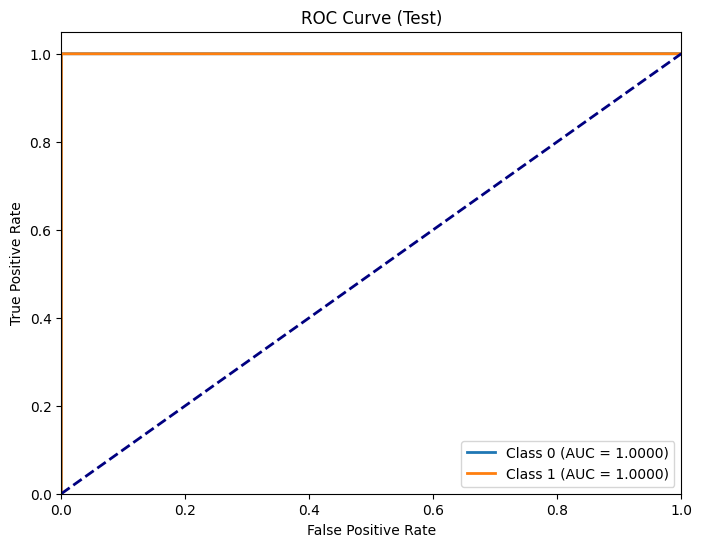

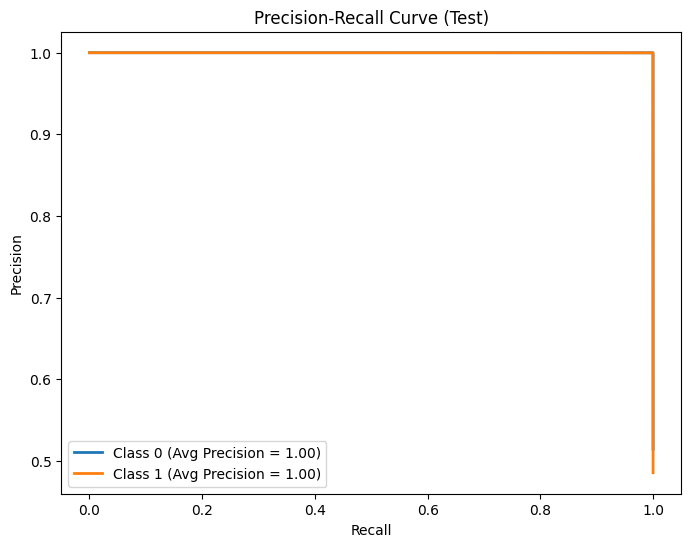

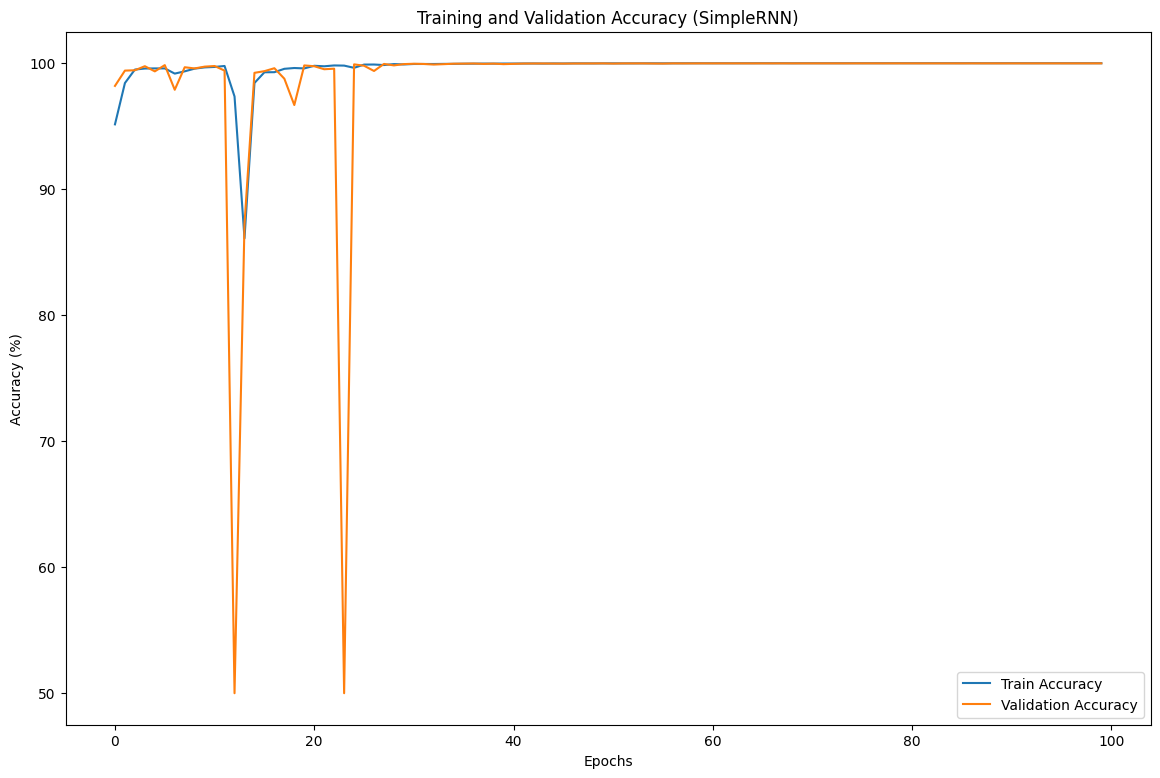

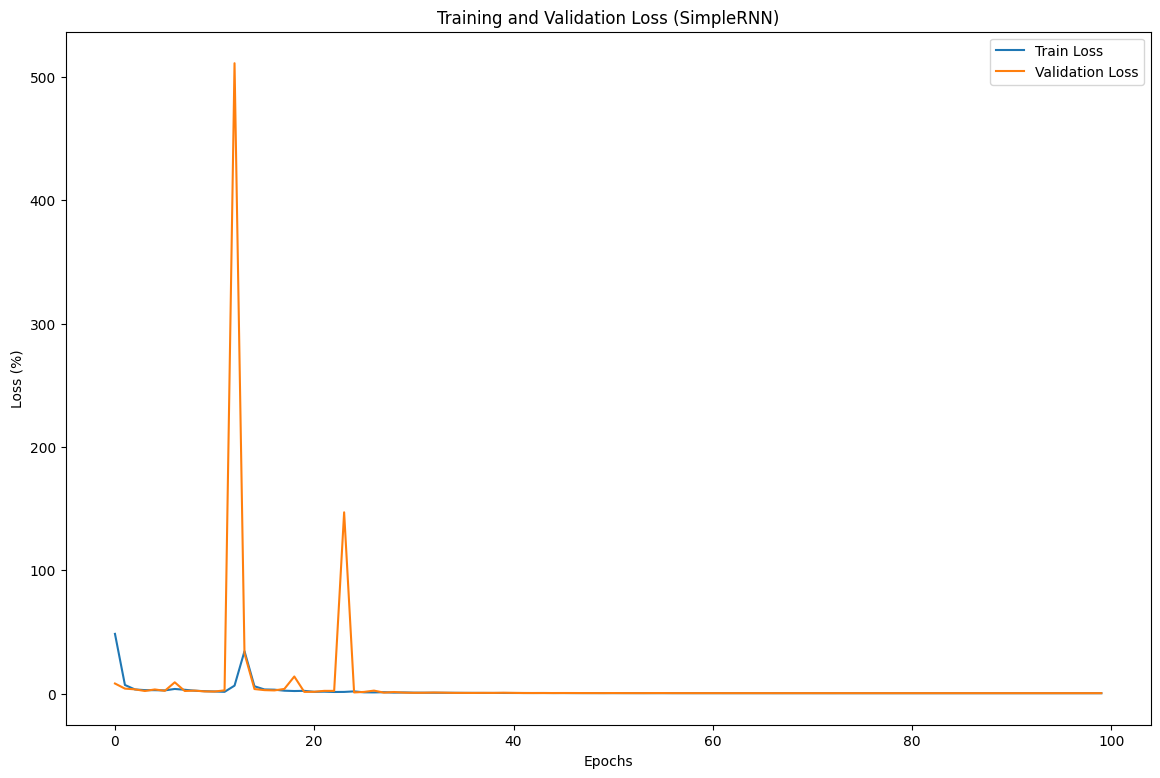

Epoch 1 - Train Loss: 48.35%, Validation Loss: 8.10%, Train Accuracy: 95.14%, Validation Accuracy: 98.19%
Epoch 2 - Train Loss: 6.90%, Validation Loss: 3.95%, Train Accuracy: 98.42%, Validation Accuracy: 99.41%
Epoch 3 - Train Loss: 3.29%, Validation Loss: 3.36%, Train Accuracy: 99.49%, Validation Accuracy: 99.44%
Epoch 4 - Train Loss: 2.74%, Validation Loss: 2.03%, Train Accuracy: 99.57%, Validation Accuracy: 99.76%
Epoch 5 - Train Loss: 2.68%, Validation Loss: 3.29%, Train Accuracy: 99.58%, Validation Accuracy: 99.35%
Epoch 6 - Train Loss: 2.52%, Validation Loss: 2.15%, Train Accuracy: 99.58%, Validation Accuracy: 99.84%
Epoch 7 - Train Loss: 3.68%, Validation Loss: 9.08%, Train Accuracy: 99.17%, Validation Accuracy: 97.89%
Epoch 8 - Train Loss: 3.02%, Validation Loss: 2.04%, Train Accuracy: 99.35%, Validation Accuracy: 99.67%
Epoch 9 - Train Loss: 2.28%, Validation Loss: 2.34%, Train Accuracy: 99.56%, Validation Accuracy: 99.58%
Epoch 10 - Train Loss: 1.85%, Validation Loss: 1.69%, 

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score, average_precision_score # Import average_precision_score
import seaborn as sns
import time

def evaluate_model(model, X, y_one_hot, dataset_name="Validation"):
    start_time = time.time()

    loss, accuracy = model.evaluate(X, y_one_hot, verbose=0)
    evaluation_time = time.time() - start_time

    predictions = model.predict(X)
    true_labels = np.argmax(y_one_hot, axis=1)
    pred_labels = np.argmax(predictions, axis=1)


    val_f1 = f1_score(true_labels, pred_labels, average='macro')
    val_precision = precision_score(true_labels, pred_labels, average='macro')
    val_recall = recall_score(true_labels, pred_labels, average='macro')

    print(f"{dataset_name} Loss: {loss:.6f}")
    print(f"{dataset_name} Accuracy: {accuracy:.6f}")
    print(f"{dataset_name} F1-Score: {val_f1:.6f}")
    print(f"{dataset_name} Precision: {val_precision:.6f}")
    print(f"{dataset_name} Recall: {val_recall:.6f}")
    print(f"{dataset_name} Evaluation Time: {evaluation_time:.2f} seconds")

    target_names = [str(i) for i in range(2)]
    val_classification_report = classification_report(true_labels, pred_labels, target_names=target_names, digits=6)
    print(f"{dataset_name} Classification Report:")
    print(val_classification_report)


    plot_roc_curve(true_labels, predictions, 2, dataset_name)

    plot_precision_recall_curve(true_labels, predictions, 2, dataset_name)


def plot_roc_curve(true_labels, predictions, num_classes, dataset_name):
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(true_labels, predictions[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.4f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({dataset_name})')
    plt.legend(loc="lower right")
    plt.show()


def plot_precision_recall_curve(true_labels, predictions, num_classes, dataset_name):
    precision = {}
    recall = {}
    average_precision = {}

    for i in range(num_classes):
        precision[i], recall[i], _ = precision_recall_curve(true_labels, predictions[:, i], pos_label=i)
        average_precision[i] = average_precision_score(true_labels, predictions[:, i], pos_label=i)

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (Avg Precision = {average_precision[i]:.2f})')

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve ({dataset_name})")
    plt.legend(loc="best")
    plt.show()


evaluate_model(model_rnn, X_TON_IOT_valid, y_TON_IOT_valid_one_hot, dataset_name="Validation")

y_TON_IOT_test2_one_hot = tf.keras.utils.to_categorical(y_TON_IOT_test2, num_classes=2)
evaluate_model(model_rnn, X_TON_IOT_test2, y_TON_IOT_test2_one_hot, dataset_name="Test")


plt.figure(figsize=(14, 9))
plt.plot(np.array(history_rnn.history['accuracy']) * 100, label='Train Accuracy')
plt.plot(np.array(history_rnn.history['val_accuracy']) * 100, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy (SimpleRNN)')
plt.legend()
plt.show()

plt.figure(figsize=(14, 9))
plt.plot(np.array(history_rnn.history['loss']) * 100, label='Train Loss')
plt.plot(np.array(history_rnn.history['val_loss']) * 100, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (%)')
plt.title('Training and Validation Loss (SimpleRNN)')
plt.legend()
plt.show()


for epoch, (loss, val_loss, accuracy, val_accuracy) in enumerate(zip(history_rnn.history['loss'],
                                                                      history_rnn.history['val_loss'],
                                                                      history_rnn.history['accuracy'],
                                                                      history_rnn.history['val_accuracy']), 1):
    print(f"Epoch {epoch} - Train Loss: {loss * 100:.2f}%, Validation Loss: {val_loss * 100:.2f}%, Train Accuracy: {accuracy * 100:.2f}%, Validation Accuracy: {val_accuracy * 100:.2f}%")

# **GRU**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, precision_score, recall_score
import seaborn as sns
import time
import numpy as np


def scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)  # Ensure it returns a float
    else:
        return float(lr * tf.math.exp(-0.1))  # Ensure it returns a float

lr_scheduler = LearningRateScheduler(scheduler)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# GRU Model
model_gru = Sequential()
model_gru.add(GRU(128, activation='tanh', return_sequences=True, input_shape=X_TON_IOT_train.shape[1:], kernel_regularizer=l2(0.01)))
model_gru.add(BatchNormalization())
model_gru.add(Dropout(0.5))
model_gru.add(GRU(256, activation='tanh', kernel_regularizer=l2(0.01)))
model_gru.add(BatchNormalization())
model_gru.add(Dropout(0.5))
model_gru.add(Dense(2, activation='softmax'))

model_gru.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()

history_gru = model_gru.fit(X_TON_IOT_train, y_TON_IOT_train_one_hot, epochs=100, batch_size=1024,
                            validation_data=(X_TON_IOT_valid, y_TON_IOT_valid_one_hot),
                            callbacks=[lr_scheduler], verbose=1)
end_time = time.time()
training_time = end_time - start_time

 # training_time
print(f"Le temps d'entraînement du modèle GRU est de {training_time:.2f} secondes.")

Epoch 1/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 42s 85ms/step - accuracy: 0.6662 - loss: 1.3680 - val_accuracy: 0.8109 - val_loss: 0.6444 - learning_rate: 0.0010
Epoch 2/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 41s 85ms/step - accuracy: 0.9891 - loss: 0.0795 - val_accuracy: 0.9903 - val_loss: 0.0556 - learning_rate: 0.0010
Epoch 3/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 40s 83ms/step - accuracy: 0.9941 - loss: 0.0429 - val_accuracy: 0.9964 - val_loss: 0.0286 - learning_rate: 0.0010
Epoch 4/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 41s 83ms/step - accuracy: 0.9955 - loss: 0.0320 - val_accuracy: 0.9960 - val_loss: 0.0249 - learning_rate: 0.0010
Epoch 5/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 42s 86ms/step - accuracy: 0.9964 - loss: 0.0258 - val_accuracy: 0.9894 - val_loss: 0.0513 - learning_rate: 0.0010
Epoch 6/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 40s 83ms/step - accuracy: 0.9970 - loss: 0.0244 - val_accuracy: 0.9981 - val_loss: 0.0198 - learning_rate: 0.0010
Epoch 7/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 41s 82ms/step - accuracy: 0.9

In [ ]:
import pickle

with open('history_gru.pkl', 'wb') as file:
    pickle.dump(history_gru.history, file)

4946/4946 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step
Validation Loss: 0.001707
Validation Accuracy: 0.999747
Validation F1-Score: 0.999747
Validation Precision: 0.999747
Validation Recall: 0.999747
Validation Evaluation Time: 41.13 seconds
Validation Classification Report:
              precision    recall  f1-score   support

           0   0.999747  0.999747  0.999747     79129
           1   0.999747  0.999747  0.999747     79129

    accuracy                       0.999747    158258
   macro avg   0.999747  0.999747  0.999747    158258
weighted avg   0.999747  0.999747  0.999747    158258



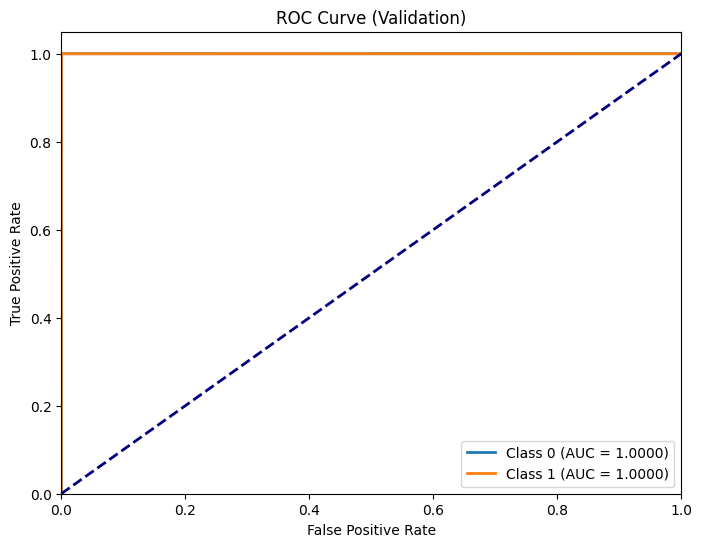

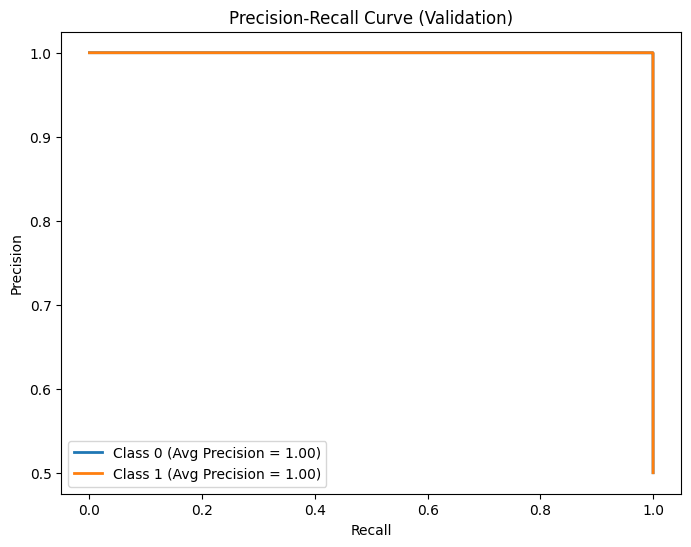

5092/5092 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step
Test Loss: 0.001698
Test Accuracy: 0.999718
Test F1-Score: 0.999717
Test Precision: 0.999718
Test Recall: 0.999717
Test Evaluation Time: 21.06 seconds
Test Classification Report:
              precision    recall  f1-score   support

           0   0.999702  0.999749  0.999726     83812
           1   0.999735  0.999684  0.999709     79111

    accuracy                       0.999718    162923
   macro avg   0.999718  0.999717  0.999717    162923
weighted avg   0.999718  0.999718  0.999718    162923



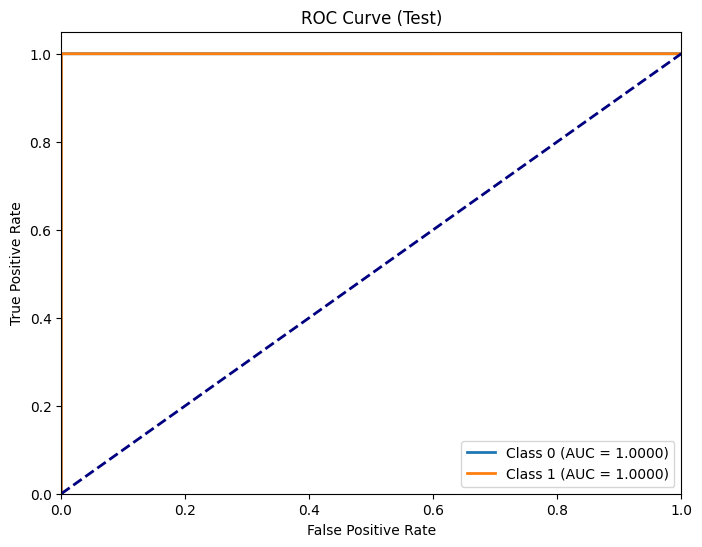

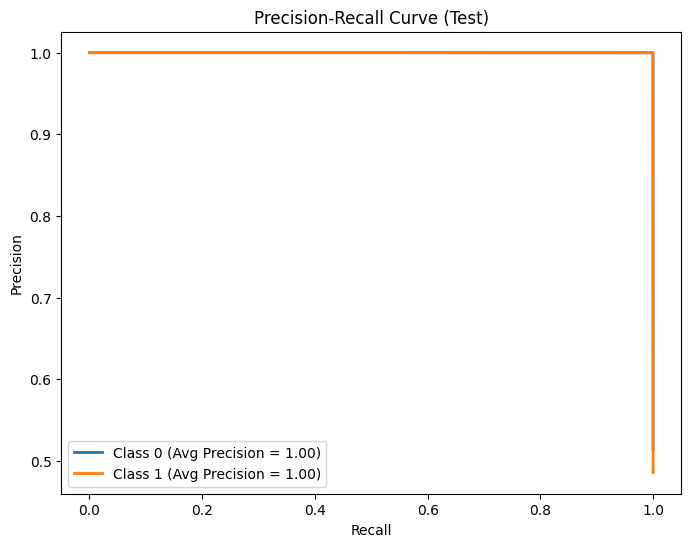

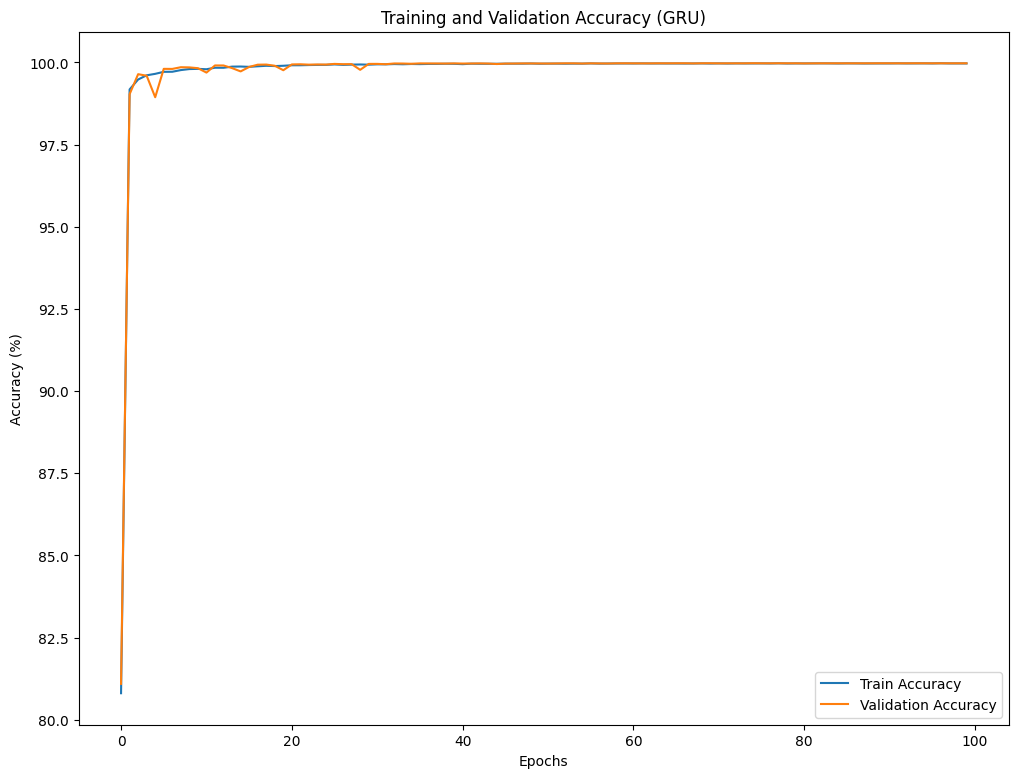

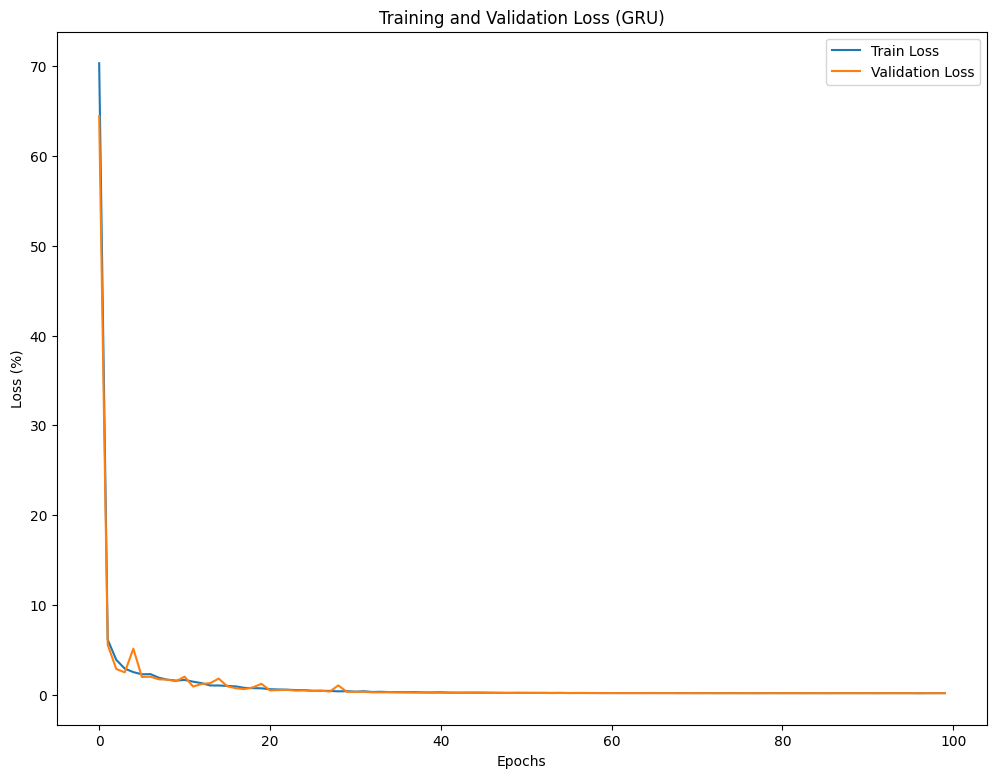

Epoch 1 - Train Loss: 70.33%, Validation Loss: 64.44%, Train Accuracy: 80.81%, Validation Accuracy: 81.09%
Epoch 2 - Train Loss: 6.13%, Validation Loss: 5.56%, Train Accuracy: 99.18%, Validation Accuracy: 99.03%
Epoch 3 - Train Loss: 3.88%, Validation Loss: 2.86%, Train Accuracy: 99.48%, Validation Accuracy: 99.64%
Epoch 4 - Train Loss: 2.90%, Validation Loss: 2.49%, Train Accuracy: 99.61%, Validation Accuracy: 99.60%
Epoch 5 - Train Loss: 2.52%, Validation Loss: 5.13%, Train Accuracy: 99.65%, Validation Accuracy: 98.94%
Epoch 6 - Train Loss: 2.27%, Validation Loss: 1.98%, Train Accuracy: 99.71%, Validation Accuracy: 99.81%
Epoch 7 - Train Loss: 2.29%, Validation Loss: 2.01%, Train Accuracy: 99.72%, Validation Accuracy: 99.80%
Epoch 8 - Train Loss: 1.89%, Validation Loss: 1.71%, Train Accuracy: 99.77%, Validation Accuracy: 99.85%
Epoch 9 - Train Loss: 1.67%, Validation Loss: 1.68%, Train Accuracy: 99.80%, Validation Accuracy: 99.85%
Epoch 10 - Train Loss: 1.57%, Validation Loss: 1.50%,

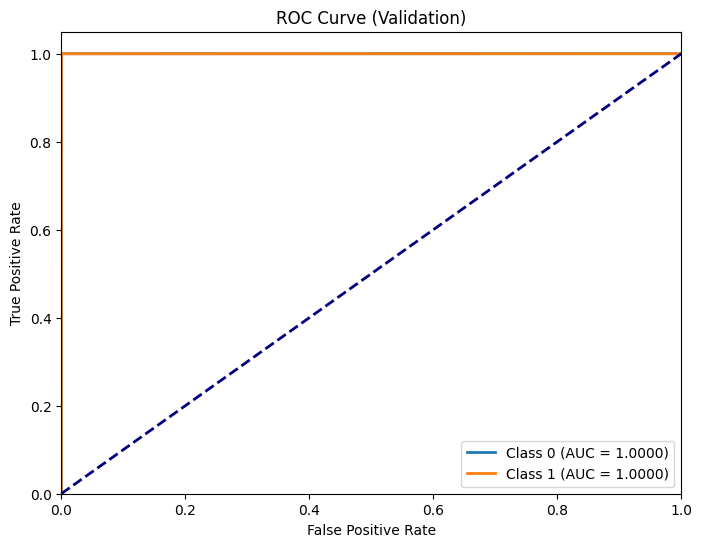

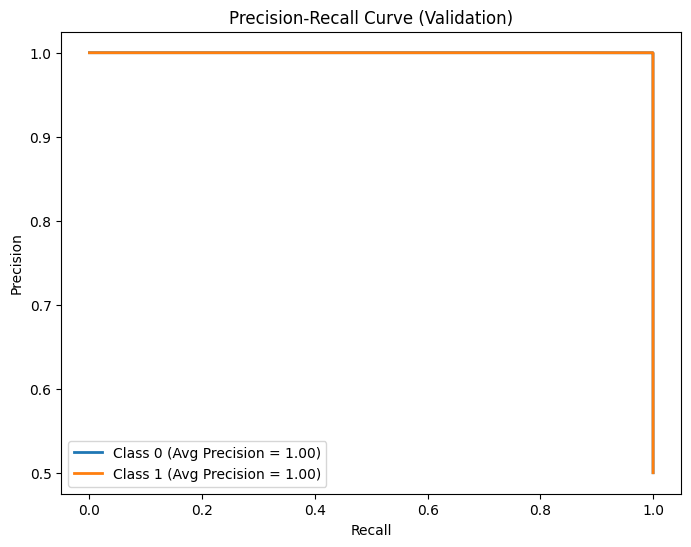

5092/5092 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step
Test Loss: 0.001698
Test Accuracy: 0.999718
Test F1-Score: 0.999717
Test Precision: 0.999718
Test Recall: 0.999717
Test Evaluation Time: 20.79 seconds
Test Classification Report:
              precision    recall  f1-score   support

           0   0.999702  0.999749  0.999726     83812
           1   0.999735  0.999684  0.999709     79111

    accuracy                       0.999718    162923
   macro avg   0.999718  0.999717  0.999717    162923
weighted avg   0.999718  0.999718  0.999718    162923



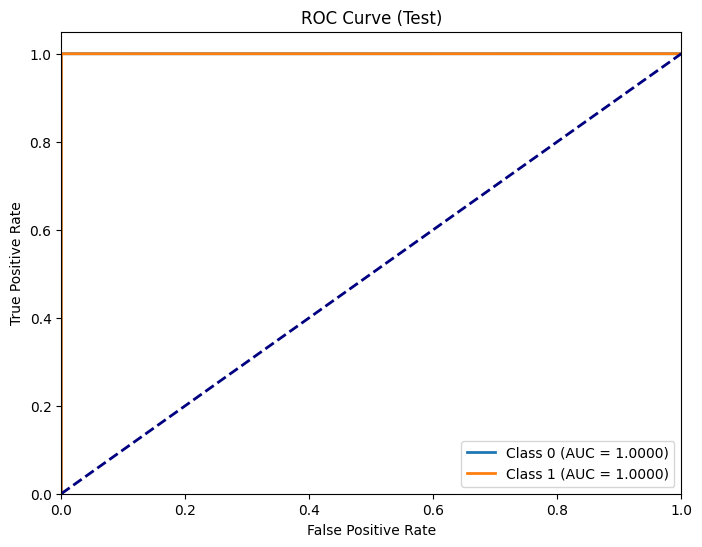

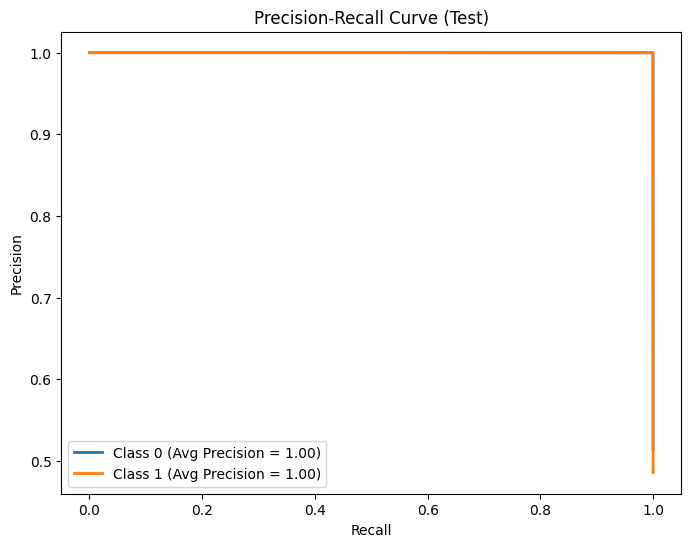

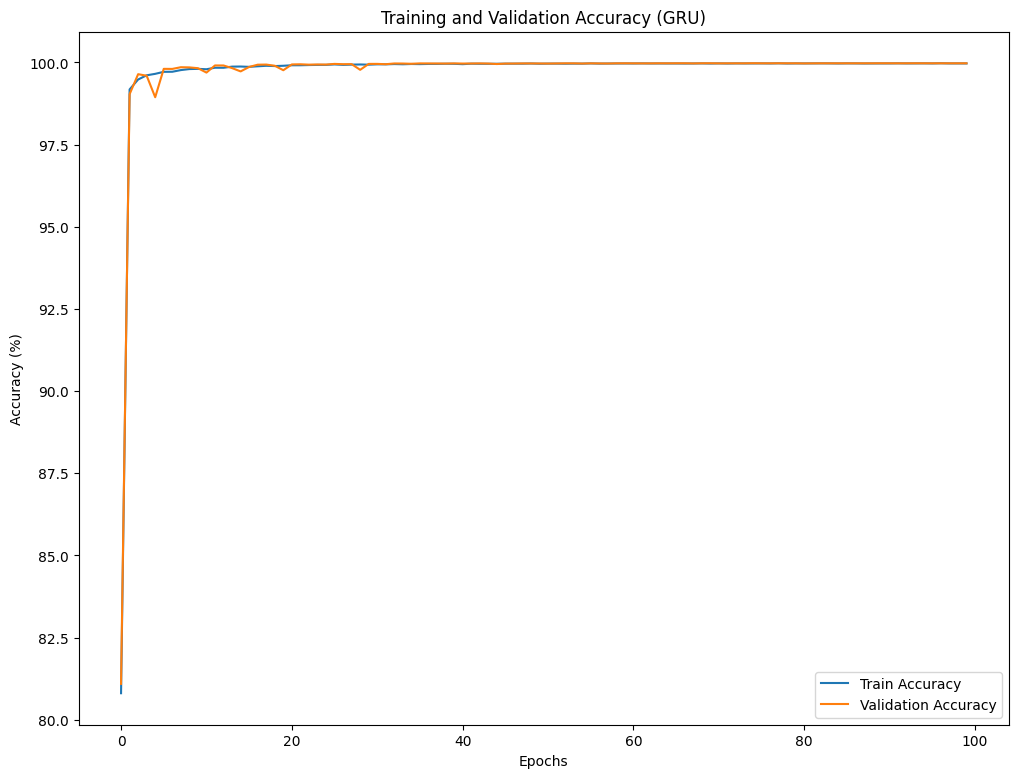

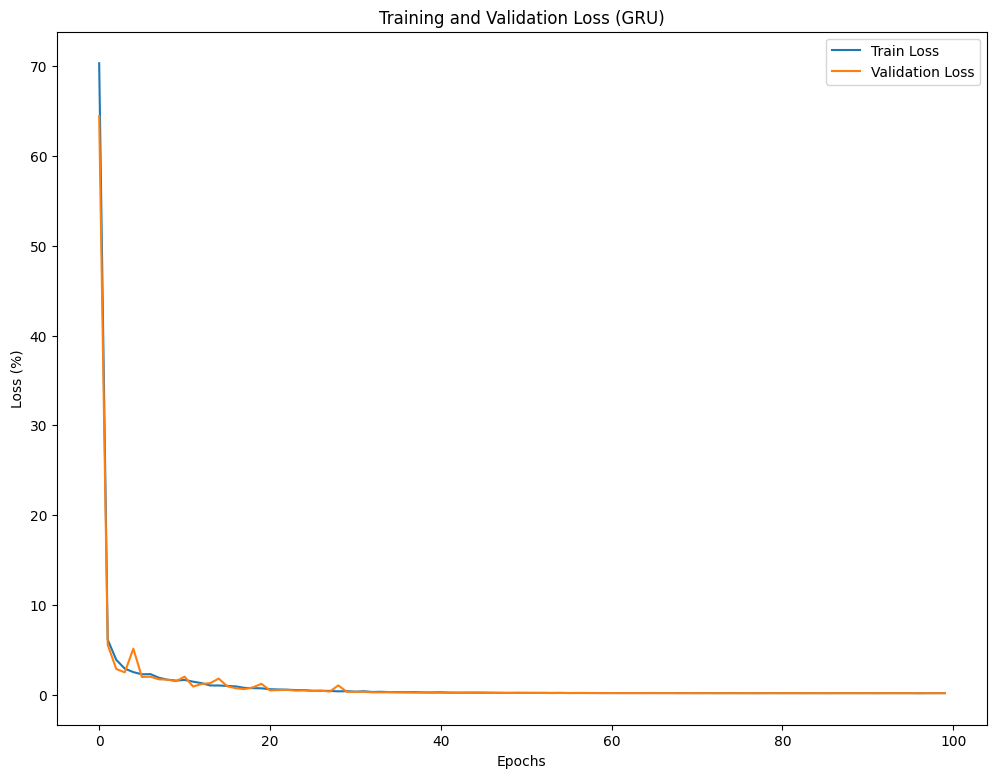

Epoch 1 - Train Loss: 70.33%, Validation Loss: 64.44%, Train Accuracy: 80.81%, Validation Accuracy: 81.09%
Epoch 2 - Train Loss: 6.13%, Validation Loss: 5.56%, Train Accuracy: 99.18%, Validation Accuracy: 99.03%
Epoch 3 - Train Loss: 3.88%, Validation Loss: 2.86%, Train Accuracy: 99.48%, Validation Accuracy: 99.64%
Epoch 4 - Train Loss: 2.90%, Validation Loss: 2.49%, Train Accuracy: 99.61%, Validation Accuracy: 99.60%
Epoch 5 - Train Loss: 2.52%, Validation Loss: 5.13%, Train Accuracy: 99.65%, Validation Accuracy: 98.94%
Epoch 6 - Train Loss: 2.27%, Validation Loss: 1.98%, Train Accuracy: 99.71%, Validation Accuracy: 99.81%
Epoch 7 - Train Loss: 2.29%, Validation Loss: 2.01%, Train Accuracy: 99.72%, Validation Accuracy: 99.80%
Epoch 8 - Train Loss: 1.89%, Validation Loss: 1.71%, Train Accuracy: 99.77%, Validation Accuracy: 99.85%
Epoch 9 - Train Loss: 1.67%, Validation Loss: 1.68%, Train Accuracy: 99.80%, Validation Accuracy: 99.85%
Epoch 10 - Train Loss: 1.57%, Validation Loss: 1.50%,

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score, average_precision_score # Import average_precision_score
import seaborn as sns
import time


def evaluate_model(model, X, y_one_hot, dataset_name="Validation"):
    start_time = time.time()

    loss, accuracy = model.evaluate(X, y_one_hot, verbose=0)
    evaluation_time = time.time() - start_time

    predictions = model.predict(X)
    true_labels = np.argmax(y_one_hot, axis=1)
    pred_labels = np.argmax(predictions, axis=1)


    val_f1 = f1_score(true_labels, pred_labels, average='macro')
    val_precision = precision_score(true_labels, pred_labels, average='macro')
    val_recall = recall_score(true_labels, pred_labels, average='macro')

    print(f"{dataset_name} Loss: {loss:.6f}")
    print(f"{dataset_name} Accuracy: {accuracy:.6f}")
    print(f"{dataset_name} F1-Score: {val_f1:.6f}")
    print(f"{dataset_name} Precision: {val_precision:.6f}")
    print(f"{dataset_name} Recall: {val_recall:.6f}")
    print(f"{dataset_name} Evaluation Time: {evaluation_time:.2f} seconds")

    target_names = [str(i) for i in range(2)]
    val_classification_report = classification_report(true_labels, pred_labels, target_names=target_names, digits=6)
    print(f"{dataset_name} Classification Report:")
    print(val_classification_report)


    plot_roc_curve(true_labels, predictions, 2, dataset_name)


    plot_precision_recall_curve(true_labels, predictions, 2, dataset_name)


def plot_roc_curve(true_labels, predictions, num_classes, dataset_name):
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(true_labels, predictions[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.4f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({dataset_name})')
    plt.legend(loc="lower right")
    plt.show()


def plot_precision_recall_curve(true_labels, predictions, num_classes, dataset_name):
    precision = {}
    recall = {}
    average_precision = {}

    for i in range(num_classes):
        precision[i], recall[i], _ = precision_recall_curve(true_labels, predictions[:, i], pos_label=i)
        average_precision[i] = average_precision_score(true_labels, predictions[:, i], pos_label=i)

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (Avg Precision = {average_precision[i]:.2f})')

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve ({dataset_name})")
    plt.legend(loc="best")
    plt.show()


evaluate_model(model_gru, X_TON_IOT_valid, y_TON_IOT_valid_one_hot, dataset_name="Validation")


y_TON_IOT_test2_one_hot = tf.keras.utils.to_categorical(y_TON_IOT_test2, num_classes=2)
evaluate_model(model_gru, X_TON_IOT_test2, y_TON_IOT_test2_one_hot, dataset_name="Test")


plt.figure(figsize=(12, 9))
plt.plot(np.array(history_gru.history['accuracy']) * 100, label='Train Accuracy')
plt.plot(np.array(history_gru.history['val_accuracy']) * 100, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy (GRU)')
plt.legend()
plt.show()

plt.figure(figsize=(12, 9))
plt.plot(np.array(history_gru.history['loss']) * 100, label='Train Loss')
plt.plot(np.array(history_gru.history['val_loss']) * 100, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (%)')
plt.title('Training and Validation Loss (GRU)')
plt.legend()
plt.show()


for epoch, (loss, val_loss, accuracy, val_accuracy) in enumerate(zip(history_gru.history['loss'],
                                                                      history_gru.history['val_loss'],
                                                                      history_gru.history['accuracy'],
                                                                      history_gru.history['val_accuracy']), 1):
    print(f"Epoch {epoch} - Train Loss: {loss * 100:.2f}%, Validation Loss: {val_loss * 100:.2f}%, Train Accuracy: {accuracy * 100:.2f}%, Validation Accuracy: {val_accuracy * 100:.2f}%")

#***LSTM***

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, precision_score, recall_score
import seaborn as sns
import time
import numpy as np


def scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)  # Ensure it returns a float
    else:
        return float(lr * tf.math.exp(-0.1))  # Ensure it returns a float

lr_scheduler = LearningRateScheduler(scheduler)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# LSTM Model
model_lstm = Sequential()
model_lstm.add(LSTM(128, activation='tanh', return_sequences=True, input_shape=X_TON_IOT_train.shape[1:], kernel_regularizer=l2(0.01)))
model_lstm.add(BatchNormalization())
model_lstm.add(Dropout(0.5))
model_lstm.add(LSTM(256, activation='tanh', kernel_regularizer=l2(0.01)))
model_lstm.add(BatchNormalization())
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(2, activation='softmax'))

model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()

history_lstm = model_lstm.fit(X_TON_IOT_train, y_TON_IOT_train_one_hot, epochs=100, batch_size=1024,
                              validation_data=(X_TON_IOT_valid, y_TON_IOT_valid_one_hot),
                              callbacks=[lr_scheduler], verbose=1)
end_time = time.time()
training_time = end_time - start_time

 # training_time
print(f"Le temps d'entraînement du modèle LSTM est de {training_time:.2f} secondes.")

Epoch 1/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 47s 94ms/step - accuracy: 0.6993 - loss: 1.4735 - val_accuracy: 0.8874 - val_loss: 0.3923 - learning_rate: 0.0010
Epoch 2/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 84s 97ms/step - accuracy: 0.9700 - loss: 0.1185 - val_accuracy: 0.9810 - val_loss: 0.0740 - learning_rate: 0.0010
Epoch 3/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 46s 98ms/step - accuracy: 0.9839 - loss: 0.0670 - val_accuracy: 0.9857 - val_loss: 0.0615 - learning_rate: 0.0010
Epoch 4/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - accuracy: 0.9862 - loss: 0.0578 - val_accuracy: 0.9829 - val_loss: 0.0594 - learning_rate: 0.0010
Epoch 5/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 82s 98ms/step - accuracy: 0.9900 - loss: 0.0428 - val_accuracy: 0.9903 - val_loss: 0.0383 - learning_rate: 0.0010
Epoch 6/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - accuracy: 0.9907 - loss: 0.0410 - val_accuracy: 0.9883 - val_loss: 0.0612 - learning_rate: 0.0010
Epoch 7/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 82s 98ms/step - accuracy: 0.9

4946/4946 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step
Validation Loss: 0.002948
Validation Accuracy: 0.999640
Validation F1-Score: 0.999640
Validation Precision: 0.999640
Validation Recall: 0.999640
Validation Evaluation Time: 20.59 seconds
Validation Classification Report:
              precision    recall  f1-score   support

           0   0.999596  0.999684  0.999640     79129
           1   0.999684  0.999596  0.999640     79129

    accuracy                       0.999640    158258
   macro avg   0.999640  0.999640  0.999640    158258
weighted avg   0.999640  0.999640  0.999640    158258



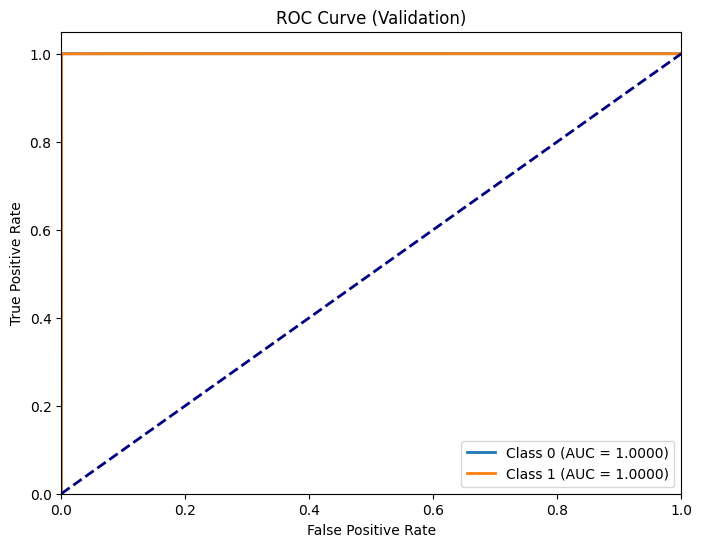

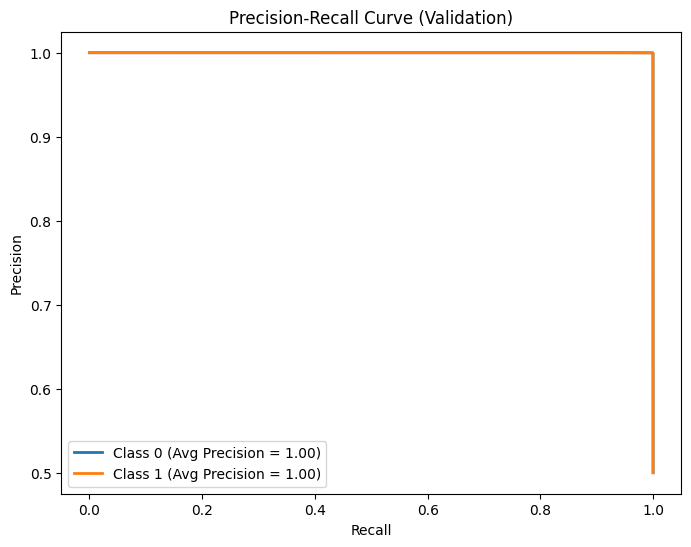

5092/5092 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step
Test Loss: 0.002589
Test Accuracy: 0.999754
Test F1-Score: 0.999754
Test Precision: 0.999754
Test Recall: 0.999754
Test Evaluation Time: 41.12 seconds
Test Classification Report:
              precision    recall  f1-score   support

           0   0.999761  0.999761  0.999761     83812
           1   0.999747  0.999747  0.999747     79111

    accuracy                       0.999754    162923
   macro avg   0.999754  0.999754  0.999754    162923
weighted avg   0.999754  0.999754  0.999754    162923



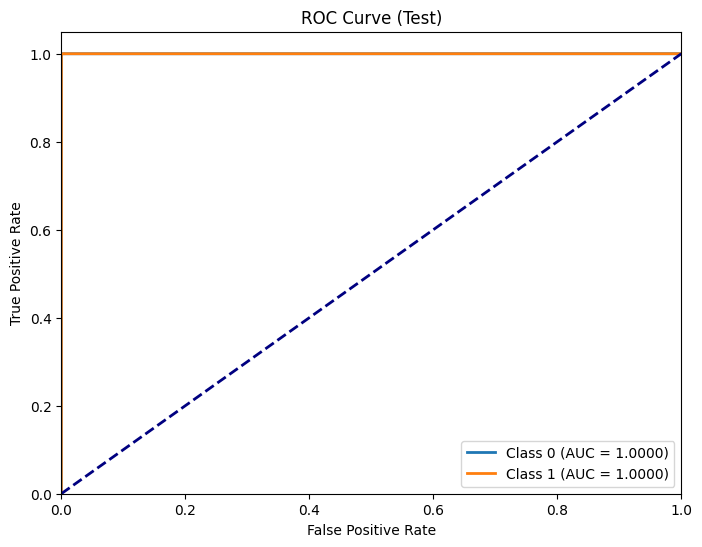

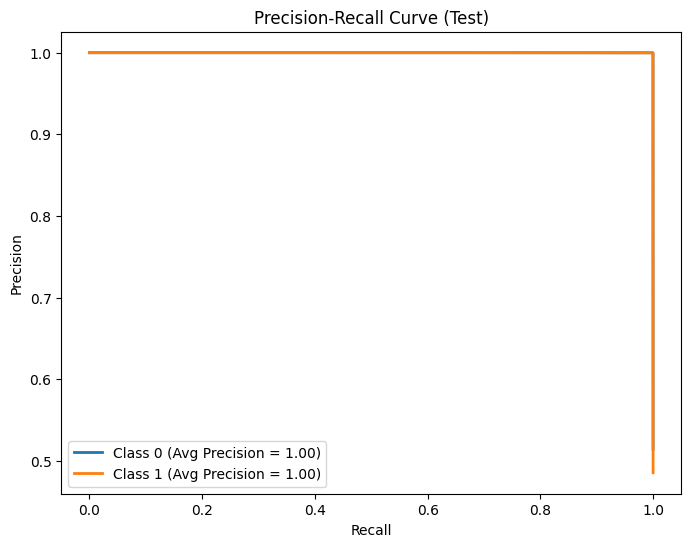

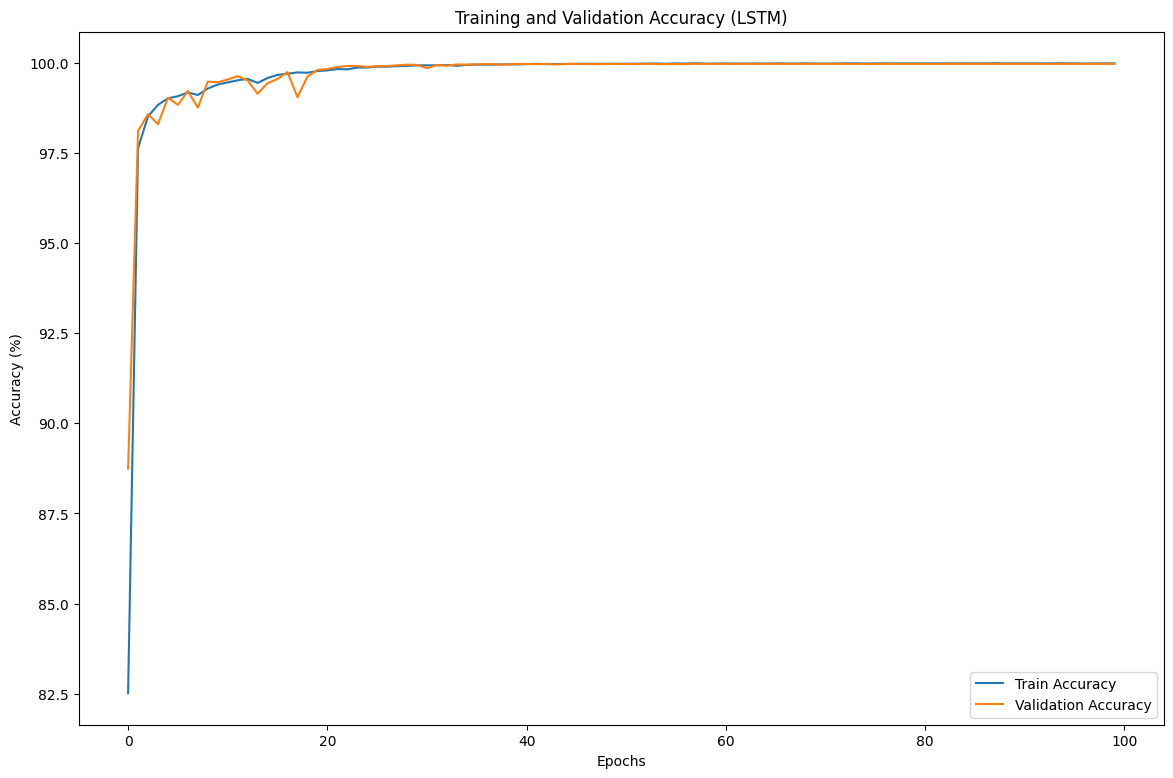

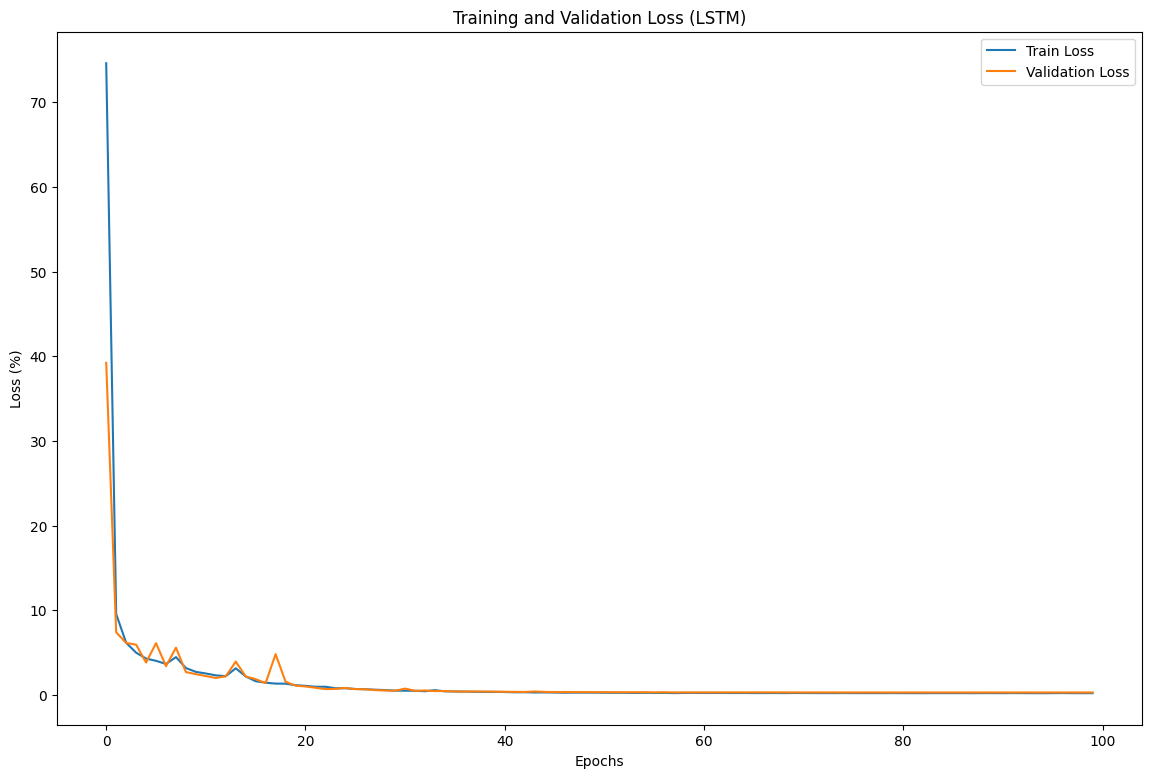

Epoch 1 - Train Loss: 74.61%, Validation Loss: 39.23%, Train Accuracy: 82.51%, Validation Accuracy: 88.74%
Epoch 2 - Train Loss: 9.55%, Validation Loss: 7.40%, Train Accuracy: 97.63%, Validation Accuracy: 98.10%
Epoch 3 - Train Loss: 6.17%, Validation Loss: 6.15%, Train Accuracy: 98.51%, Validation Accuracy: 98.57%
Epoch 4 - Train Loss: 4.99%, Validation Loss: 5.94%, Train Accuracy: 98.83%, Validation Accuracy: 98.29%
Epoch 5 - Train Loss: 4.30%, Validation Loss: 3.83%, Train Accuracy: 99.01%, Validation Accuracy: 99.03%
Epoch 6 - Train Loss: 4.03%, Validation Loss: 6.12%, Train Accuracy: 99.07%, Validation Accuracy: 98.83%
Epoch 7 - Train Loss: 3.66%, Validation Loss: 3.40%, Train Accuracy: 99.17%, Validation Accuracy: 99.21%
Epoch 8 - Train Loss: 4.47%, Validation Loss: 5.58%, Train Accuracy: 99.10%, Validation Accuracy: 98.75%
Epoch 9 - Train Loss: 3.18%, Validation Loss: 2.71%, Train Accuracy: 99.28%, Validation Accuracy: 99.47%
Epoch 10 - Train Loss: 2.73%, Validation Loss: 2.46%,

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score, average_precision_score
import seaborn as sns
import numpy as np
import time

def evaluate_model(model, X, y_one_hot, dataset_name="Validation"):
    start_time = time.time()

    loss, accuracy = model.evaluate(X, y_one_hot, verbose=0)
    evaluation_time = time.time() - start_time

    predictions = model.predict(X)
    true_labels = np.argmax(y_one_hot, axis=1)
    pred_labels = np.argmax(predictions, axis=1)


    val_f1 = f1_score(true_labels, pred_labels, average='macro')
    val_precision = precision_score(true_labels, pred_labels, average='macro')
    val_recall = recall_score(true_labels, pred_labels, average='macro')

    print(f"{dataset_name} Loss: {loss:.6f}")
    print(f"{dataset_name} Accuracy: {accuracy:.6f}")
    print(f"{dataset_name} F1-Score: {val_f1:.6f}")
    print(f"{dataset_name} Precision: {val_precision:.6f}")
    print(f"{dataset_name} Recall: {val_recall:.6f}")
    print(f"{dataset_name} Evaluation Time: {evaluation_time:.2f} seconds")

    target_names = [str(i) for i in range(2)]
    val_classification_report = classification_report(true_labels, pred_labels, target_names=target_names, digits=6)
    print(f"{dataset_name} Classification Report:")
    print(val_classification_report)


    plot_roc_curve(true_labels, predictions, 2, dataset_name)
    plot_precision_recall_curve(true_labels, predictions, 2, dataset_name)


def plot_roc_curve(true_labels, predictions, num_classes, dataset_name):
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(true_labels, predictions[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.4f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({dataset_name})')
    plt.legend(loc="lower right")
    plt.show()


def plot_precision_recall_curve(true_labels, predictions, num_classes, dataset_name):
    precision = {}
    recall = {}
    average_precision = {}

    for i in range(num_classes):
        precision[i], recall[i], _ = precision_recall_curve(true_labels, predictions[:, i], pos_label=i)
        average_precision[i] = average_precision_score(true_labels, predictions[:, i], pos_label=i)

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (Avg Precision = {average_precision[i]:.2f})')

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve ({dataset_name})")
    plt.legend(loc="best")
    plt.show()


evaluate_model(model_lstm, X_TON_IOT_valid, y_TON_IOT_valid_one_hot, dataset_name="Validation")


y_TON_IOT_test2_one_hot = tf.keras.utils.to_categorical(y_TON_IOT_test2, num_classes=2)
evaluate_model(model_lstm, X_TON_IOT_test2, y_TON_IOT_test2_one_hot, dataset_name="Test")

plt.figure(figsize=(14, 9))
plt.plot(np.array(history_lstm.history['accuracy']) * 100, label='Train Accuracy')
plt.plot(np.array(history_lstm.history['val_accuracy']) * 100, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy (LSTM)')
plt.legend()
plt.show()

plt.figure(figsize=(14, 9))
plt.plot(np.array(history_lstm.history['loss']) * 100, label='Train Loss')
plt.plot(np.array(history_lstm.history['val_loss']) * 100, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (%)')
plt.title('Training and Validation Loss (LSTM)')
plt.legend()
plt.show()



for epoch, (loss, val_loss, accuracy, val_accuracy) in enumerate(zip(history_lstm.history['loss'],
                                                                      history_lstm.history['val_loss'],
                                                                      history_lstm.history['accuracy'],
                                                                      history_lstm.history['val_accuracy']), 1):
    print(f"Epoch {epoch} - Train Loss: {loss * 100:.2f}%, Validation Loss: {val_loss * 100:.2f}%, Train Accuracy: {accuracy * 100:.2f}%, Validation Accuracy: {val_accuracy * 100:.2f}%")


In [ ]:
import pickle

with open('history_lstm.pkl', 'wb') as file:
    pickle.dump(history_lstm.history, file)

#***CNN_LSTM***

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, precision_score, recall_score
import seaborn as sns
import time
import numpy as np


def scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)  # Ensure it returns a float
    else:
        return float(lr * tf.math.exp(-0.1))  # Ensure it returns a float

lr_scheduler = LearningRateScheduler(scheduler)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# CNN_LSTM
model_lstm_cnn = Sequential()
model_lstm_cnn.add(LSTM(128, activation='tanh', return_sequences=True, input_shape=X_TON_IOT_train.shape[1:], kernel_regularizer=l2(0.01)))
model_lstm_cnn.add(BatchNormalization())
model_lstm_cnn.add(Dropout(0.5))
model_lstm_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_lstm_cnn.add(MaxPooling1D(pool_size=2))
model_lstm_cnn.add(Flatten())
model_lstm_cnn.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model_lstm_cnn.add(BatchNormalization())
model_lstm_cnn.add(Dropout(0.5))
model_lstm_cnn.add(Dense(2, activation='softmax'))

model_lstm_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()

history_lstm_cnn = model_lstm_cnn.fit(X_TON_IOT_train, y_TON_IOT_train_one_hot, epochs=100, batch_size=1024,
                                      validation_data=(X_TON_IOT_valid, y_TON_IOT_valid_one_hot),
                                      callbacks=[lr_scheduler], verbose=1)
end_time = time.time()
training_time = end_time - start_time


 # training_time
print(f"Le temps d'entraînement du modèle LSTM_CNN est de {training_time:.2f} secondes.")


Epoch 1/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.9333 - loss: 1.5035 - val_accuracy: 0.7244 - val_loss: 0.4717 - learning_rate: 0.0010
Epoch 2/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9811 - loss: 0.1067 - val_accuracy: 0.9895 - val_loss: 0.0658 - learning_rate: 0.0010
Epoch 3/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.9849 - loss: 0.0781 - val_accuracy: 0.9864 - val_loss: 0.0654 - learning_rate: 0.0010
Epoch 4/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9879 - loss: 0.0636 - val_accuracy: 0.9948 - val_loss: 0.0419 - learning_rate: 0.0010
Epoch 5/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9889 - loss: 0.0577 - val_accuracy: 0.9953 - val_loss: 0.0361 - learning_rate: 0.0010
Epoch 6/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9901 - loss: 0.0521 - val_accuracy: 0.9918 - val_loss: 0.0446 - learning_rate: 0.0010
Epoch 7/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.9

4946/4946 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step
Validation Loss: 0.526501
Validation Accuracy: 0.806373
Validation F1-Score: 0.805862
Validation Precision: 0.809631
Validation Recall: 0.806373
Validation Evaluation Time: 20.64 seconds
Validation Classification Report:
              precision    recall  f1-score   support

           0   0.777869  0.857663  0.815820     79129
           1   0.841393  0.755083  0.795905     79129

    accuracy                       0.806373    158258
   macro avg   0.809631  0.806373  0.805862    158258
weighted avg   0.809631  0.806373  0.805862    158258



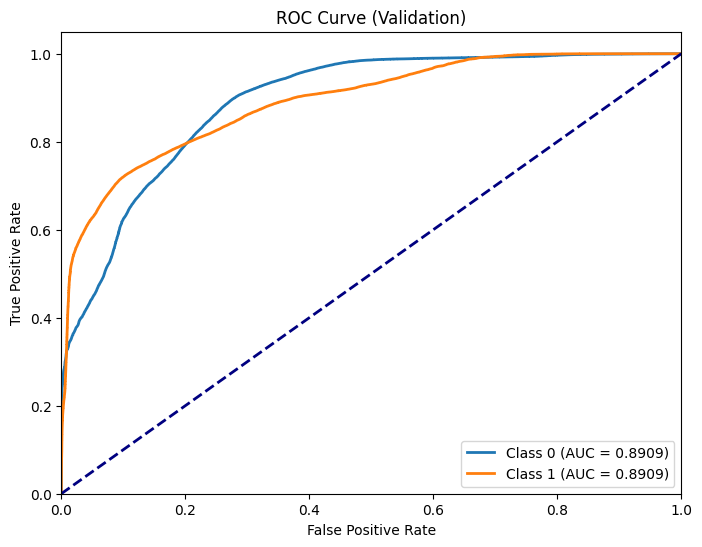

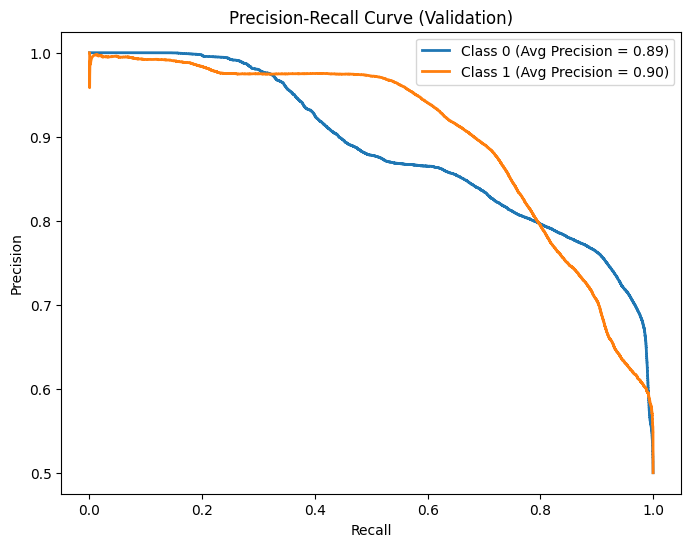

5092/5092 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step
Test Loss: 0.525250
Test Accuracy: 0.808511
Test F1-Score: 0.807478
Test Precision: 0.811120
Test Recall: 0.807069
Test Evaluation Time: 41.11 seconds
Test Classification Report:
              precision    recall  f1-score   support

           0   0.788942  0.857037  0.821581     83812
           1   0.833299  0.757101  0.793374     79111

    accuracy                       0.808511    162923
   macro avg   0.811120  0.807069  0.807478    162923
weighted avg   0.810480  0.808511  0.807885    162923



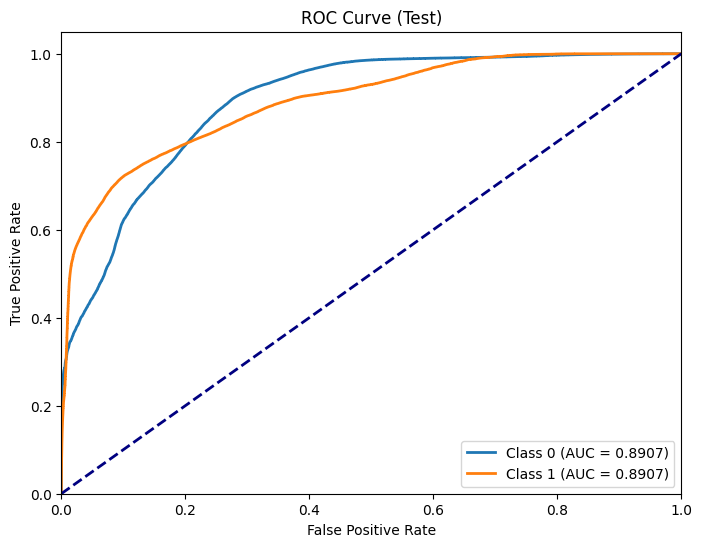

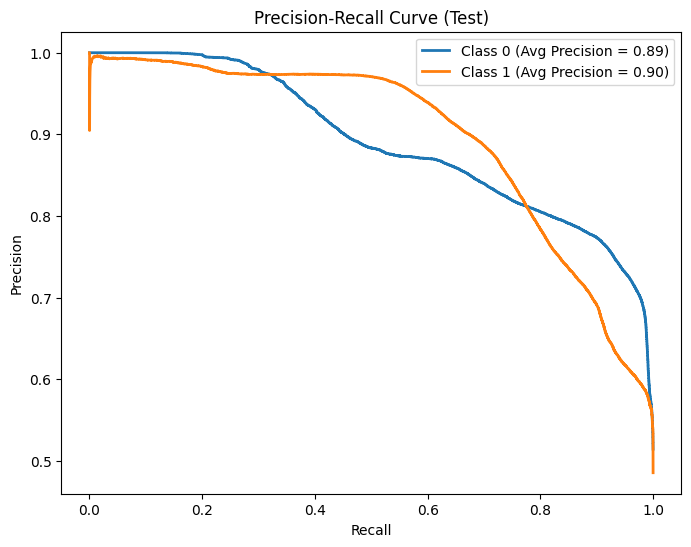

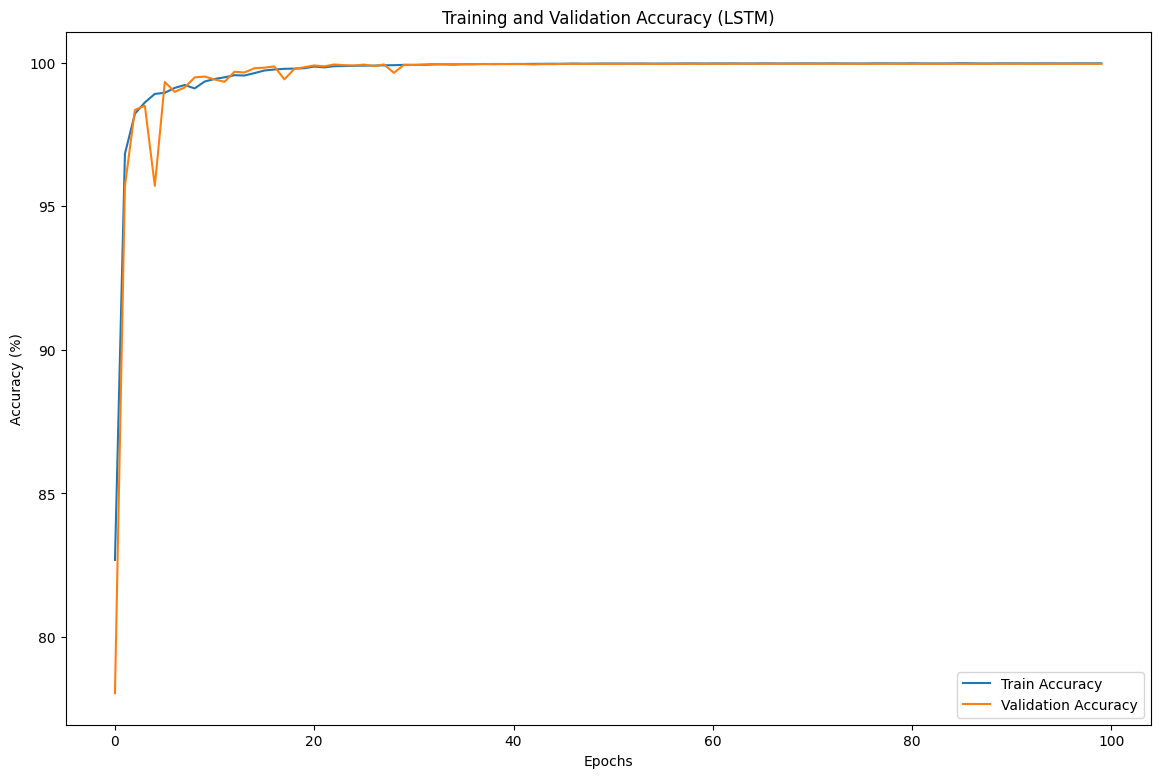

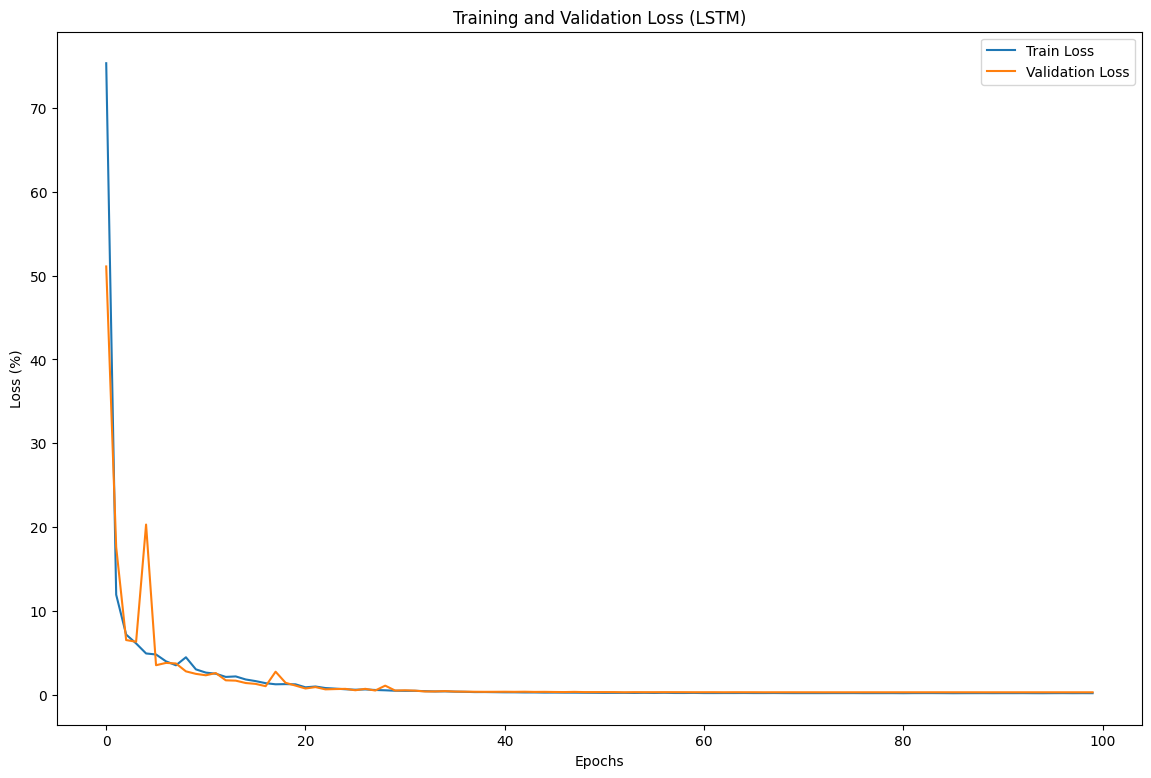

4946/4946 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step
Validation Loss: 0.002982
Validation Accuracy: 0.999792
Validation F1-Score: 0.999791
Validation Precision: 0.999792
Validation Recall: 0.999791
Validation Evaluation Time: 57.82 seconds
Validation Classification Report:
              precision    recall  f1-score   support

           0   0.999949  0.999634  0.999791     79129
           1   0.999634  0.999949  0.999792     79129

    accuracy                       0.999791    158258
   macro avg   0.999792  0.999791  0.999791    158258
weighted avg   0.999792  0.999791  0.999791    158258



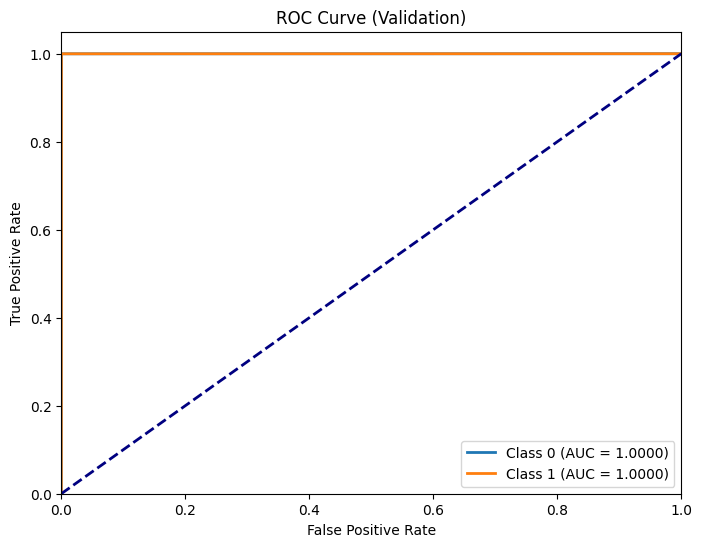

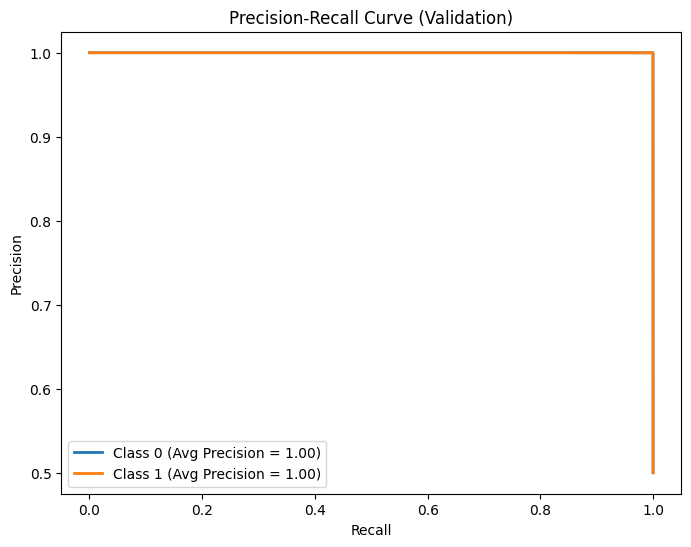

5092/5092 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step
Test Loss: 0.002932
Test Accuracy: 0.999810
Test F1-Score: 0.999810
Test Precision: 0.999805
Test Recall: 0.999814
Test Evaluation Time: 16.58 seconds
Test Classification Report:
              precision    recall  f1-score   support

           0   0.999964  0.999666  0.999815     83812
           1   0.999646  0.999962  0.999804     79111

    accuracy                       0.999810    162923
   macro avg   0.999805  0.999814  0.999810    162923
weighted avg   0.999810  0.999810  0.999810    162923



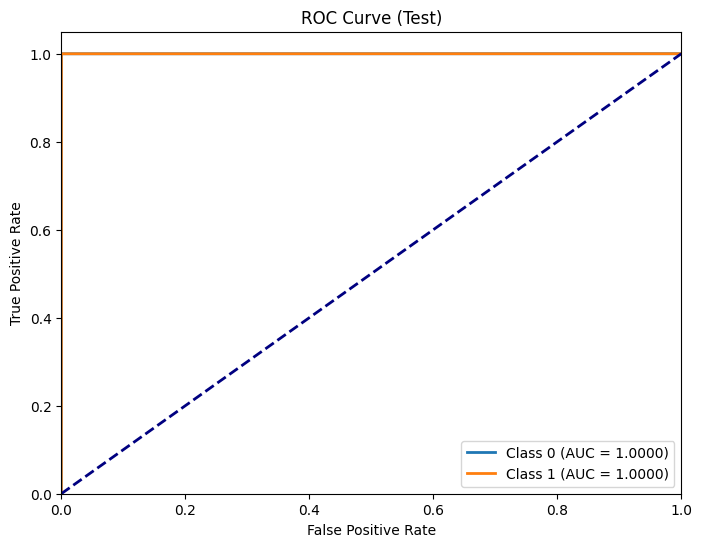

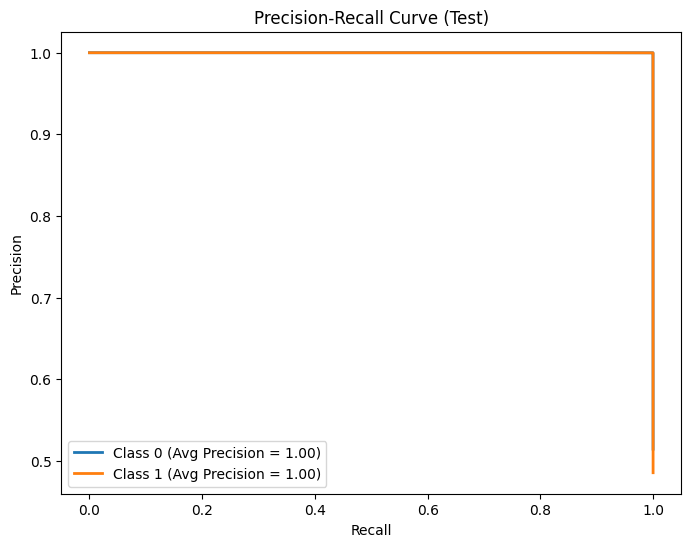

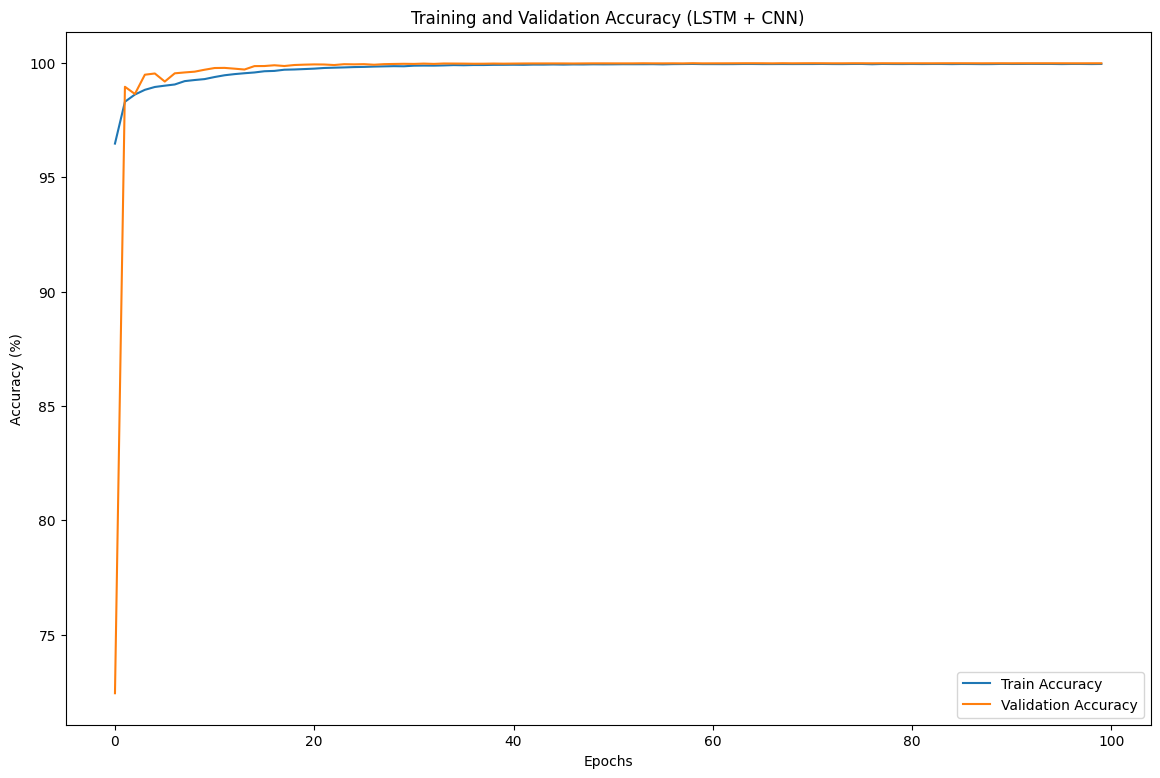

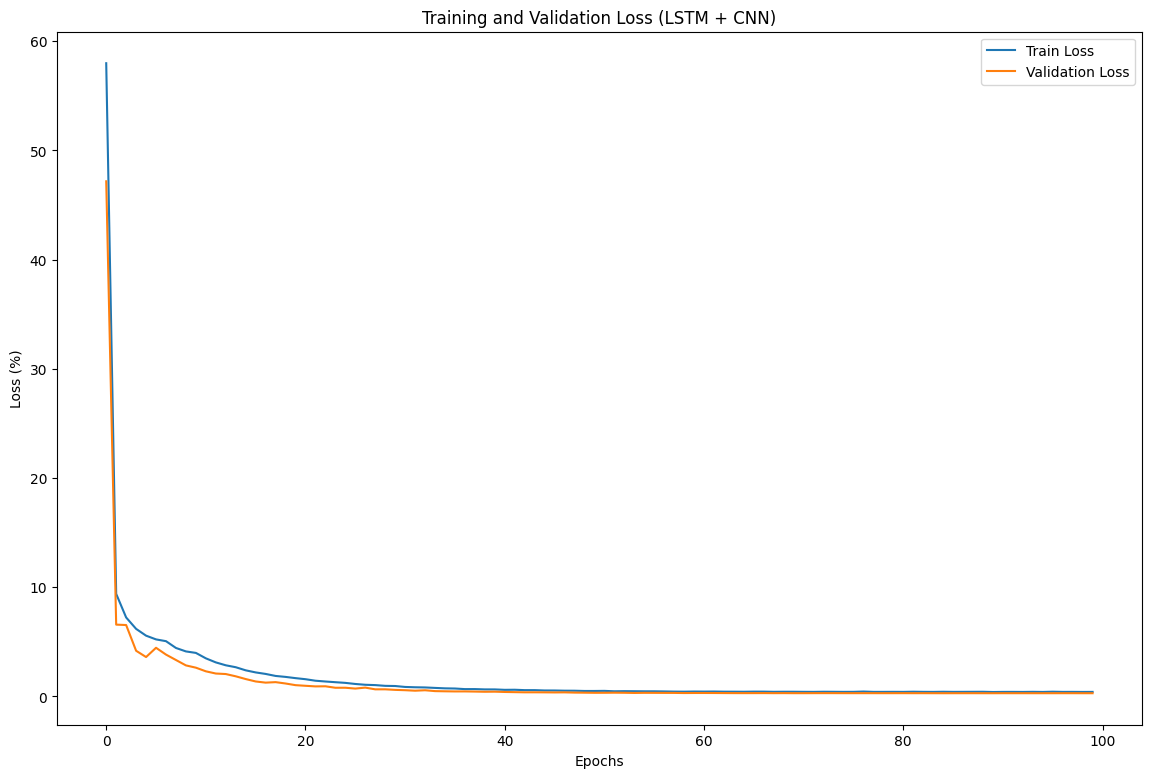

Epoch 1 - Train Loss: 57.99%, Validation Loss: 47.17%, Train Accuracy: 96.47%, Validation Accuracy: 72.44%
Epoch 2 - Train Loss: 9.40%, Validation Loss: 6.58%, Train Accuracy: 98.30%, Validation Accuracy: 98.95%
Epoch 3 - Train Loss: 7.23%, Validation Loss: 6.54%, Train Accuracy: 98.61%, Validation Accuracy: 98.64%
Epoch 4 - Train Loss: 6.19%, Validation Loss: 4.19%, Train Accuracy: 98.82%, Validation Accuracy: 99.48%
Epoch 5 - Train Loss: 5.57%, Validation Loss: 3.61%, Train Accuracy: 98.94%, Validation Accuracy: 99.53%
Epoch 6 - Train Loss: 5.23%, Validation Loss: 4.46%, Train Accuracy: 99.00%, Validation Accuracy: 99.18%
Epoch 7 - Train Loss: 5.06%, Validation Loss: 3.83%, Train Accuracy: 99.05%, Validation Accuracy: 99.54%
Epoch 8 - Train Loss: 4.44%, Validation Loss: 3.34%, Train Accuracy: 99.20%, Validation Accuracy: 99.58%
Epoch 9 - Train Loss: 4.13%, Validation Loss: 2.84%, Train Accuracy: 99.25%, Validation Accuracy: 99.61%
Epoch 10 - Train Loss: 3.99%, Validation Loss: 2.64%,

In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score, average_precision_score
import seaborn as sns
import numpy as np
import time

def evaluate_model(model, X, y_one_hot, dataset_name="Validation"):
    start_time = time.time()

    loss, accuracy = model.evaluate(X, y_one_hot, verbose=0)
    evaluation_time = time.time() - start_time

    predictions = model.predict(X)
    true_labels = np.argmax(y_one_hot, axis=1)
    pred_labels = np.argmax(predictions, axis=1)


    val_f1 = f1_score(true_labels, pred_labels, average='macro')
    val_precision = precision_score(true_labels, pred_labels, average='macro')
    val_recall = recall_score(true_labels, pred_labels, average='macro')

    print(f"{dataset_name} Loss: {loss:.6f}")
    print(f"{dataset_name} Accuracy: {accuracy:.6f}")
    print(f"{dataset_name} F1-Score: {val_f1:.6f}")
    print(f"{dataset_name} Precision: {val_precision:.6f}")
    print(f"{dataset_name} Recall: {val_recall:.6f}")
    print(f"{dataset_name} Evaluation Time: {evaluation_time:.2f} seconds")

    target_names = [str(i) for i in range(2)]
    val_classification_report = classification_report(true_labels, pred_labels, target_names=target_names, digits=6)
    print(f"{dataset_name} Classification Report:")
    print(val_classification_report)


    plot_roc_curve(true_labels, predictions, 2, dataset_name)


    plot_precision_recall_curve(true_labels, predictions, 2, dataset_name)


def plot_roc_curve(true_labels, predictions, num_classes, dataset_name):
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(true_labels, predictions[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.4f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({dataset_name})')
    plt.legend(loc="lower right")
    plt.show()


def plot_precision_recall_curve(true_labels, predictions, num_classes, dataset_name):
    precision = {}
    recall = {}
    average_precision = {}

    for i in range(num_classes):
        precision[i], recall[i], _ = precision_recall_curve(true_labels, predictions[:, i], pos_label=i)
        average_precision[i] = average_precision_score(true_labels, predictions[:, i], pos_label=i)

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (Avg Precision = {average_precision[i]:.2f})')

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve ({dataset_name})")
    plt.legend(loc="best")
    plt.show()


evaluate_model(model_lstm, X_TON_IOT_valid, y_TON_IOT_valid_one_hot, dataset_name="Validation")


y_TON_IOT_test2_one_hot = tf.keras.utils.to_categorical(y_TON_IOT_test2, num_classes=2)
evaluate_model(model_lstm, X_TON_IOT_test2, y_TON_IOT_test2_one_hot, dataset_name="Test")

plt.figure(figsize=(14, 9))
plt.plot(np.array(history_lstm.history['accuracy']) * 100, label='Train Accuracy')
plt.plot(np.array(history_lstm.history['val_accuracy']) * 100, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy (LSTM)')
plt.legend()
plt.show()

plt.figure(figsize=(14, 9))
plt.plot(np.array(history_lstm.history['loss']) * 100, label='Train Loss')
plt.plot(np.array(history_lstm.history['val_loss']) * 100, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (%)')
plt.title('Training and Validation Loss (LSTM)')
plt.legend()
plt.show()

evaluate_model(model_lstm_cnn, X_TON_IOT_valid, y_TON_IOT_valid_one_hot, dataset_name="Validation")


y_TON_IOT_test2_one_hot = tf.keras.utils.to_categorical(y_TON_IOT_test2, num_classes=2)
evaluate_model(model_lstm_cnn, X_TON_IOT_test2, y_TON_IOT_test2_one_hot, dataset_name="Test")




plt.figure(figsize=(14, 9))
plt.plot(np.array(history_lstm_cnn.history['accuracy']) * 100, label='Train Accuracy')
plt.plot(np.array(history_lstm_cnn.history['val_accuracy']) * 100, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy (LSTM + CNN)')
plt.legend()
plt.show()

plt.figure(figsize=(14, 9))
plt.plot(np.array(history_lstm_cnn.history['loss']) * 100, label='Train Loss')
plt.plot(np.array(history_lstm_cnn.history['val_loss']) * 100, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (%)')
plt.title('Training and Validation Loss (LSTM + CNN)')
plt.legend()
plt.show()



for epoch, (loss, val_loss, accuracy, val_accuracy) in enumerate(zip(history_lstm_cnn.history['loss'],
                                                                      history_lstm_cnn.history['val_loss'],
                                                                      history_lstm_cnn.history['accuracy'],
                                                                      history_lstm_cnn.history['val_accuracy']), 1):
    print(f"Epoch {epoch} - Train Loss: {loss * 100:.2f}%, Validation Loss: {val_loss * 100:.2f}%, Train Accuracy: {accuracy * 100:.2f}%, Validation Accuracy: {val_accuracy * 100:.2f}%")



In [ ]:
import pickle
with open('history_lstm_cnn.pkl', 'wb') as file:
    pickle.dump(history_lstm_cnn.history, file)

#***CNN_GRU***

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense, BatchNormalization, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
import time


def scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)  # Ensure it returns a float
    else:
        return float(lr * tf.math.exp(-0.1))  # Ensure it returns a float

lr_scheduler = LearningRateScheduler(scheduler)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#CNN_GRU Model
model_gru_cnn = Sequential()
model_gru_cnn.add(Conv1D(64, 3, activation='relu', input_shape=X_TON_IOT_train.shape[1:]))
model_gru_cnn.add(MaxPooling1D(pool_size=2))
model_gru_cnn.add(Conv1D(128, 3, activation='relu'))
model_gru_cnn.add(MaxPooling1D(pool_size=2))
model_gru_cnn.add(GRU(128, activation='tanh', return_sequences=True, kernel_regularizer=l2(0.01)))
model_gru_cnn.add(BatchNormalization())
model_gru_cnn.add(Dropout(0.5))
model_gru_cnn.add(GRU(256, activation='tanh', kernel_regularizer=l2(0.01)))
model_gru_cnn.add(BatchNormalization())
model_gru_cnn.add(Dropout(0.5))
model_gru_cnn.add(Flatten())
model_gru_cnn.add(Dense(2, activation='softmax'))

model_gru_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


start_time = time.time()

history_gru_cnn = model_gru_cnn.fit(X_TON_IOT_train, y_TON_IOT_train_one_hot, epochs=100, batch_size=1024,
                                    validation_data=(X_TON_IOT_valid, y_TON_IOT_valid_one_hot),
                                    callbacks=[lr_scheduler], verbose=1)
end_time = time.time()
training_time = end_time - start_time


 # training_time
print(f"Le temps d'entraînement du modèle CNN_GRU est de {training_time:.2f} secondes.")


Epoch 1/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 18s 33ms/step - accuracy: 0.9044 - loss: 1.5644 - val_accuracy: 0.8618 - val_loss: 0.3222 - learning_rate: 0.0010
Epoch 2/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.9942 - loss: 0.0481 - val_accuracy: 0.9975 - val_loss: 0.0171 - learning_rate: 0.0010
Epoch 3/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.9961 - loss: 0.0214 - val_accuracy: 0.8552 - val_loss: 0.3284 - learning_rate: 0.0010
Epoch 4/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9976 - loss: 0.0133 - val_accuracy: 0.9943 - val_loss: 0.0231 - learning_rate: 0.0010
Epoch 5/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9977 - loss: 0.0133 - val_accuracy: 0.9982 - val_loss: 0.0113 - learning_rate: 0.0010
Epoch 6/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.9984 - loss: 0.0094 - val_accuracy: 0.6552 - val_loss: 2.1708 - learning_rate: 0.0010
Epoch 7/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9

4946/4946 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step
Validation Loss: 0.000806
Validation Accuracy: 0.999899
Validation F1-Score: 0.999899
Validation Precision: 0.999899
Validation Recall: 0.999899
Validation Evaluation Time: 19.99 seconds
Validation Classification Report:
              precision    recall  f1-score   support

           0   0.999924  0.999874  0.999899     79129
           1   0.999874  0.999924  0.999899     79129

    accuracy                       0.999899    158258
   macro avg   0.999899  0.999899  0.999899    158258
weighted avg   0.999899  0.999899  0.999899    158258



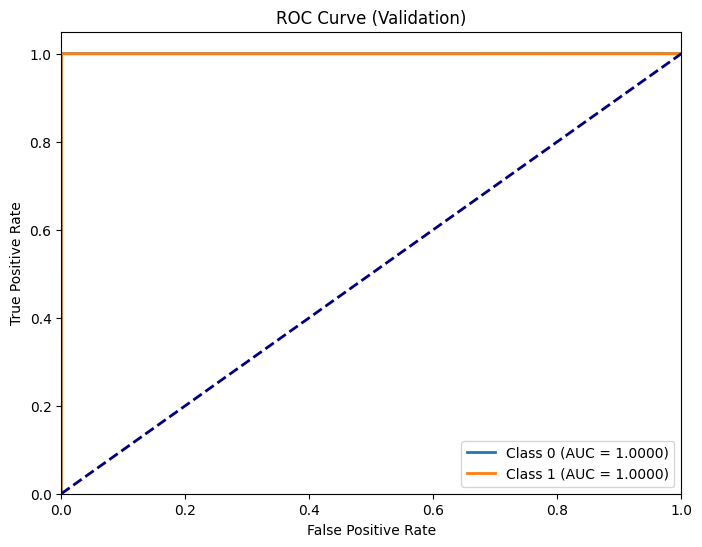

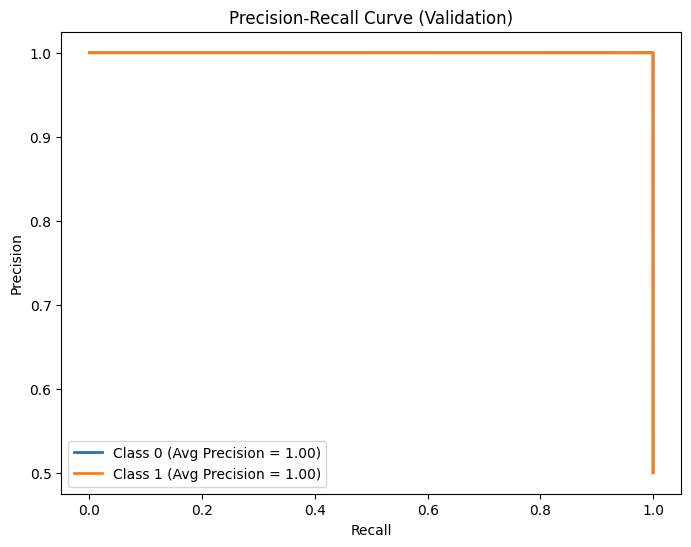

5092/5092 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step
Test Loss: 0.000520
Test Accuracy: 0.999945
Test F1-Score: 0.999945
Test Precision: 0.999945
Test Recall: 0.999945
Test Evaluation Time: 20.68 seconds
Test Classification Report:
              precision    recall  f1-score   support

           0   0.999952  0.999940  0.999946     83812
           1   0.999937  0.999949  0.999943     79111

    accuracy                       0.999945    162923
   macro avg   0.999945  0.999945  0.999945    162923
weighted avg   0.999945  0.999945  0.999945    162923



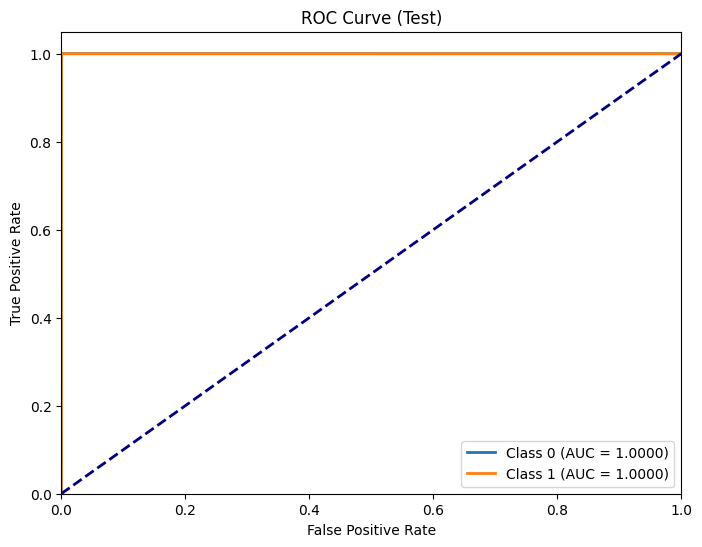

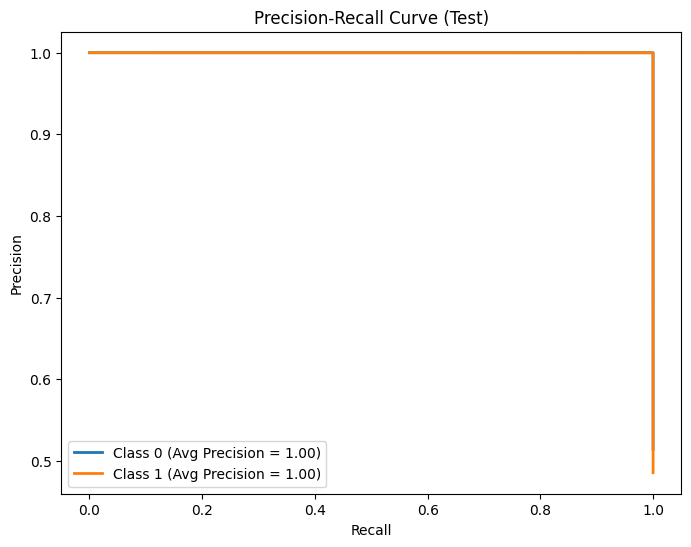

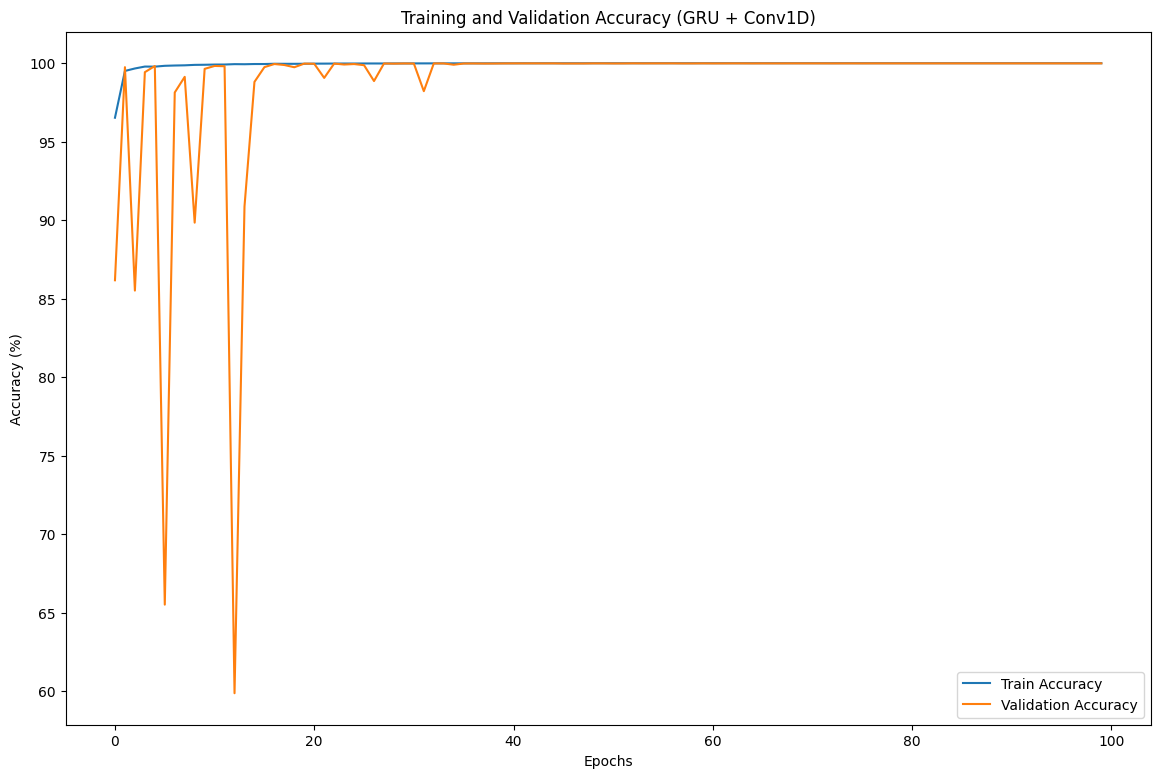

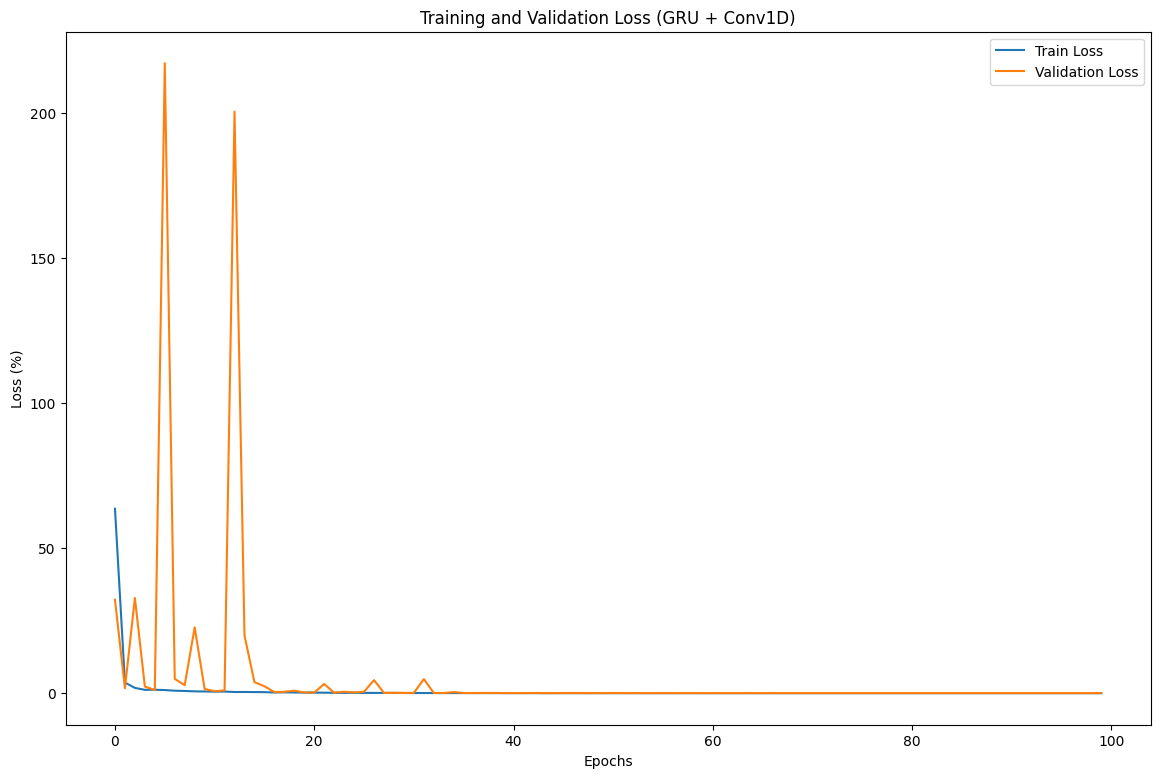

Epoch 1 - Train Loss: 63.58%, Validation Loss: 32.22%, Train Accuracy: 96.53%, Validation Accuracy: 86.18%
Epoch 2 - Train Loss: 3.69%, Validation Loss: 1.71%, Train Accuracy: 99.51%, Validation Accuracy: 99.75%
Epoch 3 - Train Loss: 1.86%, Validation Loss: 32.84%, Train Accuracy: 99.66%, Validation Accuracy: 85.52%
Epoch 4 - Train Loss: 1.19%, Validation Loss: 2.31%, Train Accuracy: 99.79%, Validation Accuracy: 99.43%
Epoch 5 - Train Loss: 1.22%, Validation Loss: 1.13%, Train Accuracy: 99.78%, Validation Accuracy: 99.82%
Epoch 6 - Train Loss: 1.11%, Validation Loss: 217.08%, Train Accuracy: 99.83%, Validation Accuracy: 65.52%
Epoch 7 - Train Loss: 0.89%, Validation Loss: 4.96%, Train Accuracy: 99.85%, Validation Accuracy: 98.14%
Epoch 8 - Train Loss: 0.80%, Validation Loss: 2.80%, Train Accuracy: 99.87%, Validation Accuracy: 99.13%
Epoch 9 - Train Loss: 0.66%, Validation Loss: 22.71%, Train Accuracy: 99.89%, Validation Accuracy: 89.84%
Epoch 10 - Train Loss: 0.63%, Validation Loss: 1.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Conv1D, MaxPooling1D, Flatten, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score, average_precision_score # Import average_precision_score
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import label_binarize, LabelEncoder



def evaluate_model(model, X, y_one_hot, dataset_name="Validation"):
    start_time = time.time()

    loss, accuracy = model.evaluate(X, y_one_hot, verbose=0)
    evaluation_time = time.time() - start_time

    predictions = model.predict(X)
    true_labels = np.argmax(y_one_hot, axis=1)
    pred_labels = np.argmax(predictions, axis=1)


    val_f1 = f1_score(true_labels, pred_labels, average='macro')
    val_precision = precision_score(true_labels, pred_labels, average='macro')
    val_recall = recall_score(true_labels, pred_labels, average='macro')

    print(f"{dataset_name} Loss: {loss:.6f}")
    print(f"{dataset_name} Accuracy: {accuracy:.6f}")
    print(f"{dataset_name} F1-Score: {val_f1:.6f}")
    print(f"{dataset_name} Precision: {val_precision:.6f}")
    print(f"{dataset_name} Recall: {val_recall:.6f}")
    print(f"{dataset_name} Evaluation Time: {evaluation_time:.2f} seconds")

    target_names = [str(i) for i in range(2)]
    val_classification_report = classification_report(true_labels, pred_labels, target_names=target_names, digits=6)
    print(f"{dataset_name} Classification Report:")
    print(val_classification_report)


    plot_roc_curve(true_labels, predictions, 2, dataset_name)


    plot_precision_recall_curve(true_labels, predictions, 2, dataset_name)


def plot_roc_curve(true_labels, predictions, num_classes, dataset_name):
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(true_labels, predictions[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.4f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({dataset_name})')
    plt.legend(loc="lower right")
    plt.show()


def plot_precision_recall_curve(true_labels, predictions, num_classes, dataset_name):
    precision = {}
    recall = {}
    average_precision = {}

    for i in range(num_classes):
        precision[i], recall[i], _ = precision_recall_curve(true_labels, predictions[:, i], pos_label=i)
        average_precision[i] = average_precision_score(true_labels, predictions[:, i], pos_label=i)

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (Avg Precision = {average_precision[i]:.2f})')

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve ({dataset_name})")
    plt.legend(loc="best")
    plt.show()


evaluate_model(model_gru_cnn, X_TON_IOT_valid, y_TON_IOT_valid_one_hot, dataset_name="Validation")




y_TON_IOT_test2_one_hot = tf.keras.utils.to_categorical(y_TON_IOT_test2, num_classes=2)
evaluate_model(model_gru_cnn, X_TON_IOT_test2, y_TON_IOT_test2_one_hot, dataset_name="Test")




plt.figure(figsize=(14, 9))
plt.plot(np.array(history_gru_cnn.history['accuracy']) * 100, label='Train Accuracy')
plt.plot(np.array(history_gru_cnn.history['val_accuracy']) * 100, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy (GRU + Conv1D)')
plt.legend()
plt.show()

plt.figure(figsize=(14, 9))
plt.plot(np.array(history_gru_cnn.history['loss']) * 100, label='Train Loss')
plt.plot(np.array(history_gru_cnn.history['val_loss']) * 100, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (%)')
plt.title('Training and Validation Loss (GRU + Conv1D)')
plt.legend()
plt.show()


for epoch, (loss, val_loss, accuracy, val_accuracy) in enumerate(zip(history_gru_cnn.history['loss'],
                                                                      history_gru_cnn.history['val_loss'],
                                                                      history_gru_cnn.history['accuracy'],
                                                                      history_gru_cnn.history['val_accuracy']), 1):
    print(f"Epoch {epoch} - Train Loss: {loss * 100:.2f}%, Validation Loss: {val_loss * 100:.2f}%, Train Accuracy: {accuracy * 100:.2f}%, Validation Accuracy: {val_accuracy * 100:.2f}%")

In [ ]:
import pickle
with open('history_gru_cnn.pkl', 'wb') as file:
    pickle.dump(history_gru_cnn.history, file)

#***CNN_RNN***

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense, BatchNormalization, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, precision_score, recall_score
import seaborn as sns



def scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)  # Ensure it returns a float
    else:
        return float(lr * tf.math.exp(-0.1))  # Ensure it returns a float

lr_scheduler = LearningRateScheduler(scheduler)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


#CNN_RNN
model_rnn_cnn = Sequential()
model_rnn_cnn.add(Conv1D(64, 3, activation='relu', input_shape=X_TON_IOT_train.shape[1:]))
model_rnn_cnn.add(MaxPooling1D(pool_size=2))
model_rnn_cnn.add(Conv1D(128, 3, activation='relu'))
model_rnn_cnn.add(MaxPooling1D(pool_size=2))
model_rnn_cnn.add(SimpleRNN(128, activation='tanh', return_sequences=True, kernel_regularizer=l2(0.01)))
model_rnn_cnn.add(BatchNormalization())
model_rnn_cnn.add(Dropout(0.5))
model_rnn_cnn.add(SimpleRNN(256, activation='tanh', kernel_regularizer=l2(0.01)))
model_rnn_cnn.add(BatchNormalization())
model_rnn_cnn.add(Dropout(0.5))
model_rnn_cnn.add(Flatten())
model_rnn_cnn.add(Dense(2, activation='softmax'))

model_rnn_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()

history_rnn_cnn = model_rnn_cnn.fit(X_TON_IOT_train, y_TON_IOT_train_one_hot, epochs=100, batch_size=1024,
                                    validation_data=(X_TON_IOT_valid, y_TON_IOT_valid_one_hot),
                                    callbacks=[lr_scheduler], verbose=1)
end_time = time.time()
training_time = end_time - start_time


 # training_time
print(f"Le temps d'entraînement du modèle CNN_RNN est de {training_time:.2f} secondes.")

Epoch 1/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.9529 - loss: 1.3905 - val_accuracy: 0.9958 - val_loss: 0.0387 - learning_rate: 0.0010
Epoch 2/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9958 - loss: 0.0311 - val_accuracy: 0.9943 - val_loss: 0.0266 - learning_rate: 0.0010
Epoch 3/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9961 - loss: 0.0227 - val_accuracy: 0.9876 - val_loss: 0.0418 - learning_rate: 0.0010
Epoch 4/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9971 - loss: 0.0167 - val_accuracy: 0.9987 - val_loss: 0.0096 - learning_rate: 0.0010
Epoch 5/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9983 - loss: 0.0103 - val_accuracy: 0.9893 - val_loss: 0.0471 - learning_rate: 0.0010
Epoch 6/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9974 - loss: 0.0149 - val_accuracy: 0.9985 - val_loss: 0.0127 - learning_rate: 0.0010
Epoch 7/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.998

4946/4946 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step
Validation Loss: 0.000576
Validation Accuracy: 0.999918
Validation F1-Score: 0.999918
Validation Precision: 0.999918
Validation Recall: 0.999918
Validation Evaluation Time: 20.69 seconds
Validation Classification Report:
              precision    recall  f1-score   support

           0   0.999924  0.999912  0.999918     79129
           1   0.999912  0.999924  0.999918     79129

    accuracy                       0.999918    158258
   macro avg   0.999918  0.999918  0.999918    158258
weighted avg   0.999918  0.999918  0.999918    158258



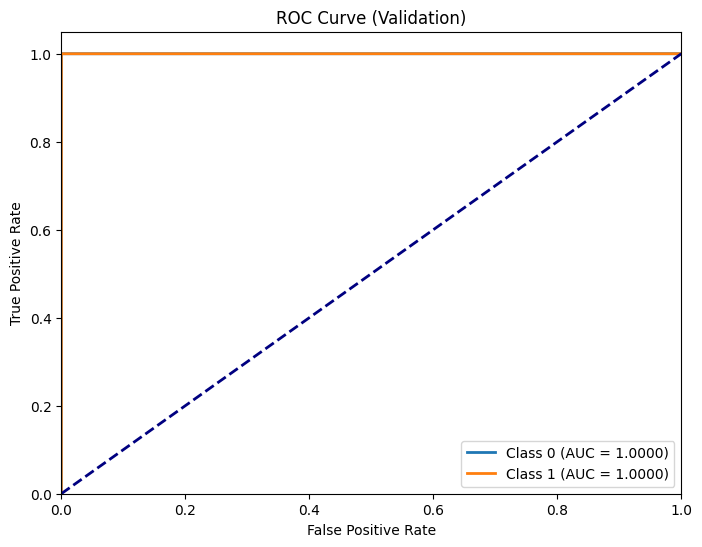

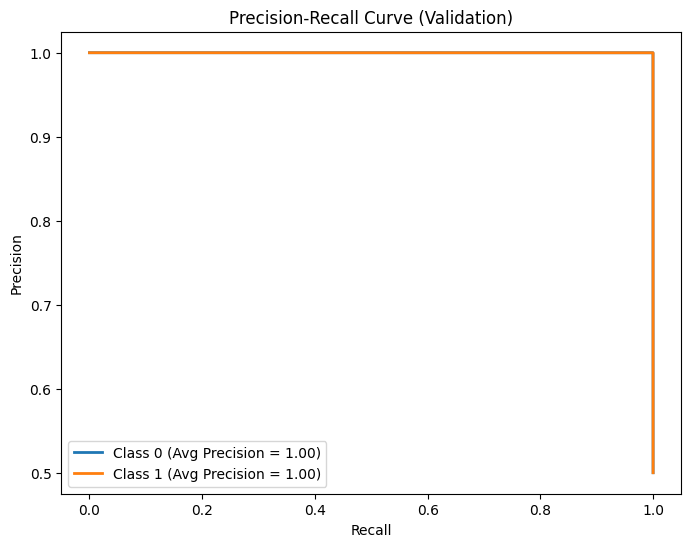

5092/5092 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step
Test Loss: 0.000572
Test Accuracy: 0.999932
Test F1-Score: 0.999932
Test Precision: 0.999932
Test Recall: 0.999933
Test Evaluation Time: 20.65 seconds
Test Classification Report:
              precision    recall  f1-score   support

           0   0.999940  0.999928  0.999934     83812
           1   0.999924  0.999937  0.999930     79111

    accuracy                       0.999932    162923
   macro avg   0.999932  0.999933  0.999932    162923
weighted avg   0.999932  0.999932  0.999932    162923



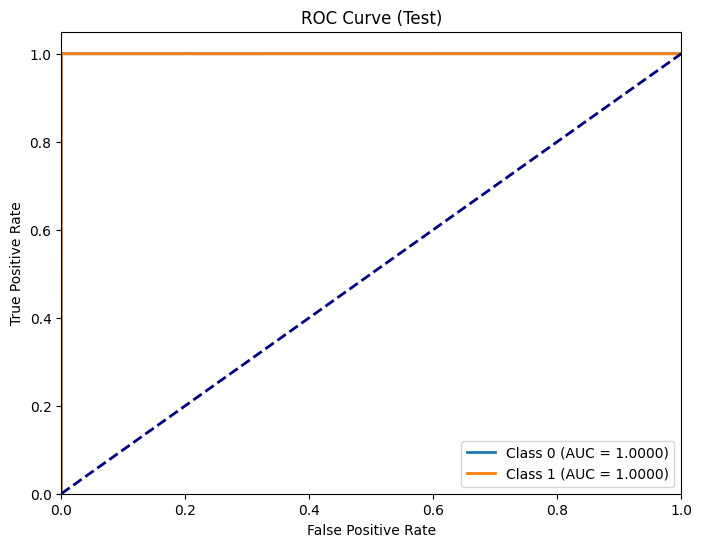

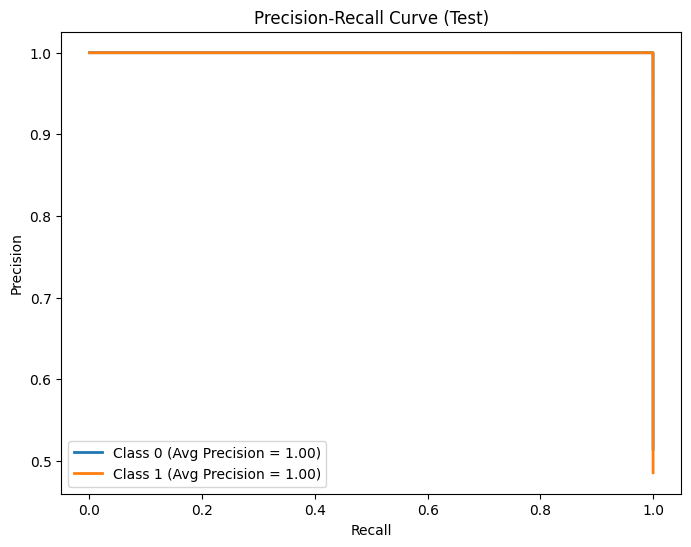

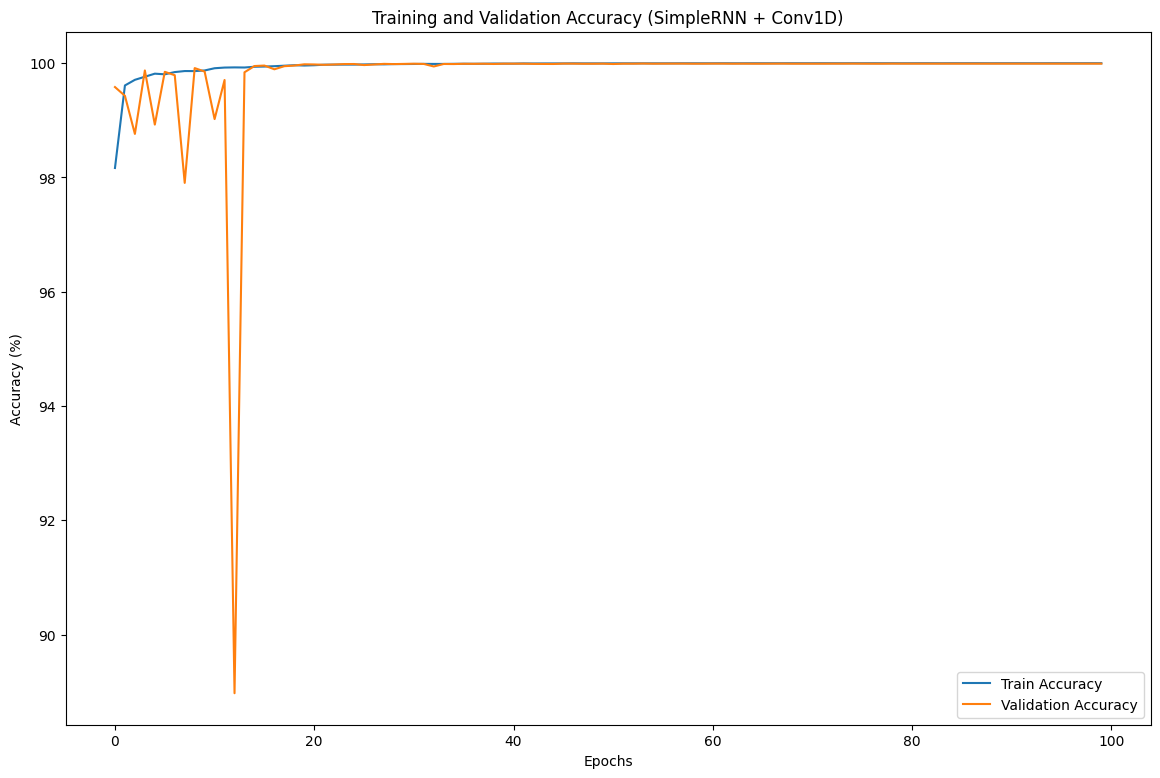

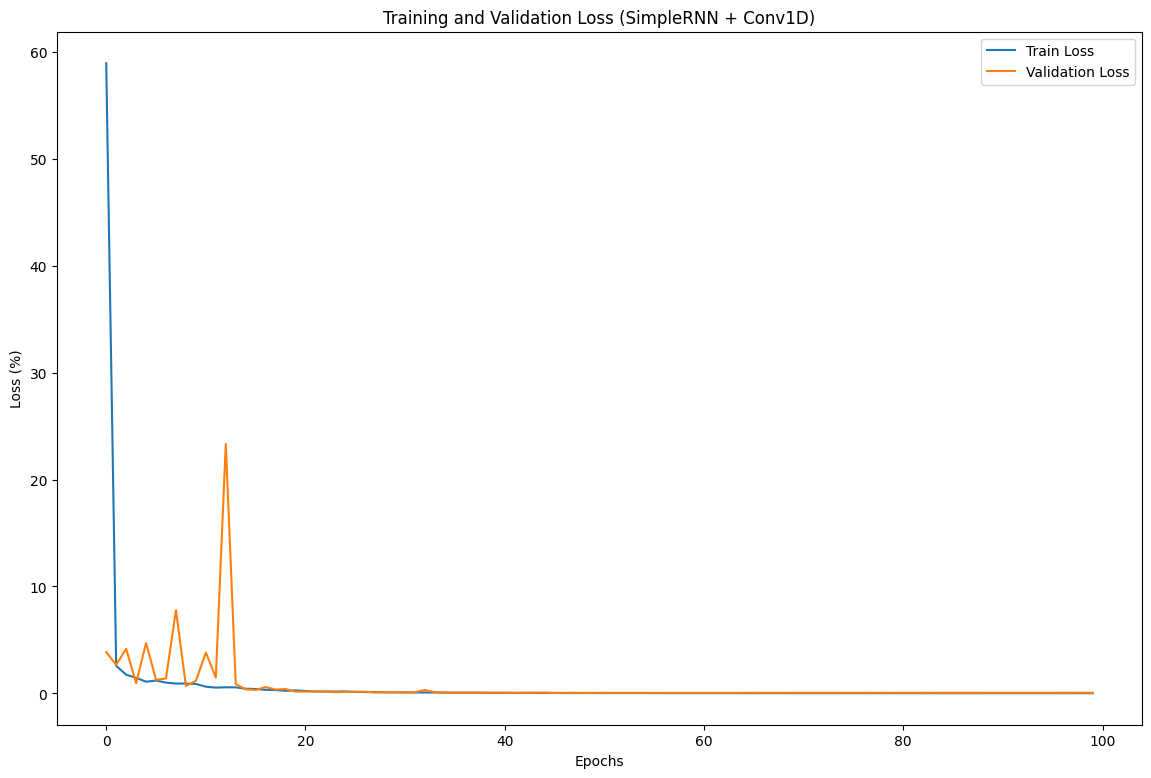

Epoch 1 - Train Loss: 58.94%, Validation Loss: 3.87%, Train Accuracy: 98.17%, Validation Accuracy: 99.58%
Epoch 2 - Train Loss: 2.57%, Validation Loss: 2.66%, Train Accuracy: 99.61%, Validation Accuracy: 99.43%
Epoch 3 - Train Loss: 1.75%, Validation Loss: 4.18%, Train Accuracy: 99.71%, Validation Accuracy: 98.76%
Epoch 4 - Train Loss: 1.45%, Validation Loss: 0.96%, Train Accuracy: 99.76%, Validation Accuracy: 99.87%
Epoch 5 - Train Loss: 1.09%, Validation Loss: 4.71%, Train Accuracy: 99.82%, Validation Accuracy: 98.93%
Epoch 6 - Train Loss: 1.20%, Validation Loss: 1.27%, Train Accuracy: 99.81%, Validation Accuracy: 99.85%
Epoch 7 - Train Loss: 1.01%, Validation Loss: 1.40%, Train Accuracy: 99.84%, Validation Accuracy: 99.79%
Epoch 8 - Train Loss: 0.92%, Validation Loss: 7.78%, Train Accuracy: 99.86%, Validation Accuracy: 97.91%
Epoch 9 - Train Loss: 0.92%, Validation Loss: 0.71%, Train Accuracy: 99.86%, Validation Accuracy: 99.91%
Epoch 10 - Train Loss: 0.88%, Validation Loss: 1.17%, 

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score, average_precision_score
import seaborn as sns
import time
import numpy as np

def evaluate_model(model, X, y_one_hot, dataset_name="Validation"):
    start_time = time.time()

    loss, accuracy = model.evaluate(X, y_one_hot, verbose=0)
    evaluation_time = time.time() - start_time

    predictions = model.predict(X)
    true_labels = np.argmax(y_one_hot, axis=1)
    pred_labels = np.argmax(predictions, axis=1)


    val_f1 = f1_score(true_labels, pred_labels, average='macro')
    val_precision = precision_score(true_labels, pred_labels, average='macro')
    val_recall = recall_score(true_labels, pred_labels, average='macro')

    print(f"{dataset_name} Loss: {loss:.6f}")
    print(f"{dataset_name} Accuracy: {accuracy:.6f}")
    print(f"{dataset_name} F1-Score: {val_f1:.6f}")
    print(f"{dataset_name} Precision: {val_precision:.6f}")
    print(f"{dataset_name} Recall: {val_recall:.6f}")
    print(f"{dataset_name} Evaluation Time: {evaluation_time:.2f} seconds")

    target_names = [str(i) for i in range(2)]
    val_classification_report = classification_report(true_labels, pred_labels, target_names=target_names, digits=6)
    print(f"{dataset_name} Classification Report:")
    print(val_classification_report)


    plot_roc_curve(true_labels, predictions, 2, dataset_name)


    plot_precision_recall_curve(true_labels, predictions, 2, dataset_name)



def plot_roc_curve(true_labels, predictions, num_classes, dataset_name):
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(true_labels, predictions[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.4f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({dataset_name})')
    plt.legend(loc="lower right")
    plt.show()



def plot_precision_recall_curve(true_labels, predictions, num_classes, dataset_name):
    precision = {}
    recall = {}
    average_precision = {}

    for i in range(num_classes):
        precision[i], recall[i], _ = precision_recall_curve(true_labels, predictions[:, i], pos_label=i)
        average_precision[i] = average_precision_score(true_labels, predictions[:, i], pos_label=i)

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (Avg Precision = {average_precision[i]:.2f})')

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve ({dataset_name})")
    plt.legend(loc="best")
    plt.show()



evaluate_model(model_rnn_cnn, X_TON_IOT_valid, y_TON_IOT_valid_one_hot, dataset_name="Validation")



y_TON_IOT_test2_one_hot = tf.keras.utils.to_categorical(y_TON_IOT_test2, num_classes=2)
evaluate_model(model_rnn_cnn, X_TON_IOT_test2, y_TON_IOT_test2_one_hot, dataset_name="Test")




plt.figure(figsize=(14, 9))  # Augmenter la taille de la figure
plt.plot(np.array(history_rnn_cnn.history['accuracy']) * 100, label='Train Accuracy')
plt.plot(np.array(history_rnn_cnn.history['val_accuracy']) * 100, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy (SimpleRNN + Conv1D)')
plt.legend()
plt.show()

plt.figure(figsize=(14, 9))
plt.plot(np.array(history_rnn_cnn.history['loss']) * 100, label='Train Loss')
plt.plot(np.array(history_rnn_cnn.history['val_loss']) * 100, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (%)')
plt.title('Training and Validation Loss (SimpleRNN + Conv1D)')
plt.legend()
plt.show()

e
for epoch, (loss, val_loss, accuracy, val_accuracy) in enumerate(zip(history_rnn_cnn.history['loss'],
                                                                      history_rnn_cnn.history['val_loss'],
                                                                      history_rnn_cnn.history['accuracy'],
                                                                      history_rnn_cnn.history['val_accuracy']), 1):
    print(f"Epoch {epoch} - Train Loss: {loss * 100:.2f}%, Validation Loss: {val_loss * 100:.2f}%, Train Accuracy: {accuracy * 100:.2f}%, Validation Accuracy: {val_accuracy * 100:.2f}%")

In [ ]:
import pickle
with open('history_rnn_cnn.pkl', 'wb') as file:
    pickle.dump(history_rnn_cnn.history, file)

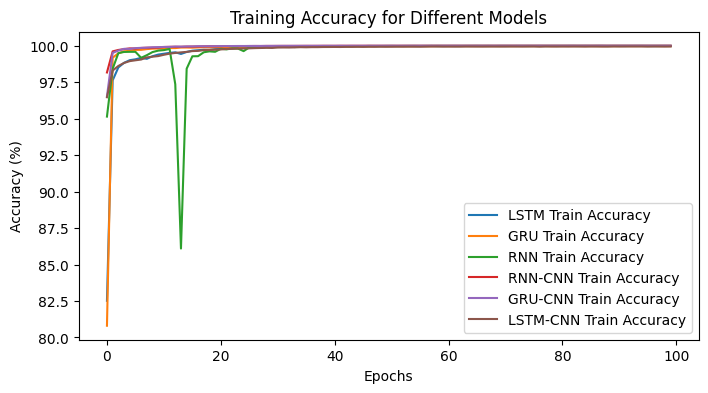

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Load the history objects for different models
with open('history_lstm.pkl', 'rb') as file:
    history_lstm = pickle.load(file)
with open('history_gru.pkl', 'rb') as file:
    history_gru = pickle.load(file)
with open('history_rnn.pkl', 'rb') as file:
    history_rnn = pickle.load(file)
with open('history_rnn_cnn.pkl', 'rb') as file:
    history_rnn_cnn = pickle.load(file)
with open('history_gru_cnn.pkl', 'rb') as file:
    history_gru_cnn = pickle.load(file)
with open('history_lstm_cnn.pkl', 'rb') as file:
    history_lstm_cnn = pickle.load(file)

# Plotting the training accuracy curves
plt.figure(figsize=(8, 4))
plt.plot(np.array(history_lstm['accuracy']) * 100, label='LSTM Train Accuracy')
plt.plot(np.array(history_gru['accuracy']) * 100, label='GRU Train Accuracy')
plt.plot(np.array(history_rnn['accuracy']) * 100, label='RNN Train Accuracy')
plt.plot(np.array(history_rnn_cnn['accuracy']) * 100, label='RNN-CNN Train Accuracy')
plt.plot(np.array(history_gru_cnn['accuracy']) * 100, label='GRU-CNN Train Accuracy')
plt.plot(np.array(history_lstm_cnn['accuracy']) * 100, label='LSTM-CNN Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy for Different Models')
plt.legend()
plt.show()



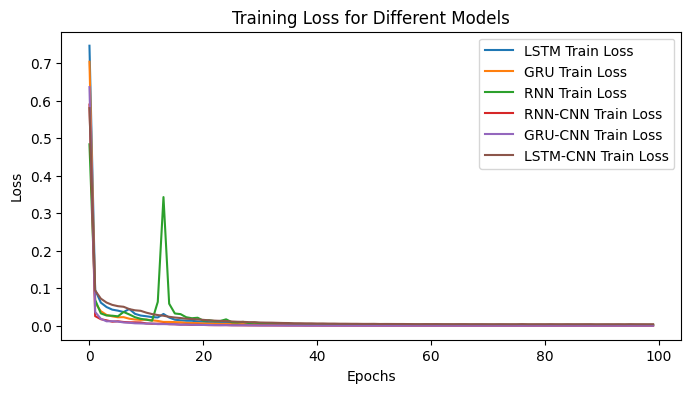

In [ ]:
# Plotting the training loss curves
plt.figure(figsize=(8, 4))
plt.plot(history_lstm['loss'], label='LSTM Train Loss')
plt.plot(history_gru['loss'], label='GRU Train Loss')
plt.plot(history_rnn['loss'], label='RNN Train Loss')
plt.plot(history_rnn_cnn['loss'], label='RNN-CNN Train Loss')
plt.plot(history_gru_cnn['loss'], label='GRU-CNN Train Loss')
plt.plot(history_lstm_cnn['loss'], label='LSTM-CNN Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss for Different Models')
plt.legend()
plt.show()

